### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.
 

### Business Goal  

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the cars dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing_data = pd.read_csv(r'C:\NC\PG\Advanced regression assignment\train.csv')
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
housing_data.shape

(1460, 81)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
housing_data['MSSubClass']= housing_data.MSSubClass.astype('object')
housing_data['OverallQual']= housing_data.OverallQual.astype('object')
housing_data['OverallCond']= housing_data.OverallCond.astype('object')
housing_data['YearBuilt']= housing_data.YearBuilt.astype('object')
housing_data['YearRemodAdd']= housing_data.YearRemodAdd.astype('object')
housing_data['GarageYrBlt']= housing_data.GarageYrBlt.astype('object')
housing_data['MoSold']= housing_data.MoSold.astype('object')
housing_data['YrSold']= housing_data.YrSold.astype('object')

In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 

In [8]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * housing_data.isnull().sum()/len(housing_data)
colwise_percent_missingvalues

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [9]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * housing_data.isnull().sum()/len(housing_data)
colwise_percent_missingvalues

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [10]:
#Alley has almost 94 percent missing values
housing_data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

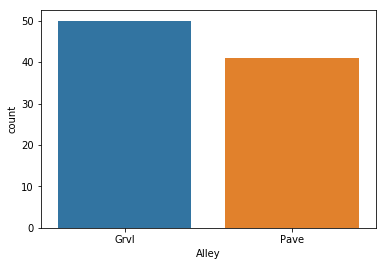

In [11]:
sns.countplot(x="Alley", data=housing_data)

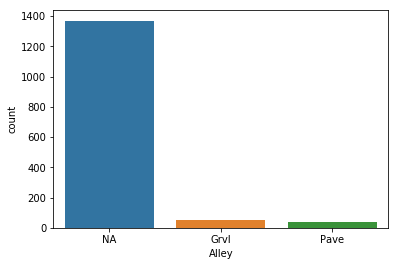

In [12]:
#By looking at the unique values and data dictionary, we can impute the null values with 'NA' - 'No Alley access'
housing_data["Alley"].replace(np.nan,'NA',inplace=True)
sns.countplot(x="Alley", data=housing_data)

In [13]:
#PoolQC has almost 100 percent missing values
housing_data["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

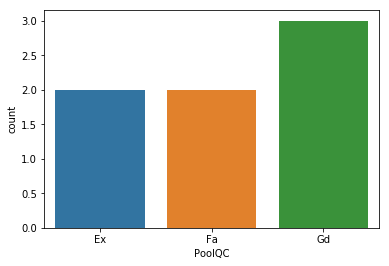

In [14]:
sns.countplot(x="PoolQC", data=housing_data)

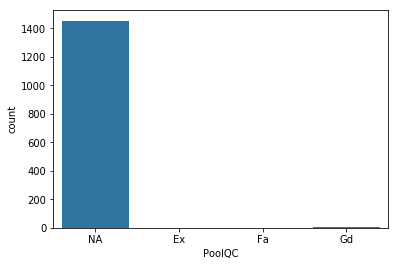

In [15]:
#By looking at the unique values and data dictionary, we can impute the null values with 'NA' - 'No Pool'
housing_data["PoolQC"].replace(np.nan,'NA',inplace=True)
sns.countplot(x="PoolQC", data=housing_data)

In [16]:
#Fence has almost 81 percent missing values
housing_data["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

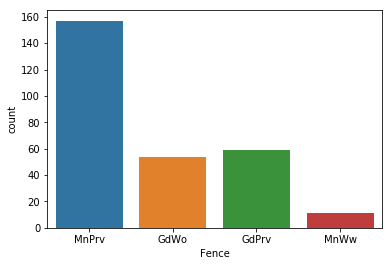

In [17]:
sns.countplot(x="Fence", data=housing_data)

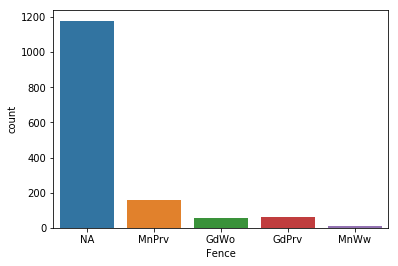

In [18]:
#By looking at the unique values and data dictionary, we can impute the null values with 'NA' - 'No Fence'
housing_data["Fence"].replace(np.nan,'NA',inplace=True)
sns.countplot(x="Fence", data=housing_data)

In [19]:
#MiscFeature has almost 96 percent missing values
housing_data["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

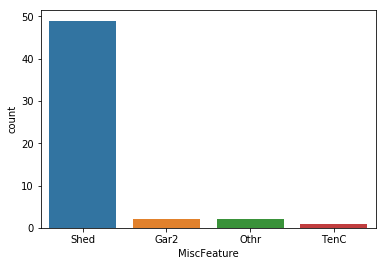

In [20]:
sns.countplot(x="MiscFeature", data=housing_data)

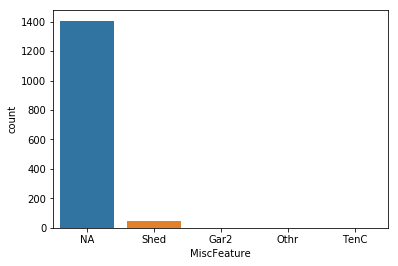

In [21]:
#By looking at the unique values and data dictionary, we can impute the null values with 'NA' - 'None'
housing_data["MiscFeature"].replace(np.nan,'NA',inplace=True)
sns.countplot(x="MiscFeature", data=housing_data)

In [22]:
#FireplaceQu has almost 47 percent missing values
housing_data["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

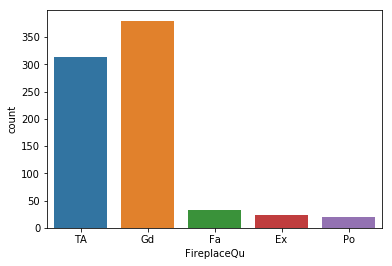

In [23]:
sns.countplot(x="FireplaceQu", data=housing_data)

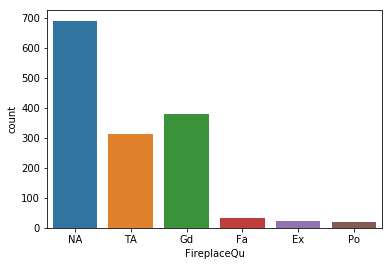

In [24]:
#By looking at the unique values and data dictionary, we can impute the null values with 'NA' - 'No Fireplace'
housing_data["FireplaceQu"].replace(np.nan,'NA',inplace=True)
sns.countplot(x="FireplaceQu", data=housing_data)

In [25]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * housing_data.isnull().sum()/len(housing_data)
colwise_percent_missingvalues

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [26]:
#LotFrontage has almost 18 percent missing values
housing_data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
# imputing housing_data by respective mean values as the mean and median are quite close
housing_data.loc[np.isnan(housing_data['LotFrontage']), ['LotFrontage']] = housing_data['LotFrontage'].mean()

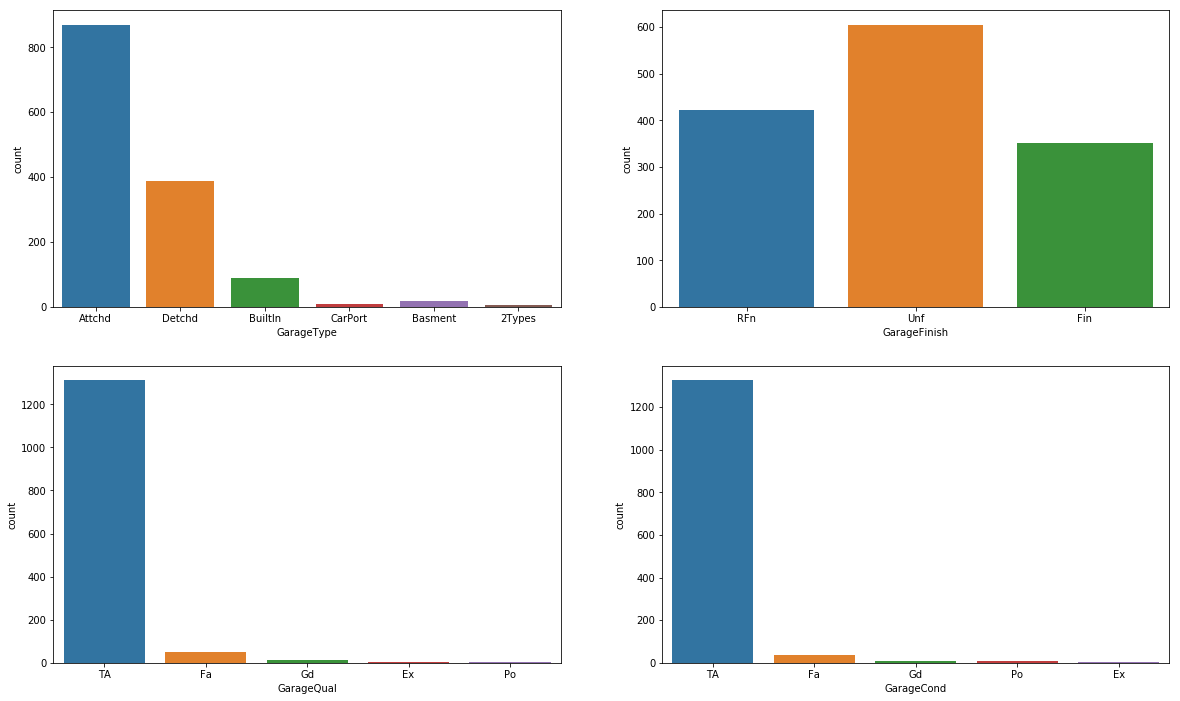

In [28]:
#GarageType, GarageFinish, GarageQual and GarageCond has almost 6 percent missing values
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(x="GarageType", data=housing_data)
plt.subplot(2,2,2)
sns.countplot(x="GarageFinish", data=housing_data)
plt.subplot(2,2,3)
sns.countplot(x="GarageQual", data=housing_data)
plt.subplot(2,2,4)
sns.countplot(x="GarageCond", data=housing_data)
plt.show()

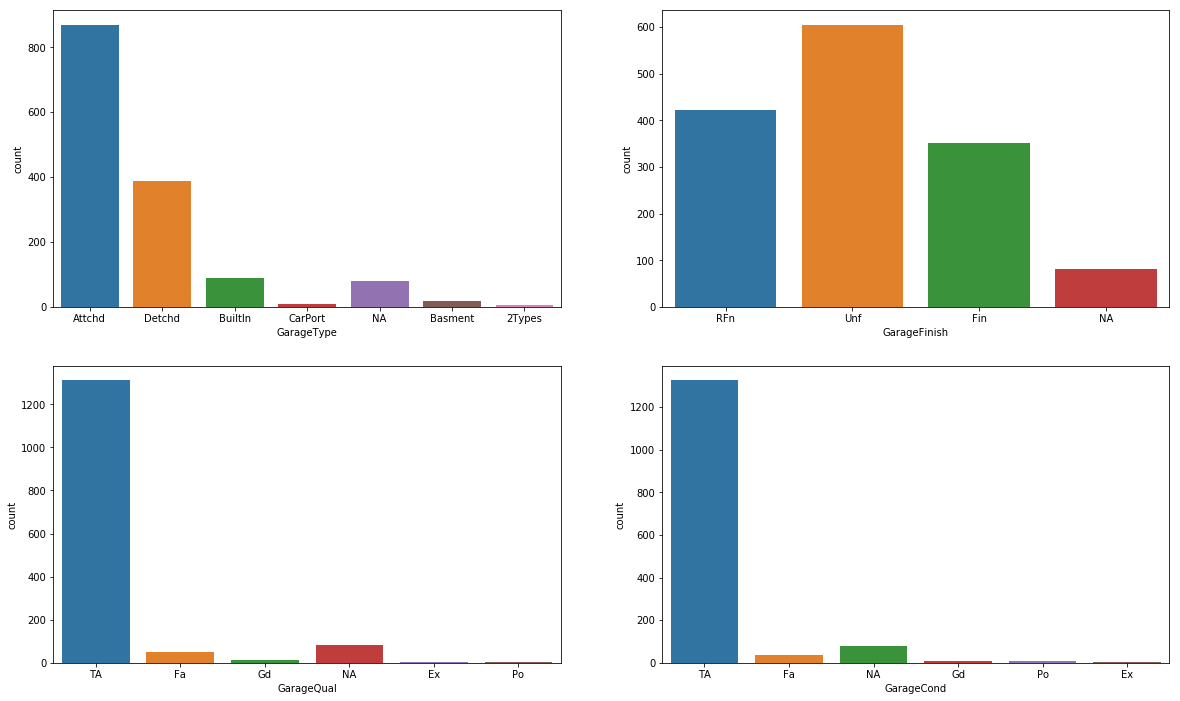

In [29]:
#By looking at the unique values and data dictionary, we can impute the null values with 'NA'
housing_data["GarageType"].replace(np.nan,'NA',inplace=True)
housing_data["GarageFinish"].replace(np.nan,'NA',inplace=True)
housing_data["GarageQual"].replace(np.nan,'NA',inplace=True)
housing_data["GarageCond"].replace(np.nan,'NA',inplace=True)

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(x="GarageType", data=housing_data)
plt.subplot(2,2,2)
sns.countplot(x="GarageFinish", data=housing_data)
plt.subplot(2,2,3)
sns.countplot(x="GarageQual", data=housing_data)
plt.subplot(2,2,4)
sns.countplot(x="GarageCond", data=housing_data)
plt.show()

In [30]:
#GarageYrBlt has almost 18 percent missing values
housing_data["GarageYrBlt"].unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0,
       1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0,
       1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0,
       1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, nan,
       1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0,
       1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0,
       1974.0, 2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1979.0, 1951.0,
       1969.0, 1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0,
       1986.0, 1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0,
       1996.0, 1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0,
       1925.0, 1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0,
       1952.0, 1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0,
       1929.0, 1933.0], dtype=object)

In [31]:
# Since GarageYrBlt is a year, it won't be appropriate to impute it with any value and also it has 18 percent missing values, 
# so we drop it
housing_data = housing_data.drop(['GarageYrBlt'], 1)
#housing_data["GarageYrBlt"].replace(np.nan,'NA',inplace=True)

In [32]:
# summing up the missing values (column-wise)
housing_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [33]:
# calculate the percentage of missing rows
100*(len(housing_data[housing_data.isnull().sum(axis=1) > 0].index) / len(housing_data.index))

3.287671232876712

In [34]:
#list all columns with greater than 1 percent missing values
housing_data.columns[housing_data.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical'],
      dtype='object')

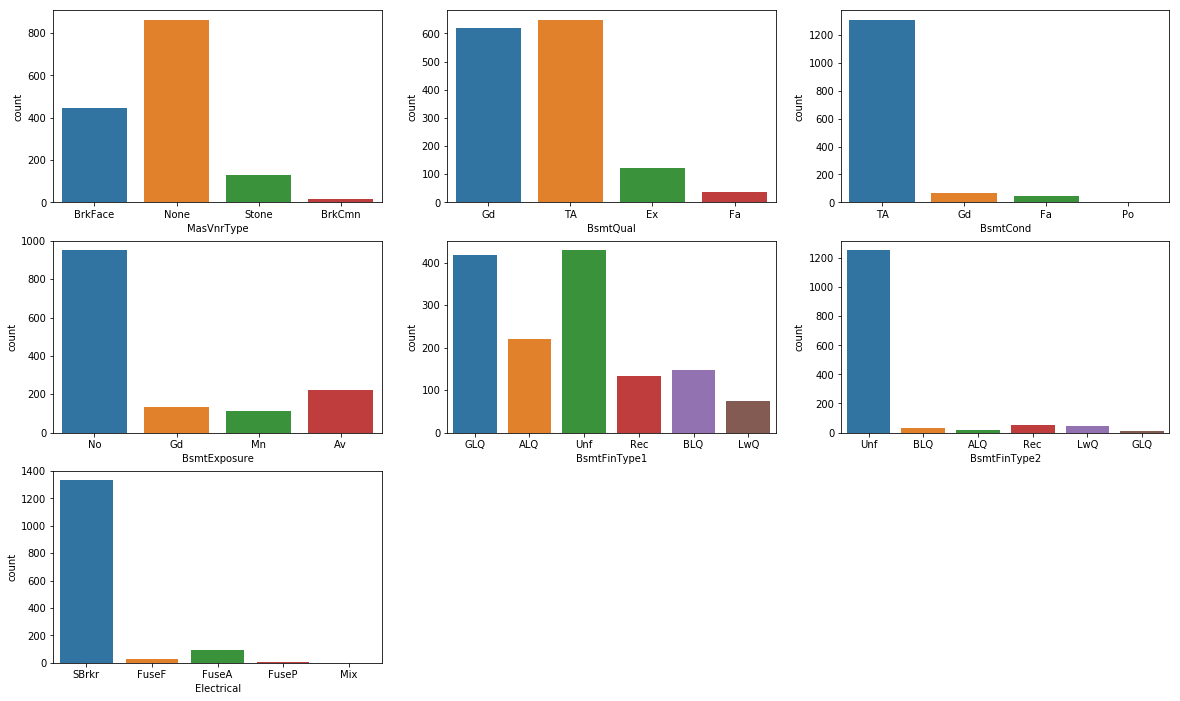

In [35]:
#MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 and Electrical has almost 6 percent missing values
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x="MasVnrType", data=housing_data)
plt.subplot(3,3,2)
sns.countplot(x="BsmtQual", data=housing_data)
plt.subplot(3,3,3)
sns.countplot(x="BsmtCond", data=housing_data)
plt.subplot(3,3,4)
sns.countplot(x="BsmtExposure", data=housing_data)
plt.subplot(3,3,5)
sns.countplot(x="BsmtFinType1", data=housing_data)
plt.subplot(3,3,6)
sns.countplot(x="BsmtFinType2", data=housing_data)
plt.subplot(3,3,7)
sns.countplot(x="Electrical", data=housing_data)
plt.show()

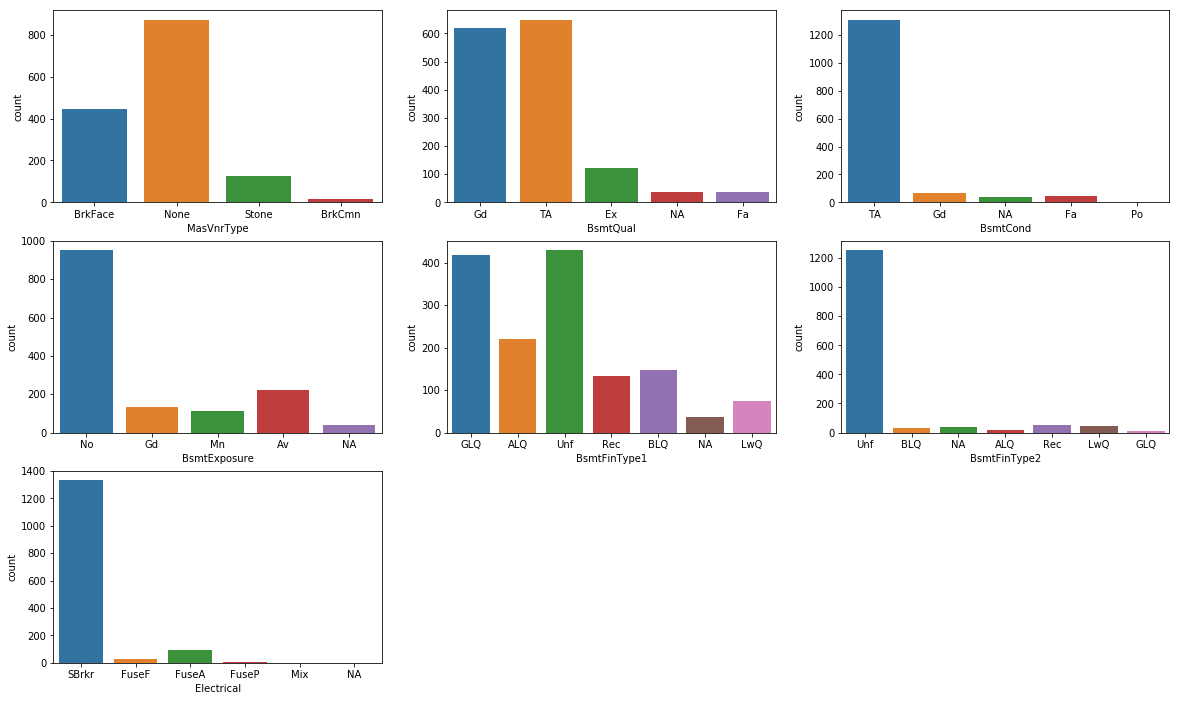

In [36]:
#By looking at the plots and data dictionary, we can impute the null values with 'NA' or 'None'
housing_data["MasVnrType"].replace(np.nan,'None',inplace=True)
housing_data["BsmtQual"].replace(np.nan,'NA',inplace=True)
housing_data["BsmtCond"].replace(np.nan,'NA',inplace=True)
housing_data["BsmtExposure"].replace(np.nan,'NA',inplace=True)
housing_data["BsmtFinType1"].replace(np.nan,'NA',inplace=True)
housing_data["BsmtFinType2"].replace(np.nan,'NA',inplace=True)
#By looking at the plots and data dictionary, we can impute the null values with 'SBrkr'
housing_data["Electrical"].replace(np.nan,'NA',inplace=True)

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x="MasVnrType", data=housing_data)
plt.subplot(3,3,2)
sns.countplot(x="BsmtQual", data=housing_data)
plt.subplot(3,3,3)
sns.countplot(x="BsmtCond", data=housing_data)
plt.subplot(3,3,4)
sns.countplot(x="BsmtExposure", data=housing_data)
plt.subplot(3,3,5)
sns.countplot(x="BsmtFinType1", data=housing_data)
plt.subplot(3,3,6)
sns.countplot(x="BsmtFinType2", data=housing_data)
plt.subplot(3,3,7)
sns.countplot(x="Electrical", data=housing_data)
plt.show()

In [37]:
#MasVnrArea has some percent of missing values
housing_data["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [38]:
#Looking at the description it's hard to impute 'MasVnrArea'.

In [39]:
# calculate the percentage of missing rows
100*(len(housing_data[housing_data.isnull().sum(axis=1) > 0].index) / len(housing_data.index))

0.547945205479452

In [40]:
len(housing_data[housing_data.isnull().sum(axis=1) > 0].index)

8

In [41]:
#Since percentage of rows with missing values is less than 1 percent, we drop them all
#retaining the rows having <= 0 NaNs
housing_data = housing_data[housing_data.isnull().sum(axis=1) <= 0]
housing_data.shape

(1452, 80)

In [42]:
#Checking for duplicates
housing_data.loc[housing_data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [43]:
housing_data.describe()

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1452.000000  1452.000000    1452.000000  1452.000000  1452.000000   
mean    729.822314    70.033636   10507.276171   103.685262   441.970386   
std     421.938123    22.033478    9989.563592   181.066207   455.360279   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     364.750000    60.000000    7538.750000     0.000000     0.000000   
50%     729.500000    70.049958    9478.500000     0.000000   381.000000   
75%    1095.250000    79.000000   11600.000000   166.000000   706.500000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1452.000000  1452.000000  1452.000000  1452.000000  1452.000000  ...   
mean     46.805785   567.070937  1055.847107  1161.270661   346.944215  ...   
std     161.726239   442.082927   438.119089   385.018424   436.370724  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   222.500000   794.750000   882.000000     0.000000  ...   
50%       0.000000   477.500000   990.500000  1086.000000     0.000000  ...   
75%       0.000000   808.000000  1297.250000  1391.000000   728.000000  ...   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1452.000000  1452.000000  1452.000000  1452.000000    1452.000000   
mean      1.765152   472.475207    94.416667    46.390496      21.937328   
std       0.748496   214.106397   125.393706    66.048619      61.089879   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   327.750000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1452.000000  1452.000000  1452.000000   1452.000000    1452.000000  
mean      3.428375    15.143939     2.774105     43.728650  180615.063361  
std      29.396943    55.899665    40.287389    497.478278   79285.541485  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129900.000000  
50%       0.000000     0.000000     0.000000      0.000000  162700.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000  

[8 rows x 30 columns]

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [44]:
# all numeric (float and int) variables in the dataset
housing_data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_numeric.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  GarageCars  GarageArea  WoodDeckSF  \
0          856       856       854  ...           2         548           0   
1         1262      1262         0  ...           2         460         298   
2          920       920       866  ...           2         608           0   
3          756       961       756  ...           3         642           0   
4         1145      1145      1053  ...           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 30 columns]

In [45]:
# we do not need 'Id'.
# dropping 'Id'
housing_data_numeric = housing_data_numeric.drop(['Id'], axis=1)
housing_data_numeric.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageCars  GarageArea  \
0          856       856       854             0  ...           2         548   
1         1262      1262         0             0  ...           2         460   
2          920       920       866             0  ...           2         608   
3          756       961       756             0  ...           3         642   
4         1145      1145      1053             0  ...           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000  

[5 rows x 29 columns]

<Figure size 2880x864 with 0 Axes>

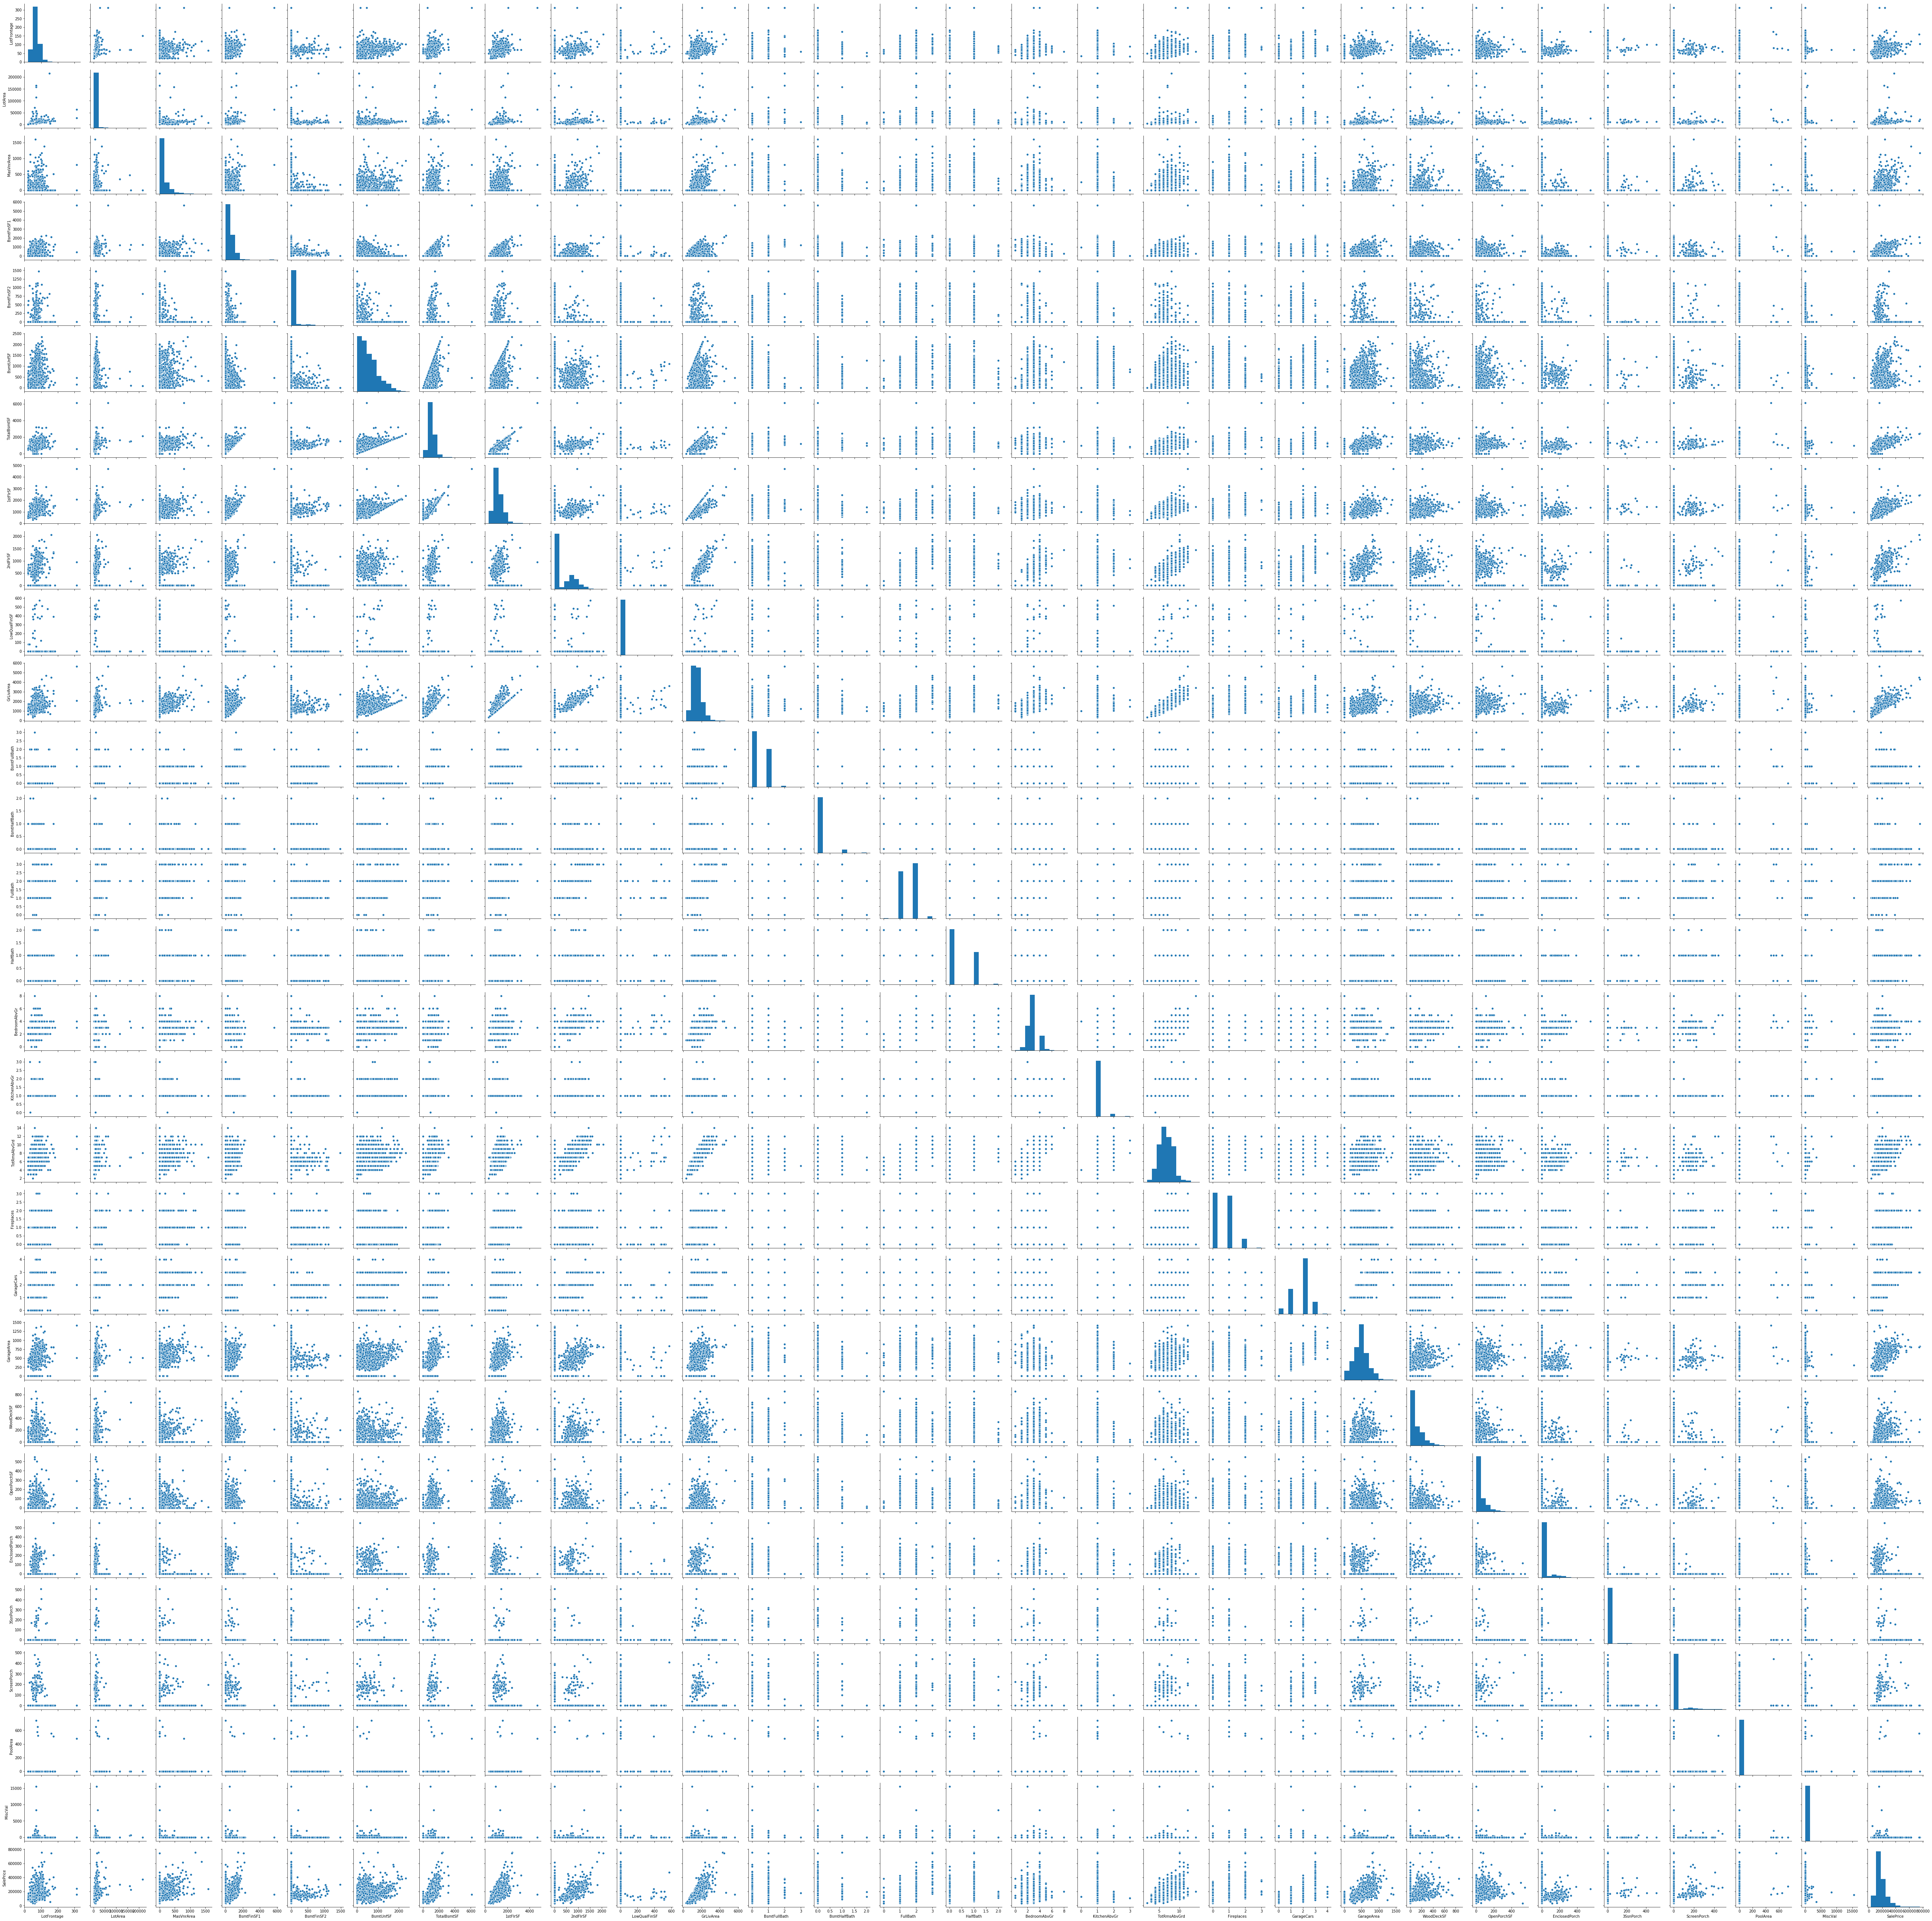

In [46]:
plt.figure(figsize=(40, 12))
sns.pairplot(housing_data_numeric)
plt.show()

In [47]:
correlationval = housing_data_numeric.corr()
round(correlationval, 2)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage           1.00     0.31        0.18        0.22        0.04   
LotArea               0.31     1.00        0.10        0.21        0.11   
MasVnrArea            0.18     0.10        1.00        0.26       -0.07   
BsmtFinSF1            0.22     0.21        0.26        1.00       -0.05   
BsmtFinSF2            0.04     0.11       -0.07       -0.05        1.00   
BsmtUnfSF             0.12    -0.00        0.11       -0.50       -0.21   
TotalBsmtSF           0.36     0.26        0.36        0.52        0.11   
1stFlrSF              0.41     0.30        0.34        0.44        0.10   
2ndFlrSF              0.07     0.05        0.17       -0.14       -0.10   
LowQualFinSF          0.04     0.00       -0.07       -0.06        0.01   
GrLivArea             0.37     0.26        0.39        0.21       -0.01   
BsmtFullBath          0.09     0.16        0.09        0.65        0.16   
BsmtHalfBath         -0.01     0.05        0.03        0.07        0.07   
FullBath              0.18     0.12        0.28        0.06       -0.08   
HalfBath              0.05     0.02        0.20        0.00       -0.03   
BedroomAbvGr          0.24     0.12        0.10       -0.11       -0.02   
KitchenAbvGr         -0.01    -0.02       -0.04       -0.09       -0.04   
TotRmsAbvGrd          0.32     0.19        0.28        0.04       -0.04   
Fireplaces            0.24     0.27        0.25        0.26        0.05   
GarageCars            0.27     0.15        0.36        0.22       -0.04   
GarageArea            0.32     0.18        0.37        0.30       -0.02   
WoodDeckSF            0.08     0.17        0.16        0.21        0.07   
OpenPorchSF           0.14     0.09        0.13        0.11        0.00   
EnclosedPorch         0.01    -0.02       -0.11       -0.11        0.04   
3SsnPorch             0.06     0.02        0.02        0.03       -0.03   
ScreenPorch           0.04     0.04        0.06        0.06        0.09   
PoolArea              0.18     0.08        0.01        0.14        0.04   
MiscVal               0.00     0.04       -0.03        0.00        0.00   
SalePrice             0.33     0.26        0.48        0.38       -0.01   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage         0.12         0.36      0.41      0.07          0.04  ...   
LotArea            -0.00         0.26      0.30      0.05          0.00  ...   
MasVnrArea          0.11         0.36      0.34      0.17         -0.07  ...   
BsmtFinSF1         -0.50         0.52      0.44     -0.14         -0.06  ...   
BsmtFinSF2         -0.21         0.11      0.10     -0.10          0.01  ...   
BsmtUnfSF           1.00         0.42      0.32      0.01          0.03  ...   
TotalBsmtSF         0.42         1.00      0.82     -0.17         -0.03  ...   
1stFlrSF            0.32         0.82      1.00     -0.20         -0.01  ...   
2ndFlrSF            0.01        -0.17     -0.20      1.00          0.06  ...   
LowQualFinSF        0.03        -0.03     -0.01      0.06          1.00  ...   
GrLivArea           0.24         0.45      0.57      0.69          0.14  ...   
BsmtFullBath       -0.42         0.31      0.24     -0.17         -0.05  ...   
BsmtHalfBath       -0.10         0.00      0.00     -0.02         -0.01  ...   
FullBath            0.29         0.32      0.38      0.42         -0.00  ...   
HalfBath           -0.04        -0.05     -0.12      0.61         -0.03  ...   
BedroomAbvGr        0.17         0.05      0.13      0.50          0.11  ...   
KitchenAbvGr        0.03        -0.08      0.06      0.06          0.01  ...   
TotRmsAbvGrd        0.25         0.29      0.41      0.62          0.13  ...   
Fireplaces          0.05         0.34      0.41      0.19         -0.02  ...   
GarageCars          0.21         0.43      0.44      0.19         -0.09  ...   
GarageArea          0.18         0.49      0.49      0.14         -0.07  ...   
Wood

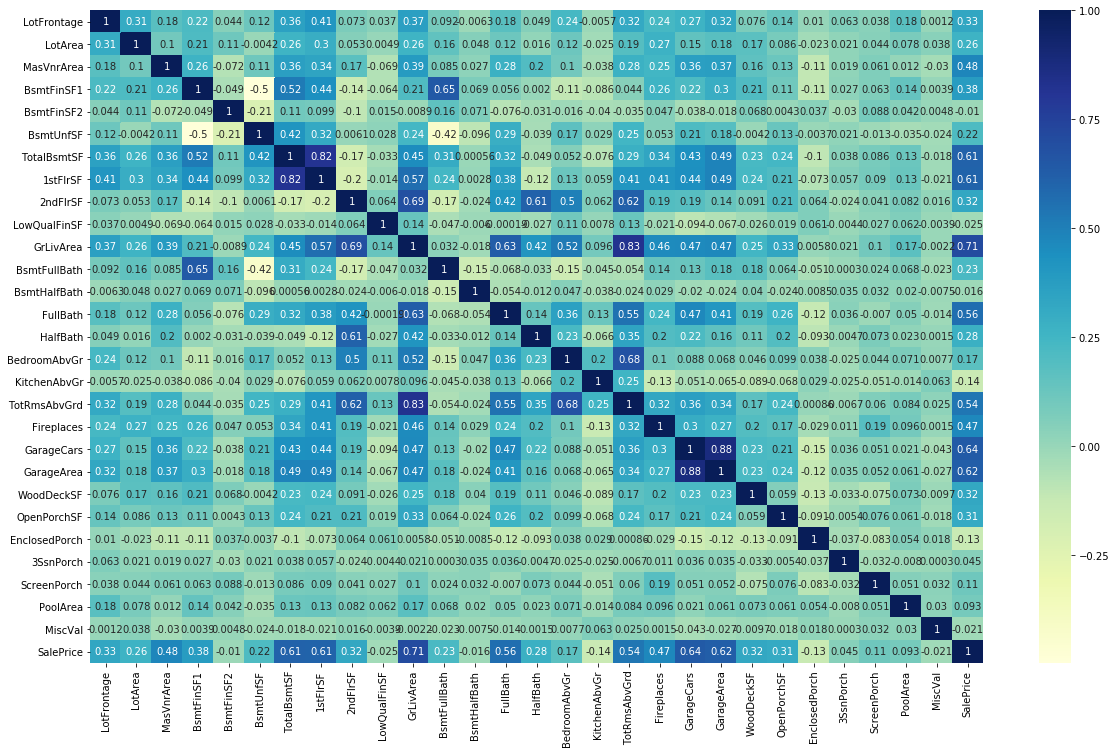

In [48]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlationval, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:
    
    The positively correlated variables are:
         - 1stFlrSF and TotalBsmtSF
         - GarageArea and GarageCars
         - GrLivArea and TotRmsAbvGrd
         - GrLivArea and SalePrice
         - SalePrice and 1stFlrSF
         - SalePrice and GarageCars

#### Visualising Categorical Variables

#### Univariate analysis

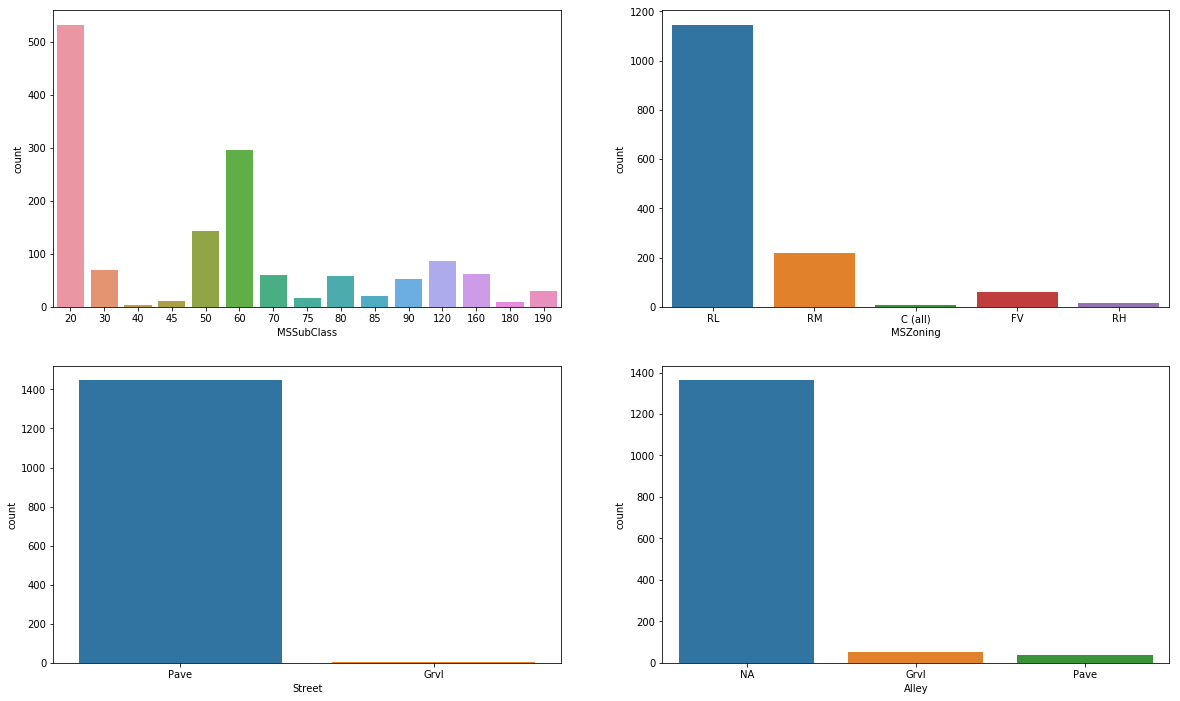

In [49]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='MSSubClass', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='MSZoning', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='Street', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='Alley', data=housing_data)

plt.show()

As observed the count is most for MSSubClass as 20, MSZoning as RL i.e. Residential Low Density, Street is mostly Paved and mostly houses have No Alley access 

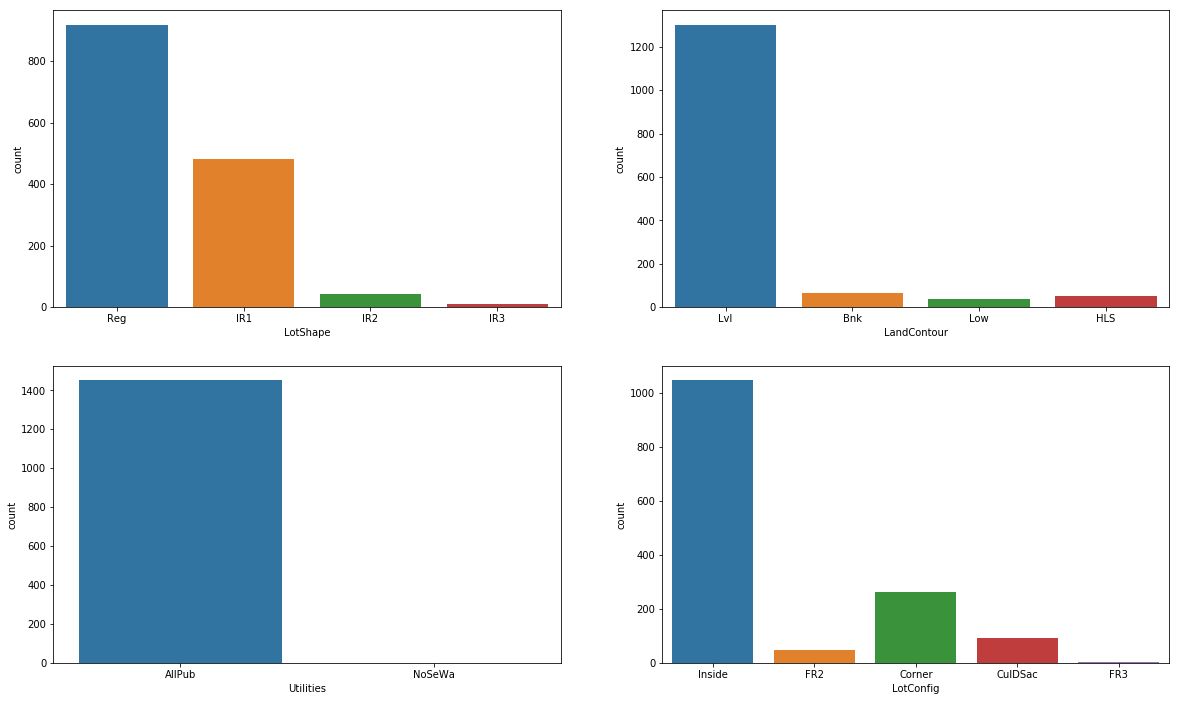

In [50]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='LotShape', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='LandContour', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='Utilities', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='LotConfig', data=housing_data)

plt.show()

As observed the count is most for LotShape as Regular, LandContourNear Flat/Level as Near Flat/Level, Utilities is mostly AllPub and LotConfig is mostly Inside

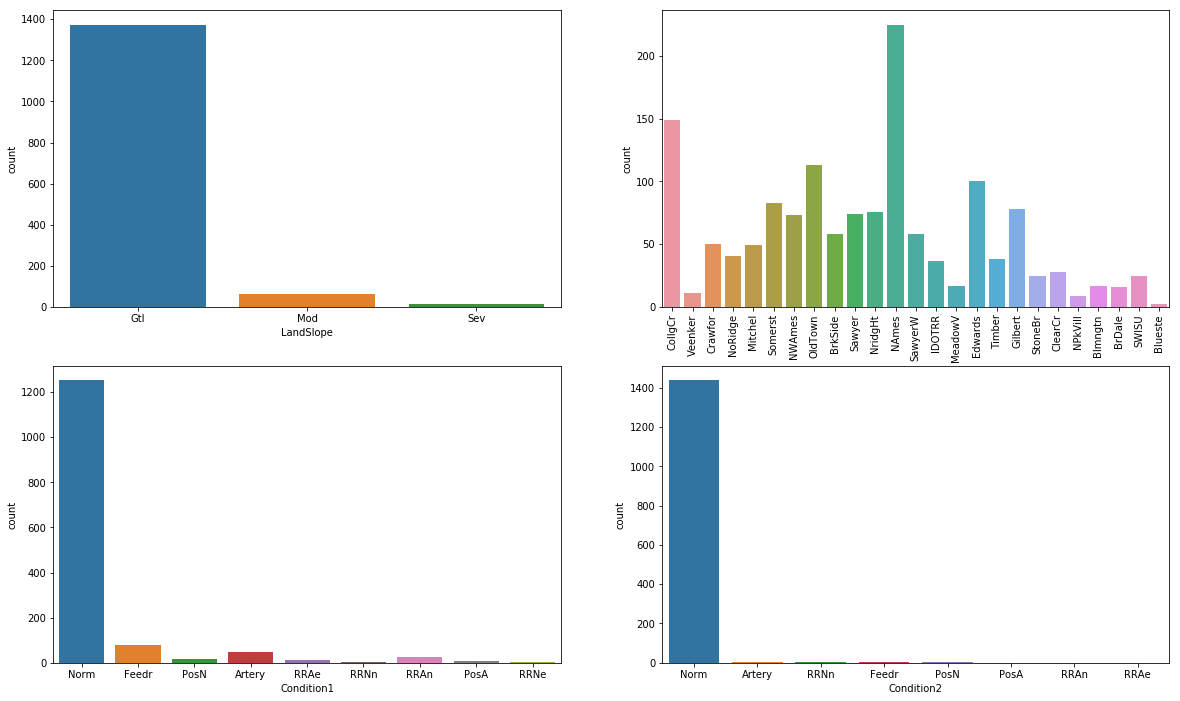

In [51]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='LandSlope', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='Neighborhood', data=housing_data)
plt.xticks(rotation = 90)

plt.subplot(2, 2, 3)
sns.countplot(x='Condition1', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='Condition2', data=housing_data)

plt.show()

As observed Land Shape for most houses is Gentle, Neighborhood is Northwest Ames, Condition1 is Normal and Condition2 is Normal

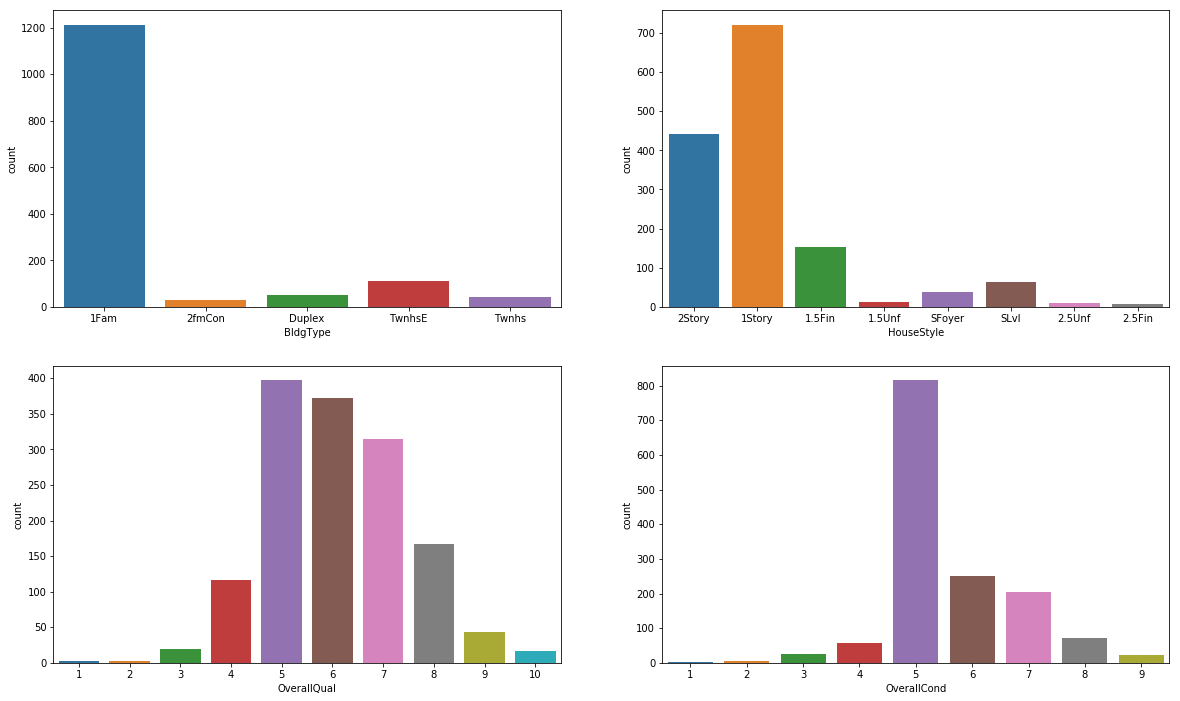

In [52]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='BldgType', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='HouseStyle', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='OverallQual', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='OverallCond', data=housing_data)

plt.show()

As observed BldgType is mostly Single-family Detached, HouseStyle is 1Story, OverallQual is Average or Above Average and OverallCond is Average

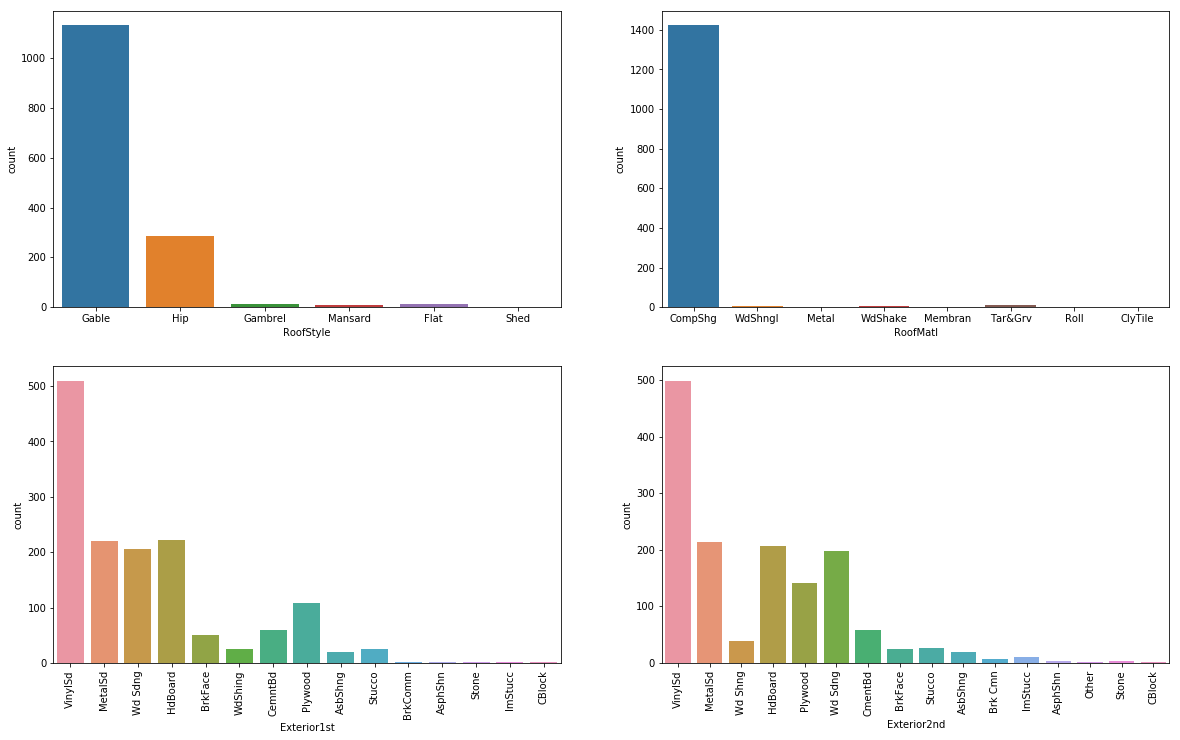

In [53]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='RoofStyle', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='RoofMatl', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='Exterior1st', data=housing_data)
plt.xticks(rotation = 90)

plt.subplot(2, 2, 4)
sns.countplot(x='Exterior2nd', data=housing_data)
plt.xticks(rotation = 90)

plt.show()

As observed RoofStyle is mostly Gable, RoofMatl is mostly Standard (Composite) Shingle, Exterior1st is VinylSd and Exterior2nd is VinylSd.

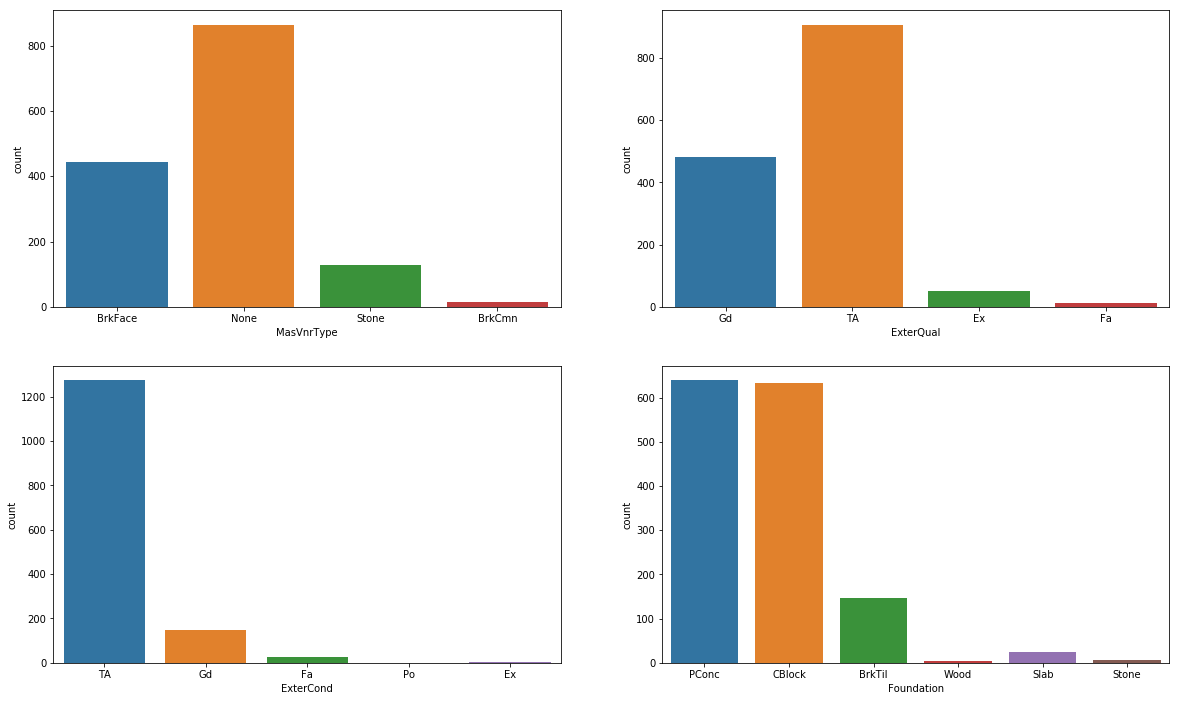

In [54]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='MasVnrType', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='ExterQual', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='ExterCond', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='Foundation', data=housing_data)

plt.show()

As observed MasVnrType is mostly None, ExterQual is Typical, ExterCond is Typical and Foundation is mostly Poured Contrete or Cinder Block

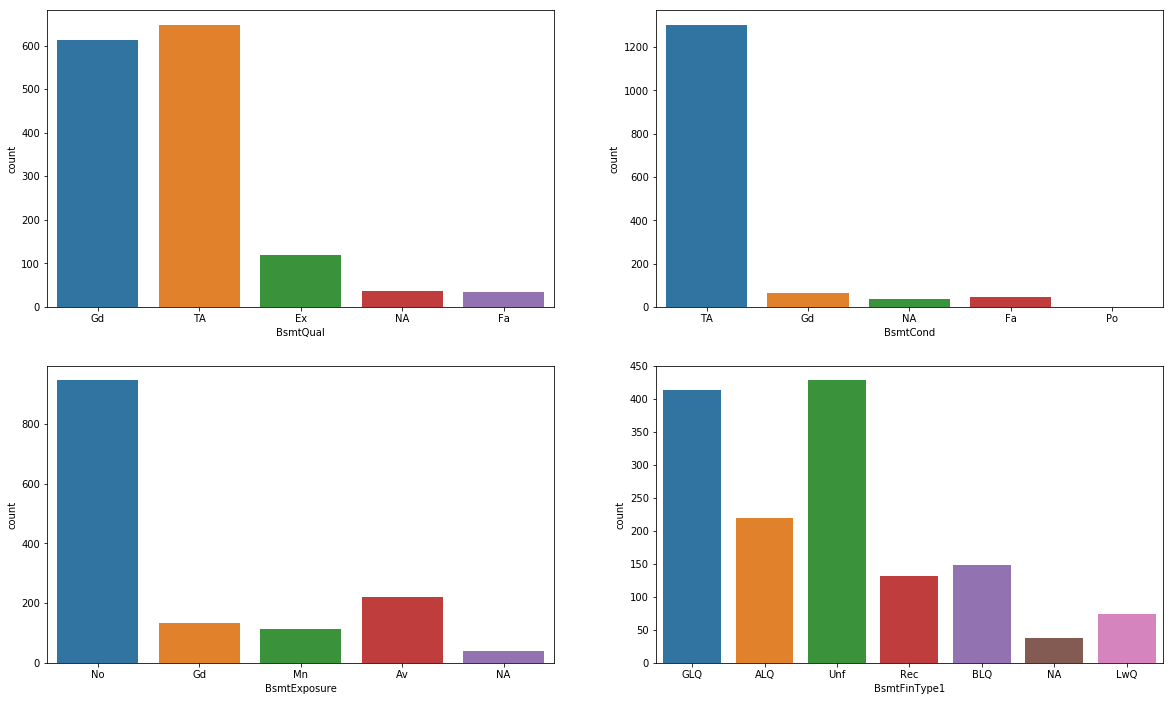

In [55]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='BsmtQual', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='BsmtCond', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='BsmtExposure', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='BsmtFinType1', data=housing_data)

plt.show()

As observed BsmtQual is mostly Typical or Good, BsmtCond is Typical, BsmtExposure is no and BsmtFinType1 is mostly BsmtFinType1 or Unfinshed

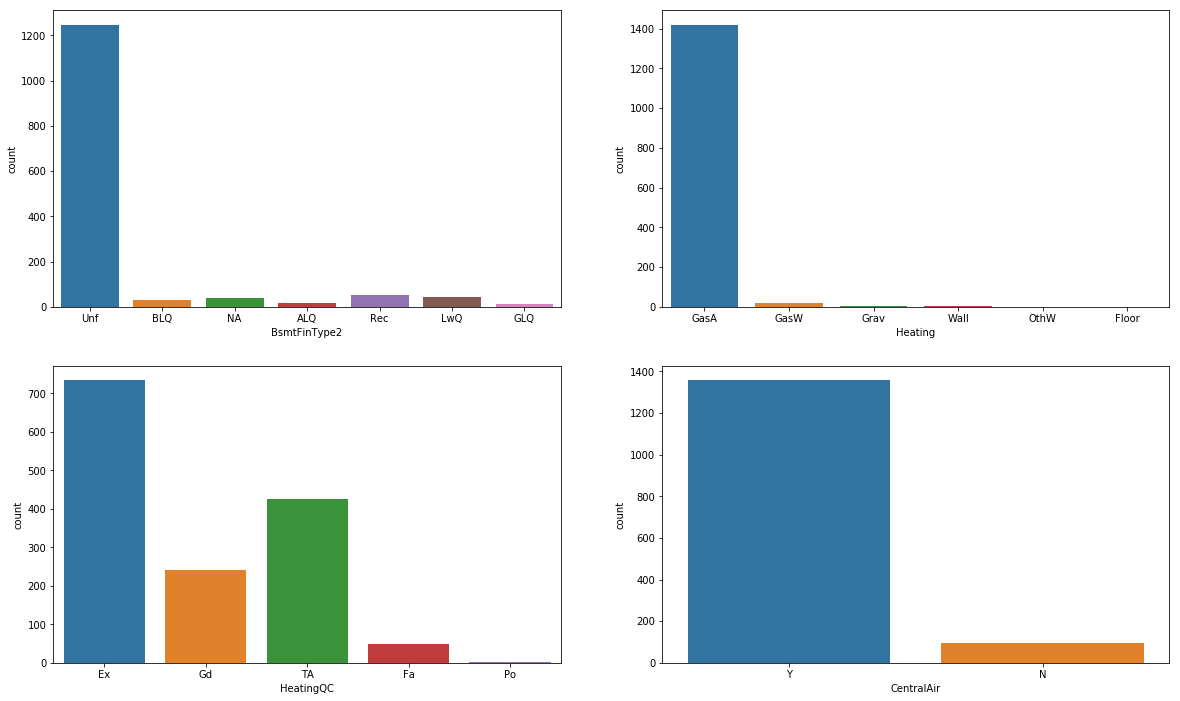

In [56]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='BsmtFinType2', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='Heating', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='HeatingQC', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='CentralAir', data=housing_data)

plt.show()

As observed BsmtQual is mostly Unfinshed, Heating is Gas forced warm air furnace, HeatingQC is Excellent and CentralAir is mostly Yes.

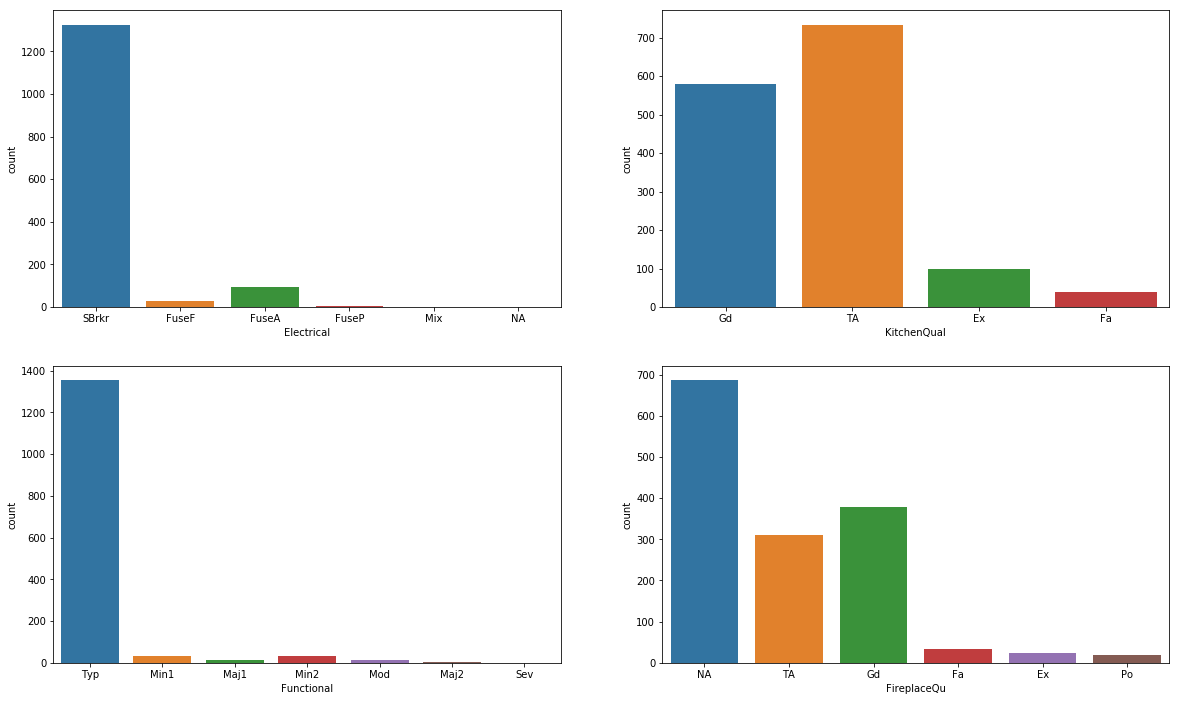

In [57]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='Electrical', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='KitchenQual', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='Functional', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='FireplaceQu', data=housing_data)

plt.show()

As observed Electrical is mostly Standard Circuit Breakers & Romex, KitchenQual is Typical or Good, Functional is Typical Functionality and FireplaceQu is NA

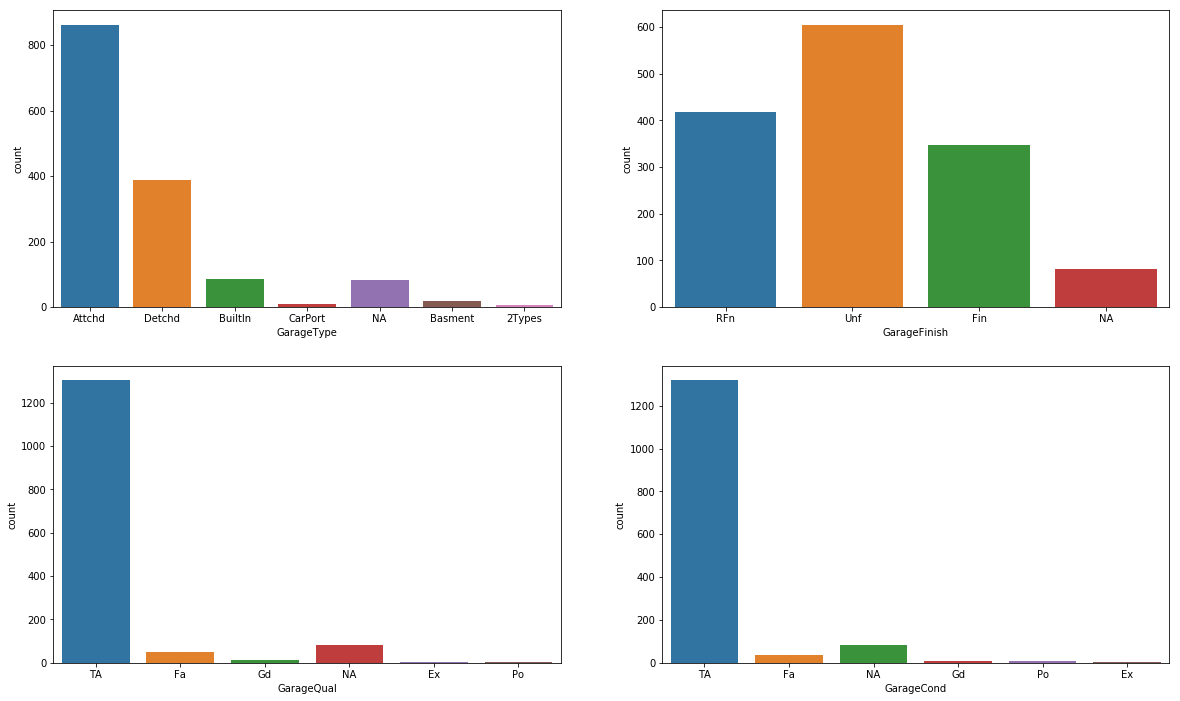

In [58]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='GarageType', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='GarageFinish', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='GarageQual', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='GarageCond', data=housing_data)

plt.show()

As observed GarageType is mostly Attached to home, GarageFinish is mostly Unfinished, GarageQual is mostly Typical and GarageCond is mostly Typical

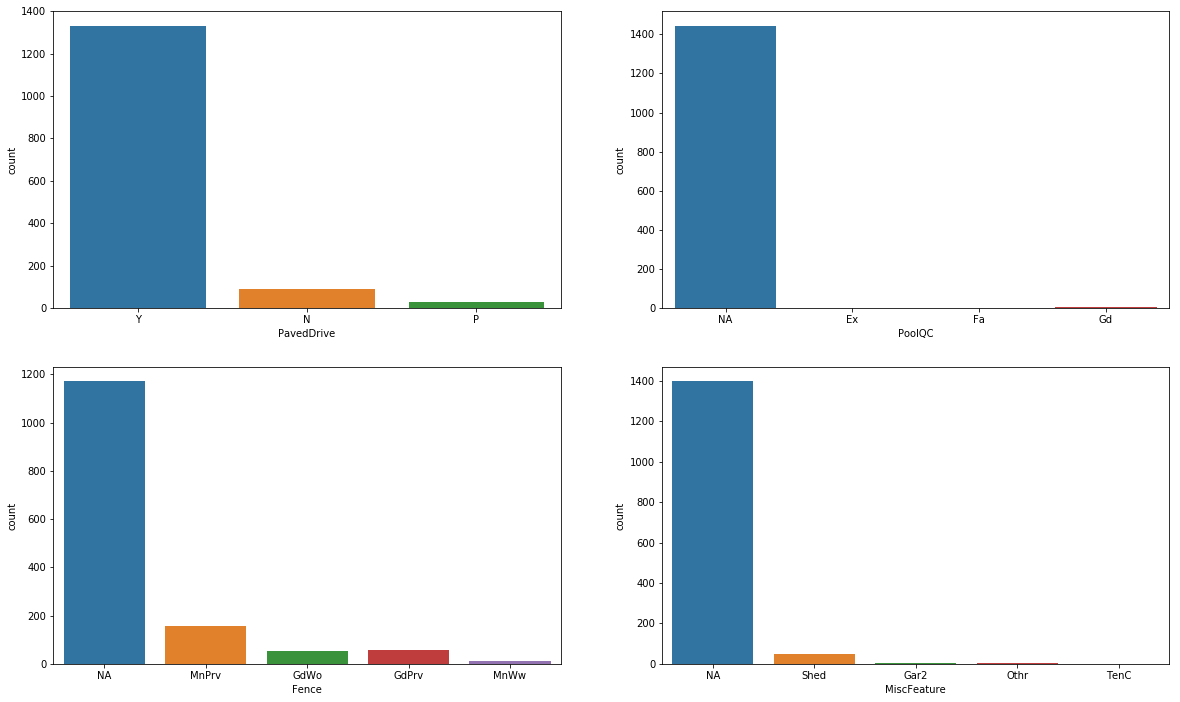

In [59]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='PavedDrive', data=housing_data)

plt.subplot(2, 2, 2)
sns.countplot(x='PoolQC', data=housing_data)

plt.subplot(2, 2, 3)
sns.countplot(x='Fence', data=housing_data)

plt.subplot(2, 2, 4)
sns.countplot(x='MiscFeature', data=housing_data)

plt.show()

As observed PavedDrive is mostly Paved, PoolQC is mostly NA, Fence is mostly NA and MiscFeature is mostly NA

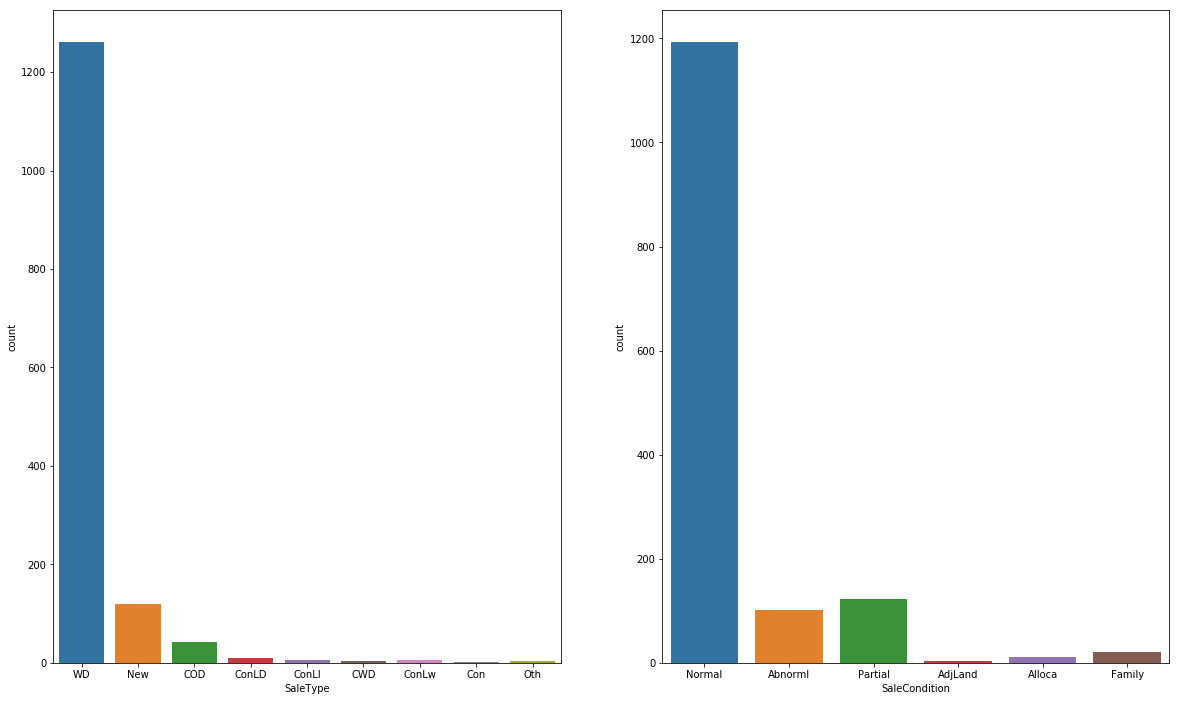

In [60]:
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
sns.countplot(x='SaleType', data=housing_data)

plt.subplot(1, 2, 2)
sns.countplot(x='SaleCondition', data=housing_data)

plt.show()

As observed SaleType is mostly Warranty Deed - Conventional and SaleCondition is mostly Normal

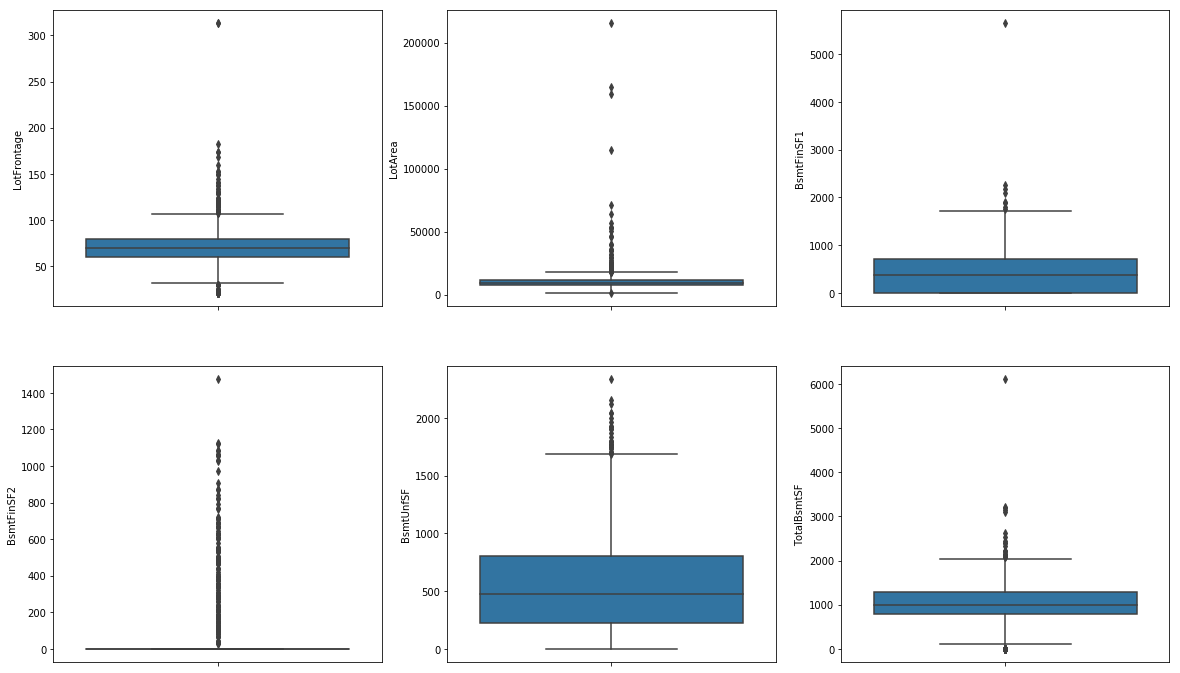

In [61]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = 'LotFrontage', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(y = 'LotArea', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(y = 'BsmtFinSF1', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(y = 'BsmtFinSF2', data = housing_data)
plt.subplot(2,3,5)
sns.boxplot(y = 'BsmtUnfSF', data = housing_data)
plt.subplot(2,3,6)
sns.boxplot(y = 'TotalBsmtSF', data = housing_data)
plt.show()

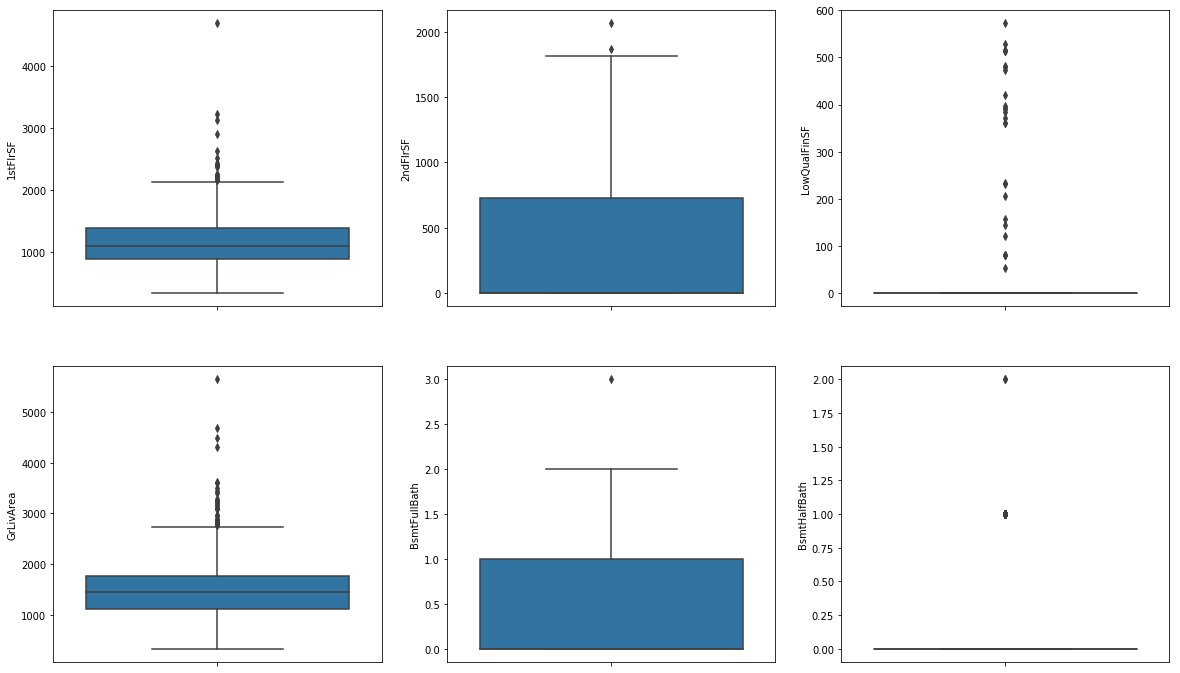

In [62]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = '1stFlrSF', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(y = '2ndFlrSF', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(y = 'LowQualFinSF', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(y = 'GrLivArea', data = housing_data)
plt.subplot(2,3,5)
sns.boxplot(y = 'BsmtFullBath', data = housing_data)
plt.subplot(2,3,6)
sns.boxplot(y = 'BsmtHalfBath', data = housing_data)
plt.show()

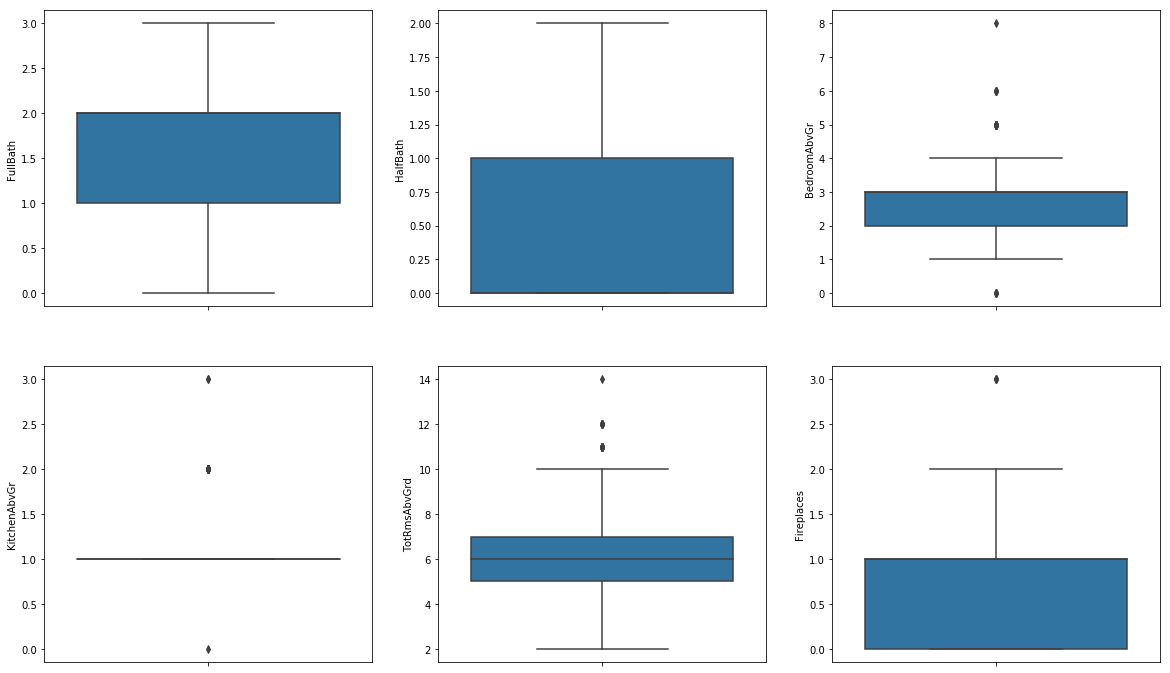

In [63]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = 'FullBath', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(y = 'HalfBath', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(y = 'BedroomAbvGr', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(y = 'KitchenAbvGr', data = housing_data)
plt.subplot(2,3,5)
sns.boxplot(y = 'TotRmsAbvGrd', data = housing_data)
plt.subplot(2,3,6)
sns.boxplot(y = 'Fireplaces', data = housing_data)
plt.show()

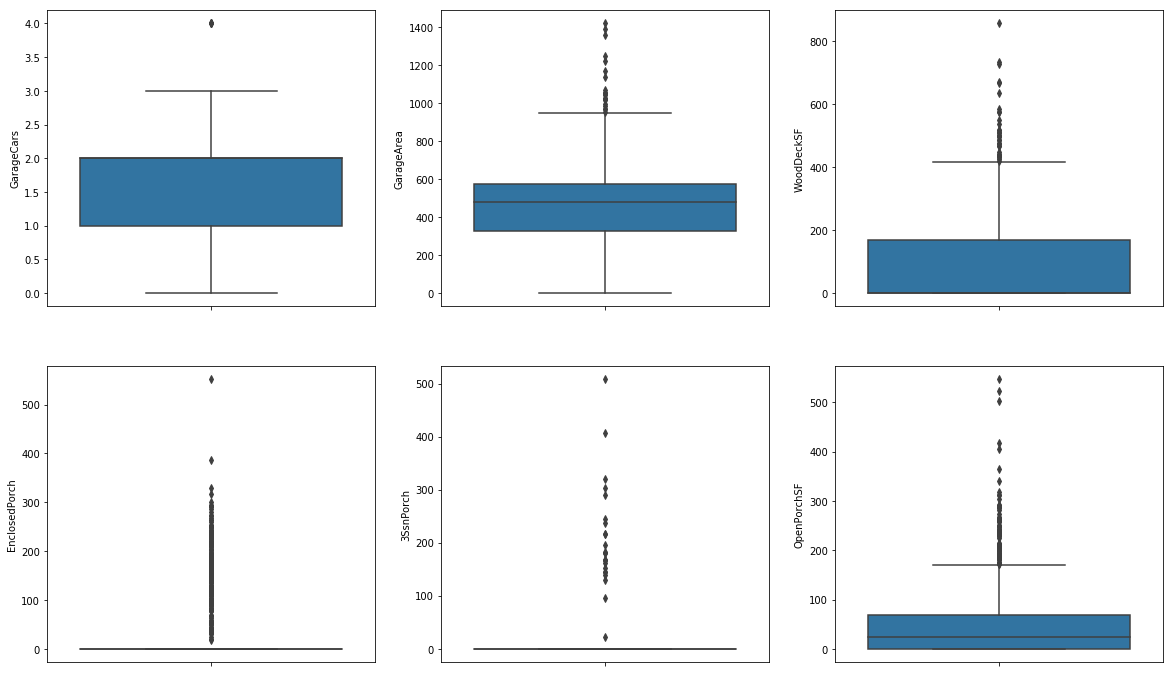

In [64]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = 'GarageCars', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(y = 'GarageArea', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(y = 'WoodDeckSF', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(y = 'EnclosedPorch', data = housing_data)
plt.subplot(2,3,5)
sns.boxplot(y = '3SsnPorch', data = housing_data)
plt.subplot(2,3,6)
sns.boxplot(y = 'OpenPorchSF', data = housing_data)
plt.show()

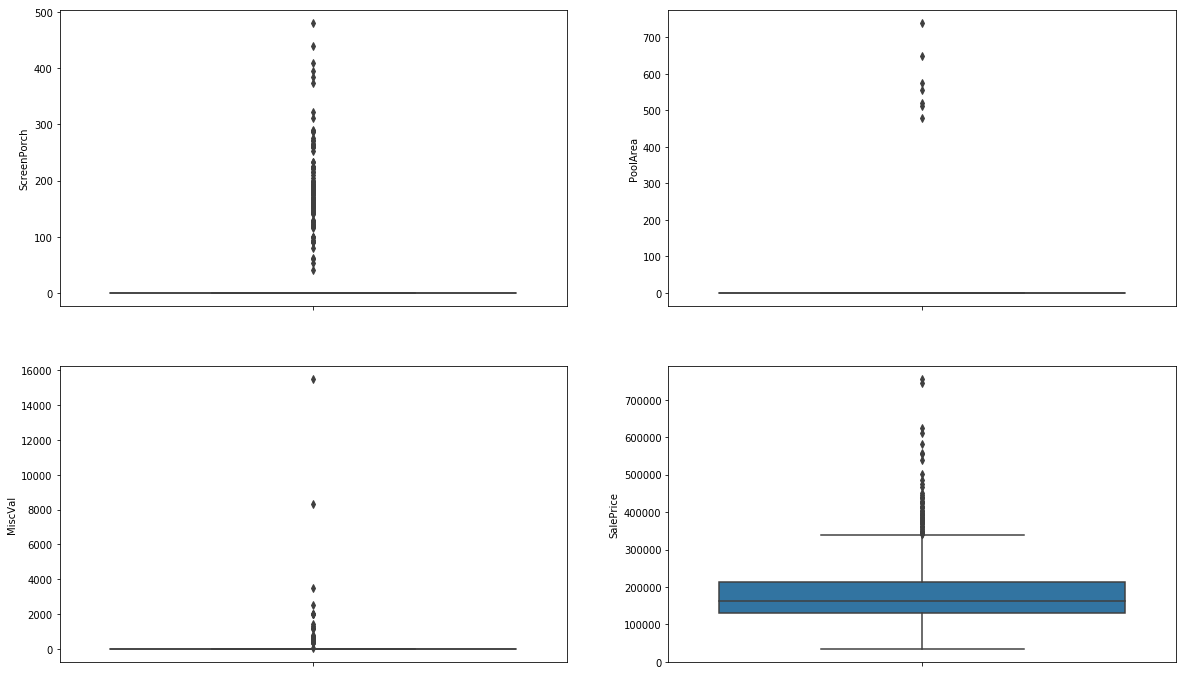

In [65]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'ScreenPorch', data = housing_data)
plt.subplot(2,2,2)
sns.boxplot(y = 'PoolArea', data = housing_data)
plt.subplot(2,2,3)
sns.boxplot(y = 'MiscVal', data = housing_data)
plt.subplot(2,2,4)
sns.boxplot(y = 'SalePrice', data = housing_data)
plt.show()

As observed there are outliers in some of the fields.

## Step 3: Data Preparation

Let's check the target variable

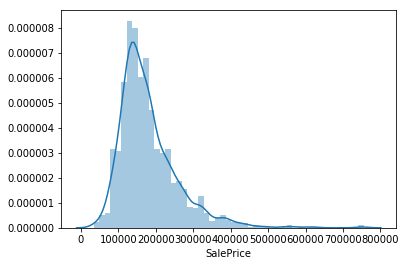

In [66]:
sns.distplot(housing_data['SalePrice'])
plt.show()

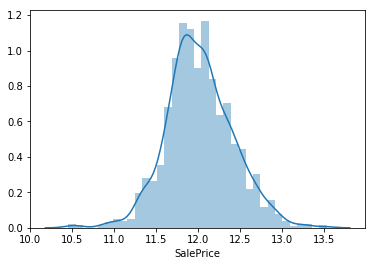

In [67]:
sns.distplot(np.log(housing_data["SalePrice"]))
plt.show()

As observed, the target, SalePrice, is skewed. A transformation like a logarithm would make it more normally distributed.

In [68]:
housing_data["TransSalePrice"] = np.log(housing_data["SalePrice"])

#### Converting some binary variables (Yes/No) to 0/1

In [69]:
coluniquecount = housing_data.nunique()
coluniquecount

Id                1452
MSSubClass          15
MSZoning             5
LotFrontage        111
LotArea           1067
Street               2
Alley                3
LotShape             4
LandContour          4
Utilities            2
LotConfig            5
LandSlope            3
Neighborhood        25
Condition1           9
Condition2           8
BldgType             5
HouseStyle           8
OverallQual         10
OverallCond          9
YearBuilt          112
YearRemodAdd        61
RoofStyle            6
RoofMatl             8
Exterior1st         15
Exterior2nd         16
MasVnrType           4
MasVnrArea         327
ExterQual            4
ExterCond            5
Foundation           6
                  ... 
BedroomAbvGr         8
KitchenAbvGr         4
KitchenQual          4
TotRmsAbvGrd        12
Functional           7
Fireplaces           4
FireplaceQu          6
GarageType           7
GarageFinish         4
GarageCars           5
GarageArea         438
GarageQual           6
GarageCond 

In [70]:
yesnocols = coluniquecount[coluniquecount <= 2]
yesnocols.index

Index(['Street', 'Utilities', 'CentralAir'], dtype='object')

In [71]:
varlist =  ['CentralAir']
# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
housing_data[varlist] = housing_data[varlist].apply(binary_map)

In [72]:
housing_data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave    NA      Reg   
1   2         20       RL         80.0     9600   Pave    NA      Reg   
2   3         60       RL         68.0    11250   Pave    NA      IR1   
3   4         70       RL         60.0     9550   Pave    NA      IR1   
4   5         60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...     NA    NA          NA       0      2   2008   
1         Lvl    AllPub  ...     NA    NA          NA       0      5   2007   
2         Lvl    AllPub  ...     NA    NA          NA       0      9   2008   
3         Lvl    AllPub  ...     NA    NA          NA       0      2   2006   
4         Lvl    AllPub  ...     NA    NA          NA       0     12   2008   

  SaleType SaleCondition SalePrice TransSalePrice  
0       WD        Normal    208500      12.247694  
1       WD        Normal    181500      12.109011  
2       WD        Normal    223500      12.317167  
3       WD       Abnorml    140000      11.849398  
4       WD        Normal    250000      12.429216  

[5 rows x 81 columns]

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [73]:
# Creating dummy variables for the variable 'MSSubClass'
status = pd.get_dummies(housing_data['MSSubClass'])
status.head()

20   30   40   45   50   60   70   75   80   85   90   120  160  180  190
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0
1    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0
2    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0
3    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0
4    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0

In [74]:
status.columns = ['MSSubClass_' + str(col) for col in status.columns]
status.head()

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  
0               0  
1               0  
2               0  
3               0  
4               0

In [75]:
statusmod = status.drop(['MSSubClass_190'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'MSSubClass' as we have created the dummies for it
housing_data.drop(['MSSubClass'], axis = 1, inplace = True)
housing_data.head()

Id MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0   1       RL         65.0     8450   Pave    NA      Reg         Lvl   
1   2       RL         80.0     9600   Pave    NA      Reg         Lvl   
2   3       RL         68.0    11250   Pave    NA      IR1         Lvl   
3   4       RL         60.0     9550   Pave    NA      IR1         Lvl   
4   5       RL         84.0    14260   Pave    NA      IR1         Lvl   

  Utilities LotConfig  ... MSSubClass_50 MSSubClass_60 MSSubClass_70  \
0    AllPub    Inside  ...             0             1             0   
1    AllPub       FR2  ...             0             0             0   
2    AllPub    Inside  ...             0             1             0   
3    AllPub    Corner  ...             0             0             1   
4    AllPub       FR2  ...             0             1             0   

  MSSubClass_75 MSSubClass_80 MSSubClass_85 MSSubClass_90 MSSubClass_120  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

  MSSubClass_160 MSSubClass_180  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 94 columns]

In [76]:
# Creating dummy variables for the variable 'MSZoning'
status = pd.get_dummies(housing_data['MSZoning'])
status.head()

C (all)  FV  RH  RL  RM
0        0   0   0   1   0
1        0   0   0   1   0
2        0   0   0   1   0
3        0   0   0   1   0
4        0   0   0   1   0

In [77]:
status.columns = ['MSZoning_' + str(col) for col in status.columns]
status.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0                 0            0            0            1            0
1                 0            0            0            1            0
2                 0            0            0            1            0
3                 0            0            0            1            0
4                 0            0            0            1            0

In [78]:
statusmod = status.drop(['MSZoning_C (all)'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'MSZoning' as we have created the dummies for it
housing_data.drop(['MSZoning'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1         65.0     8450   Pave    NA      Reg         Lvl    AllPub   
1   2         80.0     9600   Pave    NA      Reg         Lvl    AllPub   
2   3         68.0    11250   Pave    NA      IR1         Lvl    AllPub   
3   4         60.0     9550   Pave    NA      IR1         Lvl    AllPub   
4   5         84.0    14260   Pave    NA      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... MSSubClass_80 MSSubClass_85 MSSubClass_90  \
0    Inside       Gtl  ...             0             0             0   
1       FR2       Gtl  ...             0             0             0   
2    Inside       Gtl  ...             0             0             0   
3    Corner       Gtl  ...             0             0             0   
4       FR2       Gtl  ...             0             0             0   

  MSSubClass_120 MSSubClass_160 MSSubClass_180 MSZoning_FV MSZoning_RH  \
0              0              0              0           0           0   
1              0              0              0           0           0   
2              0              0              0           0           0   
3              0              0              0           0           0   
4              0              0              0           0           0   

  MSZoning_RL MSZoning_RM  
0           1           0  
1           1           0  
2           1           0  
3           1           0  
4           1           0  

[5 rows x 97 columns]

In [79]:
# Creating dummy variables for the variable 'Street'
status = pd.get_dummies(housing_data['Street'])
status.head()

Grvl  Pave
0     0     1
1     0     1
2     0     1
3     0     1
4     0     1

In [80]:
status.columns = ['Street_' + str(col) for col in status.columns]
status.head()

Street_Grvl  Street_Pave
0            0            1
1            0            1
2            0            1
3            0            1
4            0            1

In [81]:
statusmod = status.drop(['Street_Grvl'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Street' as we have created the dummies for it
housing_data.drop(['Street'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea Alley LotShape LandContour Utilities LotConfig  \
0   1         65.0     8450    NA      Reg         Lvl    AllPub    Inside   
1   2         80.0     9600    NA      Reg         Lvl    AllPub       FR2   
2   3         68.0    11250    NA      IR1         Lvl    AllPub    Inside   
3   4         60.0     9550    NA      IR1         Lvl    AllPub    Corner   
4   5         84.0    14260    NA      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... MSSubClass_85 MSSubClass_90 MSSubClass_120  \
0       Gtl      CollgCr  ...             0             0              0   
1       Gtl      Veenker  ...             0             0              0   
2       Gtl      CollgCr  ...             0             0              0   
3       Gtl      Crawfor  ...             0             0              0   
4       Gtl      NoRidge  ...             0             0              0   

  MSSubClass_160 MSSubClass_180 MSZoning_FV MSZoning_RH MSZoning_RL  \
0              0              0           0           0           1   
1              0              0           0           0           1   
2              0              0           0           0           1   
3              0              0           0           0           1   
4              0              0           0           0           1   

  MSZoning_RM Street_Pave  
0           0           1  
1           0           1  
2           0           1  
3           0           1  
4           0           1  

[5 rows x 97 columns]

In [82]:
# Creating dummy variables for the variable 'Alley'
status = pd.get_dummies(housing_data['Alley'])
status.head()

Grvl  NA  Pave
0     0   1     0
1     0   1     0
2     0   1     0
3     0   1     0
4     0   1     0

In [83]:
status.columns = ['Alley_' + str(col) for col in status.columns]
status.head()

Alley_Grvl  Alley_NA  Alley_Pave
0           0         1           0
1           0         1           0
2           0         1           0
3           0         1           0
4           0         1           0

In [84]:
statusmod = status.drop(['Alley_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Alley' as we have created the dummies for it
housing_data.drop(['Alley'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea LotShape LandContour Utilities LotConfig  \
0   1         65.0     8450      Reg         Lvl    AllPub    Inside   
1   2         80.0     9600      Reg         Lvl    AllPub       FR2   
2   3         68.0    11250      IR1         Lvl    AllPub    Inside   
3   4         60.0     9550      IR1         Lvl    AllPub    Corner   
4   5         84.0    14260      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... MSSubClass_120 MSSubClass_160  \
0       Gtl      CollgCr       Norm  ...              0              0   
1       Gtl      Veenker      Feedr  ...              0              0   
2       Gtl      CollgCr       Norm  ...              0              0   
3       Gtl      Crawfor       Norm  ...              0              0   
4       Gtl      NoRidge       Norm  ...              0              0   

  MSSubClass_180 MSZoning_FV MSZoning_RH MSZoning_RL MSZoning_RM Street_Pave  \
0              0           0           0           1           0           1   
1              0           0           0           1           0           1   
2              0           0           0           1           0           1   
3              0           0           0           1           0           1   
4              0           0           0           1           0           1   

  Alley_Grvl Alley_Pave  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 98 columns]

In [85]:
# Creating dummy variables for the variable 'LotShape'
status = pd.get_dummies(housing_data['LotShape'])
status.head()

IR1  IR2  IR3  Reg
0    0    0    0    1
1    0    0    0    1
2    1    0    0    0
3    1    0    0    0
4    1    0    0    0

In [86]:
status.columns = ['LotShape_' + str(col) for col in status.columns]
status.head()

LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg
0             0             0             0             1
1             0             0             0             1
2             1             0             0             0
3             1             0             0             0
4             1             0             0             0

In [87]:
statusmod = status.drop(['LotShape_Reg'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'LotShape' as we have created the dummies for it
housing_data.drop(['LotShape'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea LandContour Utilities LotConfig LandSlope  \
0   1         65.0     8450         Lvl    AllPub    Inside       Gtl   
1   2         80.0     9600         Lvl    AllPub       FR2       Gtl   
2   3         68.0    11250         Lvl    AllPub    Inside       Gtl   
3   4         60.0     9550         Lvl    AllPub    Corner       Gtl   
4   5         84.0    14260         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... MSZoning_FV MSZoning_RH MSZoning_RL  \
0      CollgCr       Norm       Norm  ...           0           0           1   
1      Veenker      Feedr       Norm  ...           0           0           1   
2      CollgCr       Norm       Norm  ...           0           0           1   
3      Crawfor       Norm       Norm  ...           0           0           1   
4      NoRidge       Norm       Norm  ...           0           0           1   

  MSZoning_RM Street_Pave Alley_Grvl Alley_Pave LotShape_IR1 LotShape_IR2  \
0           0           1          0          0            0            0   
1           0           1          0          0            0            0   
2           0           1          0          0            1            0   
3           0           1          0          0            1            0   
4           0           1          0          0            1            0   

  LotShape_IR3  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 100 columns]

In [88]:
# Creating dummy variables for the variable 'LandContour'
status = pd.get_dummies(housing_data['LandContour'])
status.head()

Bnk  HLS  Low  Lvl
0    0    0    0    1
1    0    0    0    1
2    0    0    0    1
3    0    0    0    1
4    0    0    0    1

In [89]:
status.columns = ['LandContour_' + str(col) for col in status.columns]
status.head()

LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl
0                0                0                0                1
1                0                0                0                1
2                0                0                0                1
3                0                0                0                1
4                0                0                0                1

In [90]:
statusmod = status.drop(['LandContour_Bnk'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'LandContour' as we have created the dummies for it
housing_data.drop(['LandContour'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea Utilities LotConfig LandSlope Neighborhood  \
0   1         65.0     8450    AllPub    Inside       Gtl      CollgCr   
1   2         80.0     9600    AllPub       FR2       Gtl      Veenker   
2   3         68.0    11250    AllPub    Inside       Gtl      CollgCr   
3   4         60.0     9550    AllPub    Corner       Gtl      Crawfor   
4   5         84.0    14260    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType  ... MSZoning_RM Street_Pave Alley_Grvl  \
0       Norm       Norm     1Fam  ...           0           1          0   
1      Feedr       Norm     1Fam  ...           0           1          0   
2       Norm       Norm     1Fam  ...           0           1          0   
3       Norm       Norm     1Fam  ...           0           1          0   
4       Norm       Norm     1Fam  ...           0           1          0   

  Alley_Pave LotShape_IR1 LotShape_IR2 LotShape_IR3 LandContour_HLS  \
0          0            0            0            0               0   
1          0            0            0            0               0   
2          0            1            0            0               0   
3          0            1            0            0               0   
4          0            1            0            0               0   

  LandContour_Low LandContour_Lvl  
0               0               1  
1               0               1  
2               0               1  
3               0               1  
4               0               1  

[5 rows x 102 columns]

In [91]:
# Creating dummy variables for the variable 'Utilities'
status = pd.get_dummies(housing_data['Utilities'])
status.head()

AllPub  NoSeWa
0       1       0
1       1       0
2       1       0
3       1       0
4       1       0

In [92]:
status.columns = ['Utilities_' + str(col) for col in status.columns]
status.head()

Utilities_AllPub  Utilities_NoSeWa
0                 1                 0
1                 1                 0
2                 1                 0
3                 1                 0
4                 1                 0

In [93]:
statusmod = status.drop(['Utilities_NoSeWa'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Utilities' as we have created the dummies for it
housing_data.drop(['Utilities'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea LotConfig LandSlope Neighborhood Condition1  \
0   1         65.0     8450    Inside       Gtl      CollgCr       Norm   
1   2         80.0     9600       FR2       Gtl      Veenker      Feedr   
2   3         68.0    11250    Inside       Gtl      CollgCr       Norm   
3   4         60.0     9550    Corner       Gtl      Crawfor       Norm   
4   5         84.0    14260       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  ... Street_Pave Alley_Grvl Alley_Pave  \
0       Norm     1Fam     2Story  ...           1          0          0   
1       Norm     1Fam     1Story  ...           1          0          0   
2       Norm     1Fam     2Story  ...           1          0          0   
3       Norm     1Fam     2Story  ...           1          0          0   
4       Norm     1Fam     2Story  ...           1          0          0   

  LotShape_IR1 LotShape_IR2 LotShape_IR3 LandContour_HLS LandContour_Low  \
0            0            0            0               0               0   
1            0            0            0               0               0   
2            1            0            0               0               0   
3            1            0            0               0               0   
4            1            0            0               0               0   

  LandContour_Lvl  Utilities_AllPub  
0               1                 1  
1               1                 1  
2               1                 1  
3               1                 1  
4               1                 1  

[5 rows x 102 columns]

In [94]:
# Creating dummy variables for the variable 'LotConfig'
status = pd.get_dummies(housing_data['LotConfig'])
status.head()

Corner  CulDSac  FR2  FR3  Inside
0       0        0    0    0       1
1       0        0    1    0       0
2       0        0    0    0       1
3       1        0    0    0       0
4       0        0    1    0       0

In [95]:
status.columns = ['LotConfig_' + str(col) for col in status.columns]
status.head()

LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 1                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  
0                 1  
1                 0  
2                 1  
3                 0  
4                 0

In [96]:
statusmod = status.drop(['LotConfig_CulDSac'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'LotConfig' as we have created the dummies for it
housing_data.drop(['LotConfig'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea LandSlope Neighborhood Condition1 Condition2  \
0   1         65.0     8450       Gtl      CollgCr       Norm       Norm   
1   2         80.0     9600       Gtl      Veenker      Feedr       Norm   
2   3         68.0    11250       Gtl      CollgCr       Norm       Norm   
3   4         60.0     9550       Gtl      Crawfor       Norm       Norm   
4   5         84.0    14260       Gtl      NoRidge       Norm       Norm   

  BldgType HouseStyle OverallQual  ... LotShape_IR2 LotShape_IR3  \
0     1Fam     2Story           7  ...            0            0   
1     1Fam     1Story           6  ...            0            0   
2     1Fam     2Story           7  ...            0            0   
3     1Fam     2Story           7  ...            0            0   
4     1Fam     2Story           8  ...            0            0   

  LandContour_HLS LandContour_Low LandContour_Lvl Utilities_AllPub  \
0               0               0               1                1   
1               0               0               1                1   
2               0               0               1                1   
3               0               0               1                1   
4               0               0               1                1   

  LotConfig_Corner LotConfig_FR2  LotConfig_FR3 LotConfig_Inside  
0                0             0              0                1  
1                0             1              0                0  
2                0             0              0                1  
3                1             0              0                0  
4                0             1              0                0  

[5 rows x 105 columns]

In [97]:
# Creating dummy variables for the variable 'LandSlope'
status = pd.get_dummies(housing_data['LandSlope'])
status.head()

Gtl  Mod  Sev
0    1    0    0
1    1    0    0
2    1    0    0
3    1    0    0
4    1    0    0

In [98]:
status.columns = ['LandSlope_' + str(col) for col in status.columns]
status.head()

LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev
0              1              0              0
1              1              0              0
2              1              0              0
3              1              0              0
4              1              0              0

In [99]:
statusmod = status.drop(['LandSlope_Sev'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'LandSlope' as we have created the dummies for it
housing_data.drop(['LandSlope'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea Neighborhood Condition1 Condition2 BldgType  \
0   1         65.0     8450      CollgCr       Norm       Norm     1Fam   
1   2         80.0     9600      Veenker      Feedr       Norm     1Fam   
2   3         68.0    11250      CollgCr       Norm       Norm     1Fam   
3   4         60.0     9550      Crawfor       Norm       Norm     1Fam   
4   5         84.0    14260      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  ... LandContour_HLS LandContour_Low  \
0     2Story           7           5  ...               0               0   
1     1Story           6           8  ...               0               0   
2     2Story           7           5  ...               0               0   
3     2Story           7           5  ...               0               0   
4     2Story           8           5  ...               0               0   

  LandContour_Lvl Utilities_AllPub LotConfig_Corner LotConfig_FR2  \
0               1                1                0             0   
1               1                1                0             1   
2               1                1                0             0   
3               1                1                1             0   
4               1                1                0             1   

  LotConfig_FR3  LotConfig_Inside LandSlope_Gtl LandSlope_Mod  
0             0                 1             1             0  
1             0                 0             1             0  
2             0                 1             1             0  
3             0                 0             1             0  
4             0                 0             1             0  

[5 rows x 106 columns]

In [100]:
# Creating dummy variables for the variable 'Neighborhood'
status = pd.get_dummies(housing_data['Neighborhood'])
status.head()

Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
0        0        0       0        0        0        1        0        0   
1        0        0       0        0        0        0        0        0   
2        0        0       0        0        0        1        0        0   
3        0        0       0        0        0        0        1        0   
4        0        0       0        0        0        0        0        0   

   Gilbert  IDOTRR  ...  NoRidge  NridgHt  OldTown  SWISU  Sawyer  SawyerW  \
0        0       0  ...        0        0        0      0       0        0   
1        0       0  ...        0        0        0      0       0        0   
2        0       0  ...        0        0        0      0       0        0   
3        0       0  ...        0        0        0      0       0        0   
4        0       0  ...        1        0        0      0       0        0   

   Somerst  StoneBr  Timber  Veenker  
0        0        0       0        0  
1        0        0       0        1  
2        0        0       0        0  
3        0        0       0        0  
4        0        0       0        0  

[5 rows x 25 columns]

In [101]:
status.columns = ['Neighborhood_' + str(col) for col in status.columns]
status.head()

Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0  ...                     0                     0   
1                    0  ...                     0                     0   
2                    0  ...                     0                     0   
3                    0  ...                     0                     0   
4                    0  ...                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  
0                    0                     0  
1                    0                     1  
2                    0                     0  
3                    0                     0  
4                    0                     0  

[5 rows x 25 columns]

In [102]:
statusmod = status.drop(['Neighborhood_Blmngtn'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Neighborhood' as we have created the dummies for it
housing_data.drop(['Neighborhood'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea Condition1 Condition2 BldgType HouseStyle  \
0   1         65.0     8450       Norm       Norm     1Fam     2Story   
1   2         80.0     9600      Feedr       Norm     1Fam     1Story   
2   3         68.0    11250       Norm       Norm     1Fam     2Story   
3   4         60.0     9550       Norm       Norm     1Fam     2Story   
4   5         84.0    14260       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond YearBuilt  ... Neighborhood_NoRidge  \
0           7           5      2003  ...                    0   
1           6           8      1976  ...                    0   
2           7           5      2001  ...                    0   
3           7           5      1915  ...                    0   
4           8           5      2000  ...                    1   

  Neighborhood_NridgHt Neighborhood_OldTown Neighborhood_SWISU  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

  Neighborhood_Sawyer Neighborhood_SawyerW  Neighborhood_Somerst  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

  Neighborhood_StoneBr Neighborhood_Timber Neighborhood_Veenker  
0                    0                   0                    0  
1                    0                   0                    1  
2                    0                   0                    0  
3                    0                   0                    0  
4                    0                   0                    0  

[5 rows x 129 columns]

In [103]:
# Creating dummy variables for the variable 'Condition1'
status = pd.get_dummies(housing_data['Condition1'])
status.head()

Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNe  RRNn
0       0      0     1     0     0     0     0     0     0
1       0      1     0     0     0     0     0     0     0
2       0      0     1     0     0     0     0     0     0
3       0      0     1     0     0     0     0     0     0
4       0      0     1     0     0     0     0     0     0

In [104]:
status.columns = ['Condition1_' + str(col) for col in status.columns]
status.head()

Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                  0                 0                1                0   
1                  0                 1                0                0   
2                  0                 0                1                0   
3                  0                 0                1                0   
4                  0                 0                1                0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition1_RRNn  
0                0  
1                0  
2                0  
3                0  
4                0

In [105]:
statusmod = status.drop(['Condition1_Artery'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Condition1' as we have created the dummies for it
housing_data.drop(['Condition1'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea Condition2 BldgType HouseStyle OverallQual  \
0   1         65.0     8450       Norm     1Fam     2Story           7   
1   2         80.0     9600       Norm     1Fam     1Story           6   
2   3         68.0    11250       Norm     1Fam     2Story           7   
3   4         60.0     9550       Norm     1Fam     2Story           7   
4   5         84.0    14260       Norm     1Fam     2Story           8   

  OverallCond YearBuilt YearRemodAdd  ... Neighborhood_Timber  \
0           5      2003         2003  ...                   0   
1           8      1976         1976  ...                   0   
2           5      2001         2002  ...                   0   
3           5      1915         1970  ...                   0   
4           5      2000         2000  ...                   0   

  Neighborhood_Veenker Condition1_Feedr Condition1_Norm Condition1_PosA  \
0                    0                0               1               0   
1                    1                1               0               0   
2                    0                0               1               0   
3                    0                0               1               0   
4                    0                0               1               0   

   Condition1_PosN Condition1_RRAe Condition1_RRAn Condition1_RRNe  \
0                0               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   

  Condition1_RRNn  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 136 columns]

In [106]:
# Creating dummy variables for the variable 'Condition2'
status = pd.get_dummies(housing_data['Condition2'])
status.head()

Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNn
0       0      0     1     0     0     0     0     0
1       0      0     1     0     0     0     0     0
2       0      0     1     0     0     0     0     0
3       0      0     1     0     0     0     0     0
4       0      0     1     0     0     0     0     0

In [107]:
status.columns = ['Condition2_' + str(col) for col in status.columns]
status.head()

Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0                  0                 0                1                0   
1                  0                 0                1                0   
2                  0                 0                1                0   
3                  0                 0                1                0   
4                  0                 0                1                0   

   Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  
0                0                0                0                0  
1                0                0                0                0  
2                0                0                0                0  
3                0                0                0                0  
4                0                0                0                0

In [108]:
statusmod = status.drop(['Condition2_Artery'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Condition2' as we have created the dummies for it
housing_data.drop(['Condition2'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea BldgType HouseStyle OverallQual OverallCond  \
0   1         65.0     8450     1Fam     2Story           7           5   
1   2         80.0     9600     1Fam     1Story           6           8   
2   3         68.0    11250     1Fam     2Story           7           5   
3   4         60.0     9550     1Fam     2Story           7           5   
4   5         84.0    14260     1Fam     2Story           8           5   

  YearBuilt YearRemodAdd RoofStyle  ... Condition1_RRAn Condition1_RRNe  \
0      2003         2003     Gable  ...               0               0   
1      1976         1976     Gable  ...               0               0   
2      2001         2002     Gable  ...               0               0   
3      1915         1970     Gable  ...               0               0   
4      2000         2000     Gable  ...               0               0   

  Condition1_RRNn Condition2_Feedr  Condition2_Norm Condition2_PosA  \
0               0                0                1               0   
1               0                0                1               0   
2               0                0                1               0   
3               0                0                1               0   
4               0                0                1               0   

  Condition2_PosN Condition2_RRAe Condition2_RRAn Condition2_RRNn  
0               0               0               0               0  
1               0               0               0               0  
2               0               0               0               0  
3               0               0               0               0  
4               0               0               0               0  

[5 rows x 142 columns]

In [109]:
# Creating dummy variables for the variable 'BldgType'
status = pd.get_dummies(housing_data['BldgType'])
status.head()

1Fam  2fmCon  Duplex  Twnhs  TwnhsE
0     1       0       0      0       0
1     1       0       0      0       0
2     1       0       0      0       0
3     1       0       0      0       0
4     1       0       0      0       0

In [110]:
status.columns = ['BldgType_' + str(col) for col in status.columns]
status.head()

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  
0                0  
1                0  
2                0  
3                0  
4                0

In [111]:
statusmod = status.drop(['BldgType_TwnhsE'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BldgType' as we have created the dummies for it
housing_data.drop(['BldgType'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea HouseStyle OverallQual OverallCond YearBuilt  \
0   1         65.0     8450     2Story           7           5      2003   
1   2         80.0     9600     1Story           6           8      1976   
2   3         68.0    11250     2Story           7           5      2001   
3   4         60.0     9550     2Story           7           5      1915   
4   5         84.0    14260     2Story           8           5      2000   

  YearRemodAdd RoofStyle RoofMatl  ... Condition2_Norm Condition2_PosA  \
0         2003     Gable  CompShg  ...               1               0   
1         1976     Gable  CompShg  ...               1               0   
2         2002     Gable  CompShg  ...               1               0   
3         1970     Gable  CompShg  ...               1               0   
4         2000     Gable  CompShg  ...               1               0   

  Condition2_PosN  Condition2_RRAe Condition2_RRAn Condition2_RRNn  \
0               0                0               0               0   
1               0                0               0               0   
2               0                0               0               0   
3               0                0               0               0   
4               0                0               0               0   

  BldgType_1Fam BldgType_2fmCon BldgType_Duplex BldgType_Twnhs  
0             1               0               0              0  
1             1               0               0              0  
2             1               0               0              0  
3             1               0               0              0  
4             1               0               0              0  

[5 rows x 145 columns]

In [112]:
# Creating dummy variables for the variable 'HouseStyle'
status = pd.get_dummies(housing_data['HouseStyle'])
status.head()

1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       0       0       0       0       1       0     0
1       0       0       1       0       0       0       0     0
2       0       0       0       0       0       1       0     0
3       0       0       0       0       0       1       0     0
4       0       0       0       0       0       1       0     0

In [113]:
status.columns = ['HouseStyle_' + str(col) for col in status.columns]
status.head()

HouseStyle_1.5Fin  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
0                  0                  0                  0                  0   
1                  0                  0                  1                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  
0                  0                  1                  0                0  
1                  0                  0                  0                0  
2                  0                  1                  0                0  
3                  0                  1                  0                0  
4                  0                  1                  0                0

In [114]:
statusmod = status.drop(['HouseStyle_SLvl'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'HouseStyle' as we have created the dummies for it
housing_data.drop(['HouseStyle'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea OverallQual OverallCond YearBuilt YearRemodAdd  \
0   1         65.0     8450           7           5      2003         2003   
1   2         80.0     9600           6           8      1976         1976   
2   3         68.0    11250           7           5      2001         2002   
3   4         60.0     9550           7           5      1915         1970   
4   5         84.0    14260           8           5      2000         2000   

  RoofStyle RoofMatl Exterior1st  ... BldgType_2fmCon BldgType_Duplex  \
0     Gable  CompShg     VinylSd  ...               0               0   
1     Gable  CompShg     MetalSd  ...               0               0   
2     Gable  CompShg     VinylSd  ...               0               0   
3     Gable  CompShg     Wd Sdng  ...               0               0   
4     Gable  CompShg     VinylSd  ...               0               0   

   BldgType_Twnhs HouseStyle_1.5Fin HouseStyle_1.5Unf HouseStyle_1Story  \
0               0                 0                 0                 0   
1               0                 0                 0                 1   
2               0                 0                 0                 0   
3               0                 0                 0                 0   
4               0                 0                 0                 0   

  HouseStyle_2.5Fin HouseStyle_2.5Unf HouseStyle_2Story HouseStyle_SFoyer  
0                 0                 0                 1                 0  
1                 0                 0                 0                 0  
2                 0                 0                 1                 0  
3                 0                 0                 1                 0  
4                 0                 0                 1                 0  

[5 rows x 151 columns]

In [115]:
# Creating dummy variables for the variable 'OverallQual'
status = pd.get_dummies(housing_data['OverallQual'])
status.head()

1   2   3   4   5   6   7   8   9   10
0   0   0   0   0   0   0   1   0   0   0
1   0   0   0   0   0   1   0   0   0   0
2   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   1   0   0   0
4   0   0   0   0   0   0   0   1   0   0

In [116]:
status.columns = ['OverallQual_' + str(col) for col in status.columns]
status.head()

OverallQual_1  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  
0              0              1              0              0               0  
1              1              0              0              0               0  
2              0              1              0              0               0  
3              0              1              0              0               0  
4              0              0              1              0               0

In [117]:
statusmod = status.drop(['OverallQual_10'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'OverallQual' as we have created the dummies for it
housing_data.drop(['OverallQual'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea OverallCond YearBuilt YearRemodAdd RoofStyle  \
0   1         65.0     8450           5      2003         2003     Gable   
1   2         80.0     9600           8      1976         1976     Gable   
2   3         68.0    11250           5      2001         2002     Gable   
3   4         60.0     9550           5      1915         1970     Gable   
4   5         84.0    14260           5      2000         2000     Gable   

  RoofMatl Exterior1st Exterior2nd  ... HouseStyle_SFoyer  OverallQual_1  \
0  CompShg     VinylSd     VinylSd  ...                 0              0   
1  CompShg     MetalSd     MetalSd  ...                 0              0   
2  CompShg     VinylSd     VinylSd  ...                 0              0   
3  CompShg     Wd Sdng     Wd Shng  ...                 0              0   
4  CompShg     VinylSd     VinylSd  ...                 0              0   

  OverallQual_2 OverallQual_3 OverallQual_4 OverallQual_5 OverallQual_6  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

  OverallQual_7 OverallQual_8  OverallQual_9  
0             1             0              0  
1             0             0              0  
2             1             0              0  
3             1             0              0  
4             0             1              0  

[5 rows x 159 columns]

In [118]:
# Creating dummy variables for the variable 'OverallCond'
status = pd.get_dummies(housing_data['OverallCond'])
status.head()

1  2  3  4  5  6  7  8  9
0  0  0  0  0  1  0  0  0  0
1  0  0  0  0  0  0  0  1  0
2  0  0  0  0  1  0  0  0  0
3  0  0  0  0  1  0  0  0  0
4  0  0  0  0  1  0  0  0  0

In [119]:
status.columns = ['OverallCond_' + str(col) for col in status.columns]
status.head()

OverallCond_1  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  
0              0              0              0              0  
1              0              0              1              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0

In [120]:
statusmod = status.drop(['OverallCond_9'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'OverallCond' as we have created the dummies for it
housing_data.drop(['OverallCond'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd RoofStyle RoofMatl  \
0   1         65.0     8450      2003         2003     Gable  CompShg   
1   2         80.0     9600      1976         1976     Gable  CompShg   
2   3         68.0    11250      2001         2002     Gable  CompShg   
3   4         60.0     9550      1915         1970     Gable  CompShg   
4   5         84.0    14260      2000         2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  ...  OverallQual_8 OverallQual_9  \
0     VinylSd     VinylSd    BrkFace  ...              0             0   
1     MetalSd     MetalSd       None  ...              0             0   
2     VinylSd     VinylSd    BrkFace  ...              0             0   
3     Wd Sdng     Wd Shng       None  ...              0             0   
4     VinylSd     VinylSd    BrkFace  ...              1             0   

  OverallCond_1 OverallCond_2 OverallCond_3 OverallCond_4 OverallCond_5  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             1   
3             0             0             0             0             1   
4             0             0             0             0             1   

  OverallCond_6  OverallCond_7 OverallCond_8  
0             0              0             0  
1             0              0             1  
2             0              0             0  
3             0              0             0  
4             0              0             0  

[5 rows x 166 columns]

In [121]:
# Creating dummy variables for the variable 'RoofStyle'
status = pd.get_dummies(housing_data['RoofStyle'])
status.head()

Flat  Gable  Gambrel  Hip  Mansard  Shed
0     0      1        0    0        0     0
1     0      1        0    0        0     0
2     0      1        0    0        0     0
3     0      1        0    0        0     0
4     0      1        0    0        0     0

In [122]:
status.columns = ['RoofStyle_' + str(col) for col in status.columns]
status.head()

RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0               0                1                  0              0   
1               0                1                  0              0   
2               0                1                  0              0   
3               0                1                  0              0   
4               0                1                  0              0   

   RoofStyle_Mansard  RoofStyle_Shed  
0                  0               0  
1                  0               0  
2                  0               0  
3                  0               0  
4                  0               0

In [123]:
statusmod = status.drop(['RoofStyle_Mansard'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'RoofStyle' as we have created the dummies for it
housing_data.drop(['RoofStyle'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd RoofMatl Exterior1st  \
0   1         65.0     8450      2003         2003  CompShg     VinylSd   
1   2         80.0     9600      1976         1976  CompShg     MetalSd   
2   3         68.0    11250      2001         2002  CompShg     VinylSd   
3   4         60.0     9550      1915         1970  CompShg     Wd Sdng   
4   5         84.0    14260      2000         2000  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ... OverallCond_4 OverallCond_5  \
0     VinylSd    BrkFace       196.0  ...             0             1   
1     MetalSd       None         0.0  ...             0             0   
2     VinylSd    BrkFace       162.0  ...             0             1   
3     Wd Shng       None         0.0  ...             0             1   
4     VinylSd    BrkFace       350.0  ...             0             1   

  OverallCond_6 OverallCond_7 OverallCond_8 RoofStyle_Flat RoofStyle_Gable  \
0             0             0             0              0               1   
1             0             0             1              0               1   
2             0             0             0              0               1   
3             0             0             0              0               1   
4             0             0             0              0               1   

   RoofStyle_Gambrel RoofStyle_Hip  RoofStyle_Shed  
0                  0             0               0  
1                  0             0               0  
2                  0             0               0  
3                  0             0               0  
4                  0             0               0  

[5 rows x 170 columns]

In [124]:
# Creating dummy variables for the variable 'RoofMatl'
status = pd.get_dummies(housing_data['RoofMatl'])
status.head()

ClyTile  CompShg  Membran  Metal  Roll  Tar&Grv  WdShake  WdShngl
0        0        1        0      0     0        0        0        0
1        0        1        0      0     0        0        0        0
2        0        1        0      0     0        0        0        0
3        0        1        0      0     0        0        0        0
4        0        1        0      0     0        0        0        0

In [125]:
status.columns = ['RoofMatl_' + str(col) for col in status.columns]
status.head()

RoofMatl_ClyTile  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
0                 0                 1                 0               0   
1                 0                 1                 0               0   
2                 0                 1                 0               0   
3                 0                 1                 0               0   
4                 0                 1                 0               0   

   RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  
0              0                 0                 0                 0  
1              0                 0                 0                 0  
2              0                 0                 0                 0  
3              0                 0                 0                 0  
4              0                 0                 0                 0

In [126]:
statusmod = status.drop(['RoofMatl_WdShngl'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'RoofMatl' as we have created the dummies for it
housing_data.drop(['RoofMatl'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd Exterior1st Exterior2nd  \
0   1         65.0     8450      2003         2003     VinylSd     VinylSd   
1   2         80.0     9600      1976         1976     MetalSd     MetalSd   
2   3         68.0    11250      2001         2002     VinylSd     VinylSd   
3   4         60.0     9550      1915         1970     Wd Sdng     Wd Shng   
4   5         84.0    14260      2000         2000     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual  ... RoofStyle_Gambrel RoofStyle_Hip  \
0    BrkFace       196.0        Gd  ...                 0             0   
1       None         0.0        TA  ...                 0             0   
2    BrkFace       162.0        Gd  ...                 0             0   
3       None         0.0        TA  ...                 0             0   
4    BrkFace       350.0        Gd  ...                 0             0   

  RoofStyle_Shed RoofMatl_ClyTile RoofMatl_CompShg RoofMatl_Membran  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   

   RoofMatl_Metal RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  
0               0             0                 0                 0  
1               0             0                 0                 0  
2               0             0                 0                 0  
3               0             0                 0                 0  
4               0             0                 0                 0  

[5 rows x 176 columns]

In [127]:
# Creating dummy variables for the variable 'Exterior1st'
status = pd.get_dummies(housing_data['Exterior1st'])
status.head()

AsbShng  AsphShn  BrkComm  BrkFace  CBlock  CemntBd  HdBoard  ImStucc  \
0        0        0        0        0       0        0        0        0   
1        0        0        0        0       0        0        0        0   
2        0        0        0        0       0        0        0        0   
3        0        0        0        0       0        0        0        0   
4        0        0        0        0       0        0        0        0   

   MetalSd  Plywood  Stone  Stucco  VinylSd  Wd Sdng  WdShing  
0        0        0      0       0        1        0        0  
1        1        0      0       0        0        0        0  
2        0        0      0       0        1        0        0  
3        0        0      0       0        0        1        0  
4        0        0      0       0        1        0        0

In [128]:
status.columns = ['Exterior1st_' + str(col) for col in status.columns]
status.head()

Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  
0                    1                    0                    0  
1                    0                    0                    0  
2                    1                    0                    0  
3                    0                    1                    0  
4                    1                    0                    0

In [129]:
statusmod = status.drop(['Exterior1st_WdShing'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Exterior1st' as we have created the dummies for it
housing_data.drop(['Exterior1st'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd Exterior2nd MasVnrType  \
0   1         65.0     8450      2003         2003     VinylSd    BrkFace   
1   2         80.0     9600      1976         1976     MetalSd       None   
2   3         68.0    11250      2001         2002     VinylSd    BrkFace   
3   4         60.0     9550      1915         1970     Wd Shng       None   
4   5         84.0    14260      2000         2000     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond  ... Exterior1st_CBlock Exterior1st_CemntBd  \
0       196.0        Gd        TA  ...                  0                   0   
1         0.0        TA        TA  ...                  0                   0   
2       162.0        Gd        TA  ...                  0                   0   
3         0.0        TA        TA  ...                  0                   0   
4       350.0        Gd        TA  ...                  0                   0   

  Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Exterior1st_Plywood Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  
0                    1                    0  
1                    0                    0  
2                    1                    0  
3                    0                    1  
4                    1                    0  

[5 rows x 189 columns]

In [130]:
# Creating dummy variables for the variable 'Exterior2nd'
status = pd.get_dummies(housing_data['Exterior2nd'])
status.head()

AsbShng  AsphShn  Brk Cmn  BrkFace  CBlock  CmentBd  HdBoard  ImStucc  \
0        0        0        0        0       0        0        0        0   
1        0        0        0        0       0        0        0        0   
2        0        0        0        0       0        0        0        0   
3        0        0        0        0       0        0        0        0   
4        0        0        0        0       0        0        0        0   

   MetalSd  Other  Plywood  Stone  Stucco  VinylSd  Wd Sdng  Wd Shng  
0        0      0        0      0       0        1        0        0  
1        1      0        0      0       0        0        0        0  
2        0      0        0      0       0        1        0        0  
3        0      0        0      0       0        0        0        1  
4        0      0        0      0       0        1        0        0

In [131]:
status.columns = ['Exterior2nd_' + str(col) for col in status.columns]
status.head()

Exterior2nd_AsbShng  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  \
0                  0                    0                  0   
1                  0                    0                  0   
2                  0                    0                  0   
3                  0                    0                  0   
4                  0                    0                  0   

   Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                    1                    0   
3                   0                    0                    0   
4                   0                    1                    0   

   Exterior2nd_Wd Shng  
0                    0  
1                    0  
2                    0  
3                    1  
4                    0

In [132]:
statusmod = status.drop(['Exterior2nd_AsbShng'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Exterior2nd' as we have created the dummies for it
housing_data.drop(['Exterior2nd'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd MasVnrType  MasVnrArea  \
0   1         65.0     8450      2003         2003    BrkFace       196.0   
1   2         80.0     9600      1976         1976       None         0.0   
2   3         68.0    11250      2001         2002    BrkFace       162.0   
3   4         60.0     9550      1915         1970       None         0.0   
4   5         84.0    14260      2000         2000    BrkFace       350.0   

  ExterQual ExterCond Foundation  ... Exterior2nd_HdBoard Exterior2nd_ImStucc  \
0        Gd        TA      PConc  ...                   0                   0   
1        TA        TA     CBlock  ...                   0                   0   
2        Gd        TA      PConc  ...                   0                   0   
3        TA        TA     BrkTil  ...                   0                   0   
4        Gd        TA      PConc  ...                   0                   0   

  Exterior2nd_MetalSd Exterior2nd_Other  Exterior2nd_Plywood  \
0                   0                 0                    0   
1                   1                 0                    0   
2                   0                 0                    0   
3                   0                 0                    0   
4                   0                 0                    0   

  Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  \
0                 0                   0                    1   
1                 0                   0                    0   
2                 0                   0                    1   
3                 0                   0                    0   
4                 0                   0                    1   

   Exterior2nd_Wd Sdng Exterior2nd_Wd Shng  
0                    0                   0  
1                    0                   0  
2                    0                   0  
3                    0                   1  
4                    0                   0  

[5 rows x 203 columns]

In [133]:
# Creating dummy variables for the variable 'MasVnrType'
status = pd.get_dummies(housing_data['MasVnrType'])
status.head()

BrkCmn  BrkFace  None  Stone
0       0        1     0      0
1       0        0     1      0
2       0        1     0      0
3       0        0     1      0
4       0        1     0      0

In [134]:
status.columns = ['MasVnrType_' + str(col) for col in status.columns]
status.head()

MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone
0                  0                   1                0                 0
1                  0                   0                1                 0
2                  0                   1                0                 0
3                  0                   0                1                 0
4                  0                   1                0                 0

In [135]:
statusmod = status.drop(['MasVnrType_BrkCmn'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'MasVnrType' as we have created the dummies for it
housing_data.drop(['MasVnrType'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea ExterQual  \
0   1         65.0     8450      2003         2003       196.0        Gd   
1   2         80.0     9600      1976         1976         0.0        TA   
2   3         68.0    11250      2001         2002       162.0        Gd   
3   4         60.0     9550      1915         1970         0.0        TA   
4   5         84.0    14260      2000         2000       350.0        Gd   

  ExterCond Foundation BsmtQual  ... Exterior2nd_Other Exterior2nd_Plywood  \
0        TA      PConc       Gd  ...                 0                   0   
1        TA     CBlock       Gd  ...                 0                   0   
2        TA      PConc       Gd  ...                 0                   0   
3        TA     BrkTil       TA  ...                 0                   0   
4        TA      PConc       Gd  ...                 0                   0   

  Exterior2nd_Stone  Exterior2nd_Stucco Exterior2nd_VinylSd  \
0                 0                   0                   1   
1                 0                   0                   0   
2                 0                   0                   1   
3                 0                   0                   0   
4                 0                   0                   1   

   Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  \
0                    0                    0                   1   
1                    0                    0                   0   
2                    0                    0                   1   
3                    0                    1                   0   
4                    0                    0                   1   

  MasVnrType_None MasVnrType_Stone  
0               0                0  
1               1                0  
2               0                0  
3               1                0  
4               0                0  

[5 rows x 205 columns]

In [136]:
# Creating dummy variables for the variable 'ExterQual'
status = pd.get_dummies(housing_data['ExterQual'])
status.head()

Ex  Fa  Gd  TA
0   0   0   1   0
1   0   0   0   1
2   0   0   1   0
3   0   0   0   1
4   0   0   1   0

In [137]:
status.columns = ['ExterQual_' + str(col) for col in status.columns]
status.head()

ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  ExterQual_TA
0             0             0             1             0
1             0             0             0             1
2             0             0             1             0
3             0             0             0             1
4             0             0             1             0

In [138]:
statusmod = status.drop(['ExterQual_Fa'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'ExterQual' as we have created the dummies for it
housing_data.drop(['ExterQual'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea ExterCond  \
0   1         65.0     8450      2003         2003       196.0        TA   
1   2         80.0     9600      1976         1976         0.0        TA   
2   3         68.0    11250      2001         2002       162.0        TA   
3   4         60.0     9550      1915         1970         0.0        TA   
4   5         84.0    14260      2000         2000       350.0        TA   

  Foundation BsmtQual BsmtCond  ... Exterior2nd_Stucco Exterior2nd_VinylSd  \
0      PConc       Gd       TA  ...                  0                   1   
1     CBlock       Gd       TA  ...                  0                   0   
2      PConc       Gd       TA  ...                  0                   1   
3     BrkTil       TA       Gd  ...                  0                   0   
4      PConc       Gd       TA  ...                  0                   1   

   Exterior2nd_Wd Sdng Exterior2nd_Wd Shng  MasVnrType_BrkFace  \
0                    0                   0                   1   
1                    0                   0                   0   
2                    0                   0                   1   
3                    0                   1                   0   
4                    0                   0                   1   

   MasVnrType_None  MasVnrType_Stone ExterQual_Ex ExterQual_Gd  ExterQual_TA  
0                0                 0            0            1             0  
1                1                 0            0            0             1  
2                0                 0            0            1             0  
3                1                 0            0            0             1  
4                0                 0            0            1             0  

[5 rows x 207 columns]

In [139]:
# Creating dummy variables for the variable 'ExterCond'
status = pd.get_dummies(housing_data['ExterCond'])
status.head()

Ex  Fa  Gd  Po  TA
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   0   0   1
3   0   0   0   0   1
4   0   0   0   0   1

In [140]:
status.columns = ['ExterCond_' + str(col) for col in status.columns]
status.head()

ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA
0             0             0             0             0             1
1             0             0             0             0             1
2             0             0             0             0             1
3             0             0             0             0             1
4             0             0             0             0             1

In [141]:
statusmod = status.drop(['ExterCond_Po'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'ExterCond' as we have created the dummies for it
housing_data.drop(['ExterCond'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea Foundation  \
0   1         65.0     8450      2003         2003       196.0      PConc   
1   2         80.0     9600      1976         1976         0.0     CBlock   
2   3         68.0    11250      2001         2002       162.0      PConc   
3   4         60.0     9550      1915         1970         0.0     BrkTil   
4   5         84.0    14260      2000         2000       350.0      PConc   

  BsmtQual BsmtCond BsmtExposure  ... MasVnrType_BrkFace  MasVnrType_None  \
0       Gd       TA           No  ...                  1                0   
1       Gd       TA           Gd  ...                  0                1   
2       Gd       TA           Mn  ...                  1                0   
3       TA       Gd           No  ...                  0                1   
4       Gd       TA           Av  ...                  1                0   

  MasVnrType_Stone  ExterQual_Ex  ExterQual_Gd  ExterQual_TA ExterCond_Ex  \
0                0             0             1             0            0   
1                0             0             0             1            0   
2                0             0             1             0            0   
3                0             0             0             1            0   
4                0             0             1             0            0   

  ExterCond_Fa  ExterCond_Gd ExterCond_TA  
0            0             0            1  
1            0             0            1  
2            0             0            1  
3            0             0            1  
4            0             0            1  

[5 rows x 210 columns]

In [142]:
# Creating dummy variables for the variable 'Foundation'
status = pd.get_dummies(housing_data['Foundation'])
status.head()

BrkTil  CBlock  PConc  Slab  Stone  Wood
0       0       0      1     0      0     0
1       0       1      0     0      0     0
2       0       0      1     0      0     0
3       1       0      0     0      0     0
4       0       0      1     0      0     0

In [143]:
status.columns = ['Foundation_' + str(col) for col in status.columns]
status.head()

Foundation_BrkTil  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
0                  0                  0                 1                0   
1                  0                  1                 0                0   
2                  0                  0                 1                0   
3                  1                  0                 0                0   
4                  0                  0                 1                0   

   Foundation_Stone  Foundation_Wood  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0

In [144]:
statusmod = status.drop(['Foundation_Wood'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Foundation' as we have created the dummies for it
housing_data.drop(['Foundation'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea BsmtQual  \
0   1         65.0     8450      2003         2003       196.0       Gd   
1   2         80.0     9600      1976         1976         0.0       Gd   
2   3         68.0    11250      2001         2002       162.0       Gd   
3   4         60.0     9550      1915         1970         0.0       TA   
4   5         84.0    14260      2000         2000       350.0       Gd   

  BsmtCond BsmtExposure BsmtFinType1  ...  ExterQual_TA ExterCond_Ex  \
0       TA           No          GLQ  ...             0            0   
1       TA           Gd          ALQ  ...             1            0   
2       TA           Mn          GLQ  ...             0            0   
3       Gd           No          ALQ  ...             1            0   
4       TA           Av          GLQ  ...             0            0   

   ExterCond_Fa  ExterCond_Gd  ExterCond_TA Foundation_BrkTil  \
0             0             0             1                 0   
1             0             0             1                 0   
2             0             0             1                 0   
3             0             0             1                 1   
4             0             0             1                 0   

  Foundation_CBlock  Foundation_PConc Foundation_Slab  Foundation_Stone  
0                 0                 1               0                 0  
1                 1                 0               0                 0  
2                 0                 1               0                 0  
3                 0                 0               0                 0  
4                 0                 1               0                 0  

[5 rows x 214 columns]

In [145]:
# Creating dummy variables for the variable 'BsmtQual'
status = pd.get_dummies(housing_data['BsmtQual'])
status.head()

Ex  Fa  Gd  NA  TA
0   0   0   1   0   0
1   0   0   1   0   0
2   0   0   1   0   0
3   0   0   0   0   1
4   0   0   1   0   0

In [146]:
status.columns = ['BsmtQual_' + str(col) for col in status.columns]
status.head()

BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_NA  BsmtQual_TA
0            0            0            1            0            0
1            0            0            1            0            0
2            0            0            1            0            0
3            0            0            0            0            1
4            0            0            1            0            0

In [147]:
statusmod = status.drop(['BsmtQual_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtQual' as we have created the dummies for it
housing_data.drop(['BsmtQual'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea BsmtCond  \
0   1         65.0     8450      2003         2003       196.0       TA   
1   2         80.0     9600      1976         1976         0.0       TA   
2   3         68.0    11250      2001         2002       162.0       TA   
3   4         60.0     9550      1915         1970         0.0       Gd   
4   5         84.0    14260      2000         2000       350.0       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1  ... ExterCond_TA  Foundation_BrkTil  \
0           No          GLQ         706  ...            1                  0   
1           Gd          ALQ         978  ...            1                  0   
2           Mn          GLQ         486  ...            1                  0   
3           No          ALQ         216  ...            1                  1   
4           Av          GLQ         655  ...            1                  0   

   Foundation_CBlock  Foundation_PConc Foundation_Slab Foundation_Stone  \
0                  0                 1               0                0   
1                  1                 0               0                0   
2                  0                 1               0                0   
3                  0                 0               0                0   
4                  0                 1               0                0   

   BsmtQual_Ex BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  
0            0           0            1            0  
1            0           0            1            0  
2            0           0            1            0  
3            0           0            0            1  
4            0           0            1            0  

[5 rows x 217 columns]

In [148]:
# Creating dummy variables for the variable 'BsmtCond'
status = pd.get_dummies(housing_data['BsmtCond'])
status.head()

Fa  Gd  NA  Po  TA
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   0   0   1
3   0   1   0   0   0
4   0   0   0   0   1

In [149]:
status.columns = ['BsmtCond_' + str(col) for col in status.columns]
status.head()

BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NA  BsmtCond_Po  BsmtCond_TA
0            0            0            0            0            1
1            0            0            0            0            1
2            0            0            0            0            1
3            0            1            0            0            0
4            0            0            0            0            1

In [150]:
statusmod = status.drop(['BsmtCond_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtCond' as we have created the dummies for it
housing_data.drop(['BsmtCond'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea BsmtExposure  \
0   1         65.0     8450      2003         2003       196.0           No   
1   2         80.0     9600      1976         1976         0.0           Gd   
2   3         68.0    11250      2001         2002       162.0           Mn   
3   4         60.0     9550      1915         1970         0.0           No   
4   5         84.0    14260      2000         2000       350.0           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  ...  Foundation_Slab  \
0          GLQ         706          Unf  ...                0   
1          ALQ         978          Unf  ...                0   
2          GLQ         486          Unf  ...                0   
3          ALQ         216          Unf  ...                0   
4          GLQ         655          Unf  ...                0   

   Foundation_Stone  BsmtQual_Ex BsmtQual_Fa BsmtQual_Gd  BsmtQual_TA  \
0                 0            0           0           1            0   
1                 0            0           0           1            0   
2                 0            0           0           1            0   
3                 0            0           0           0            1   
4                 0            0           0           1            0   

  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  
0           0            0            0            1  
1           0            0            0            1  
2           0            0            0            1  
3           0            1            0            0  
4           0            0            0            1  

[5 rows x 220 columns]

In [151]:
# Creating dummy variables for the variable 'BsmtExposure'
status = pd.get_dummies(housing_data['BsmtExposure'])
status.head()

Av  Gd  Mn  NA  No
0   0   0   0   0   1
1   0   1   0   0   0
2   0   0   1   0   0
3   0   0   0   0   1
4   1   0   0   0   0

In [152]:
status.columns = ['BsmtExposure_' + str(col) for col in status.columns]
status.head()

BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_NA  \
0                0                0                0                0   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                0   
4                1                0                0                0   

   BsmtExposure_No  
0                1  
1                0  
2                0  
3                1  
4                0

In [153]:
statusmod = status.drop(['BsmtExposure_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtExposure' as we have created the dummies for it
housing_data.drop(['BsmtExposure'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea BsmtFinType1  \
0   1         65.0     8450      2003         2003       196.0          GLQ   
1   2         80.0     9600      1976         1976         0.0          ALQ   
2   3         68.0    11250      2001         2002       162.0          GLQ   
3   4         60.0     9550      1915         1970         0.0          ALQ   
4   5         84.0    14260      2000         2000       350.0          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  ...  BsmtQual_Gd  BsmtQual_TA  \
0         706          Unf           0  ...            1            0   
1         978          Unf           0  ...            1            0   
2         486          Unf           0  ...            1            0   
3         216          Unf           0  ...            0            1   
4         655          Unf           0  ...            1            0   

  BsmtCond_Fa BsmtCond_Gd  BsmtCond_Po BsmtCond_TA  BsmtExposure_Av  \
0           0           0            0           1                0   
1           0           0            0           1                0   
2           0           0            0           1                0   
3           0           1            0           0                0   
4           0           0            0           1                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  
0                0                0                1  
1                1                0                0  
2                0                1                0  
3                0                0                1  
4                0                0                0  

[5 rows x 223 columns]

In [154]:
# Creating dummy variables for the variable 'BsmtFinType1'
status = pd.get_dummies(housing_data['BsmtFinType1'])
status.head()

ALQ  BLQ  GLQ  LwQ  NA  Rec  Unf
0    0    0    1    0   0    0    0
1    1    0    0    0   0    0    0
2    0    0    1    0   0    0    0
3    1    0    0    0   0    0    0
4    0    0    1    0   0    0    0

In [155]:
status.columns = ['BsmtFinType1_' + str(col) for col in status.columns]
status.head()

BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 1                 0                 0                 0   
4                 0                 0                 1                 0   

   BsmtFinType1_NA  BsmtFinType1_Rec  BsmtFinType1_Unf  
0                0                 0                 0  
1                0                 0                 0  
2                0                 0                 0  
3                0                 0                 0  
4                0                 0                 0

In [156]:
statusmod = status.drop(['BsmtFinType1_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtFinType1' as we have created the dummies for it
housing_data.drop(['BsmtFinType1'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  ...  BsmtExposure_Av BsmtExposure_Gd  \
0          Unf           0        150  ...                0               0   
1          Unf           0        284  ...                0               1   
2          Unf           0        434  ...                0               0   
3          Unf           0        540  ...                0               0   
4          Unf           0        490  ...                1               0   

  BsmtExposure_Mn  BsmtExposure_No BsmtFinType1_ALQ  BsmtFinType1_BLQ  \
0               0                1                0                 0   
1               0                0                1                 0   
2               1                0                0                 0   
3               0                1                1                 0   
4               0                0                0                 0   

   BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Rec  BsmtFinType1_Unf  
0                 1                 0                 0                 0  
1                 0                 0                 0                 0  
2                 1                 0                 0                 0  
3                 0                 0                 0                 0  
4                 1                 0                 0                 0  

[5 rows x 228 columns]

In [157]:
# Creating dummy variables for the variable 'BsmtFinType2'
status = pd.get_dummies(housing_data['BsmtFinType2'])
status.head()

ALQ  BLQ  GLQ  LwQ  NA  Rec  Unf
0    0    0    0    0   0    0    1
1    0    0    0    0   0    0    1
2    0    0    0    0   0    0    1
3    0    0    0    0   0    0    1
4    0    0    0    0   0    0    1

In [158]:
status.columns = ['BsmtFinType2_' + str(col) for col in status.columns]
status.head()

BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BsmtFinType2_NA  BsmtFinType2_Rec  BsmtFinType2_Unf  
0                0                 0                 1  
1                0                 0                 1  
2                0                 0                 1  
3                0                 0                 1  
4                0                 0                 1

In [159]:
statusmod = status.drop(['BsmtFinType2_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtFinType2' as we have created the dummies for it
housing_data.drop(['BsmtFinType2'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ... BsmtFinType1_GLQ BsmtFinType1_LwQ  \
0           0        150          856  ...                1                0   
1           0        284         1262  ...                0                0   
2           0        434          920  ...                1                0   
3           0        540          756  ...                0                0   
4           0        490         1145  ...                1                0   

   BsmtFinType1_Rec BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0                 0                0                 0                 0   
1                 0                0                 0                 0   
2                 0                0                 0                 0   
3                 0                0                 0                 0   
4                 0                0                 0                 0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  
0                 0                 0                 0                 1  
1                 0                 0                 0                 1  
2                 0                 0                 0                 1  
3                 0                 0                 0                 1  
4                 0                 0                 0                 1  

[5 rows x 233 columns]

In [160]:
# Creating dummy variables for the variable 'Heating'
status = pd.get_dummies(housing_data['Heating'])
status.head()

Floor  GasA  GasW  Grav  OthW  Wall
0      0     1     0     0     0     0
1      0     1     0     0     0     0
2      0     1     0     0     0     0
3      0     1     0     0     0     0
4      0     1     0     0     0     0

In [161]:
status.columns = ['Heating_' + str(col) for col in status.columns]
status.head()

Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  \
0              0             1             0             0             0   
1              0             1             0             0             0   
2              0             1             0             0             0   
3              0             1             0             0             0   
4              0             1             0             0             0   

   Heating_Wall  
0             0  
1             0  
2             0  
3             0  
4             0

In [162]:
statusmod = status.drop(['Heating_OthW'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Heating' as we have created the dummies for it
housing_data.drop(['Heating'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ... BsmtFinType2_BLQ  BsmtFinType2_GLQ  \
0           0        150          856  ...                0                 0   
1           0        284         1262  ...                0                 0   
2           0        434          920  ...                0                 0   
3           0        540          756  ...                0                 0   
4           0        490         1145  ...                0                 0   

  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  Heating_Floor  \
0                0                 0                 1              0   
1                0                 0                 1              0   
2                0                 0                 1              0   
3                0                 0                 1              0   
4                0                 0                 1              0   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_Wall  
0             1             0             0             0  
1             1             0             0             0  
2             1             0             0             0  
3             1             0             0             0  
4             1             0             0             0  

[5 rows x 237 columns]

In [163]:
# Creating dummy variables for the variable 'HeatingQC'
status = pd.get_dummies(housing_data['HeatingQC'])
status.head()

Ex  Fa  Gd  Po  TA
0   1   0   0   0   0
1   1   0   0   0   0
2   1   0   0   0   0
3   0   0   1   0   0
4   1   0   0   0   0

In [164]:
status.columns = ['HeatingQC_' + str(col) for col in status.columns]
status.head()

HeatingQC_Ex  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA
0             1             0             0             0             0
1             1             0             0             0             0
2             1             0             0             0             0
3             0             0             1             0             0
4             1             0             0             0             0

In [165]:
statusmod = status.drop(['HeatingQC_Po'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'HeatingQC' as we have created the dummies for it
housing_data.drop(['HeatingQC'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  BsmtFinType2_Unf Heating_Floor  \
0           0        150          856  ...                 1             0   
1           0        284         1262  ...                 1             0   
2           0        434          920  ...                 1             0   
3           0        540          756  ...                 1             0   
4           0        490         1145  ...                 1             0   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_Wall  HeatingQC_Ex  \
0             1             0             0             0             1   
1             1             0             0             0             1   
2             1             0             0             0             1   
3             1             0             0             0             0   
4             1             0             0             0             1   

   HeatingQC_Fa  HeatingQC_Gd  HeatingQC_TA  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             1             0  
4             0             0             0  

[5 rows x 240 columns]

In [166]:
# Creating dummy variables for the variable 'Electrical'
status = pd.get_dummies(housing_data['Electrical'])
status.head()

FuseA  FuseF  FuseP  Mix  NA  SBrkr
0      0      0      0    0   0      1
1      0      0      0    0   0      1
2      0      0      0    0   0      1
3      0      0      0    0   0      1
4      0      0      0    0   0      1

In [167]:
status.columns = ['Electrical_' + str(col) for col in status.columns]
status.head()

Electrical_FuseA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0                 0                 0                 0               0   
1                 0                 0                 0               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   Electrical_NA  Electrical_SBrkr  
0              0                 1  
1              0                 1  
2              0                 1  
3              0                 1  
4              0                 1

In [168]:
statusmod = status.drop(['Electrical_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Electrical' as we have created the dummies for it
housing_data.drop(['Electrical'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Heating_Wall  HeatingQC_Ex  \
0           0        150          856  ...             0             1   
1           0        284         1262  ...             0             1   
2           0        434          920  ...             0             1   
3           0        540          756  ...             0             0   
4           0        490         1145  ...             0             1   

   HeatingQC_Fa  HeatingQC_Gd  HeatingQC_TA  Electrical_FuseA  \
0             0             0             0                 0   
1             0             0             0                 0   
2             0             0             0                 0   
3             0             1             0                 0   
4             0             0             0                 0   

   Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  
0                 0                 0               0                 1  
1                 0                 0               0                 1  
2                 0                 0               0                 1  
3                 0                 0               0                 1  
4                 0                 0               0                 1  

[5 rows x 244 columns]

In [169]:
# Creating dummy variables for the variable 'KitchenQual'
status = pd.get_dummies(housing_data['KitchenQual'])
status.head()

Ex  Fa  Gd  TA
0   0   0   1   0
1   0   0   0   1
2   0   0   1   0
3   0   0   1   0
4   0   0   1   0

In [170]:
status.columns = ['KitchenQual_' + str(col) for col in status.columns]
status.head()

KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA
0               0               0               1               0
1               0               0               0               1
2               0               0               1               0
3               0               0               1               0
4               0               0               1               0

In [171]:
statusmod = status.drop(['KitchenQual_Fa'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'KitchenQual' as we have created the dummies for it
housing_data.drop(['KitchenQual'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  HeatingQC_Gd  HeatingQC_TA  \
0           0        150          856  ...             0             0   
1           0        284         1262  ...             0             0   
2           0        434          920  ...             0             0   
3           0        540          756  ...             1             0   
4           0        490         1145  ...             0             0   

   Electrical_FuseA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0                 0                 0                 0               0   
1                 0                 0                 0               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   Electrical_SBrkr  KitchenQual_Ex  KitchenQual_Gd  KitchenQual_TA  
0                 1               0               1               0  
1                 1               0               0               1  
2                 1               0               1               0  
3                 1               0               1               0  
4                 1               0               1               0  

[5 rows x 246 columns]

In [172]:
# Creating dummy variables for the variable 'Functional'
status = pd.get_dummies(housing_data['Functional'])
status.head()

Maj1  Maj2  Min1  Min2  Mod  Sev  Typ
0     0     0     0     0    0    0    1
1     0     0     0     0    0    0    1
2     0     0     0     0    0    0    1
3     0     0     0     0    0    0    1
4     0     0     0     0    0    0    1

In [173]:
status.columns = ['Functional_' + str(col) for col in status.columns]
status.head()

Functional_Maj1  Functional_Maj2  Functional_Min1  Functional_Min2  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Functional_Mod  Functional_Sev  Functional_Typ  
0               0               0               1  
1               0               0               1  
2               0               0               1  
3               0               0               1  
4               0               0               1

In [174]:
statusmod = status.drop(['Functional_Maj1'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Functional' as we have created the dummies for it
housing_data.drop(['Functional'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Electrical_SBrkr  KitchenQual_Ex  \
0           0        150          856  ...                 1               0   
1           0        284         1262  ...                 1               0   
2           0        434          920  ...                 1               0   
3           0        540          756  ...                 1               0   
4           0        490         1145  ...                 1               0   

   KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  Functional_Min1  \
0               1               0                0                0   
1               0               1                0                0   
2               1               0                0                0   
3               1               0                0                0   
4               1               0                0                0   

   Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  
0                0               0               0               1  
1                0               0               0               1  
2                0               0               0               1  
3                0               0               0               1  
4                0               0               0               1  

[5 rows x 251 columns]

In [175]:
# Creating dummy variables for the variable 'FireplaceQu'
status = pd.get_dummies(housing_data['FireplaceQu'])
status.head()

Ex  Fa  Gd  NA  Po  TA
0   0   0   0   1   0   0
1   0   0   0   0   0   1
2   0   0   0   0   0   1
3   0   0   1   0   0   0
4   0   0   0   0   0   1

In [176]:
status.columns = ['FireplaceQu_' + str(col) for col in status.columns]
status.head()

FireplaceQu_Ex  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_NA  \
0               0               0               0               1   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               1               0   
4               0               0               0               0   

   FireplaceQu_Po  FireplaceQu_TA  
0               0               0  
1               0               1  
2               0               1  
3               0               0  
4               0               1

In [177]:
statusmod = status.drop(['FireplaceQu_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'FireplaceQu' as we have created the dummies for it
housing_data.drop(['FireplaceQu'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Functional_Min1  Functional_Min2  \
0           0        150          856  ...                0                0   
1           0        284         1262  ...                0                0   
2           0        434          920  ...                0                0   
3           0        540          756  ...                0                0   
4           0        490         1145  ...                0                0   

   Functional_Mod  Functional_Sev  Functional_Typ  FireplaceQu_Ex  \
0               0               0               1               0   
1               0               0               1               0   
2               0               0               1               0   
3               0               0               1               0   
4               0               0               1               0   

   FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_Po  FireplaceQu_TA  
0               0               0               0               0  
1               0               0               0               1  
2               0               0               0               1  
3               0               1               0               0  
4               0               0               0               1  

[5 rows x 255 columns]

In [178]:
# Creating dummy variables for the variable 'GarageType'
status = pd.get_dummies(housing_data['GarageType'])
status.head()

2Types  Attchd  Basment  BuiltIn  CarPort  Detchd  NA
0       0       1        0        0        0       0   0
1       0       1        0        0        0       0   0
2       0       1        0        0        0       0   0
3       0       0        0        0        0       1   0
4       0       1        0        0        0       0   0

In [179]:
status.columns = ['GarageType_' + str(col) for col in status.columns]
status.head()

GarageType_2Types  GarageType_Attchd  GarageType_Basment  \
0                  0                  1                   0   
1                  0                  1                   0   
2                  0                  1                   0   
3                  0                  0                   0   
4                  0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_NA  
0                   0                   0                  0              0  
1                   0                   0                  0              0  
2                   0                   0                  0              0  
3                   0                   0                  1              0  
4                   0                   0                  0              0

In [180]:
statusmod = status.drop(['GarageType_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'GarageType' as we have created the dummies for it
housing_data.drop(['GarageType'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  FireplaceQu_Fa  FireplaceQu_Gd  \
0           0        150          856  ...               0               0   
1           0        284         1262  ...               0               0   
2           0        434          920  ...               0               0   
3           0        540          756  ...               0               1   
4           0        490         1145  ...               0               0   

   FireplaceQu_Po  FireplaceQu_TA  GarageType_2Types  GarageType_Attchd  \
0               0               0                  0                  1   
1               0               1                  0                  1   
2               0               1                  0                  1   
3               0               0                  0                  0   
4               0               1                  0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  

[5 rows x 260 columns]

In [181]:
# Creating dummy variables for the variable 'GarageFinish'
status = pd.get_dummies(housing_data['GarageFinish'])
status.head()

Fin  NA  RFn  Unf
0    0   0    1    0
1    0   0    1    0
2    0   0    1    0
3    0   0    0    1
4    0   0    1    0

In [182]:
status.columns = ['GarageFinish_' + str(col) for col in status.columns]
status.head()

GarageFinish_Fin  GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf
0                 0                0                 1                 0
1                 0                0                 1                 0
2                 0                0                 1                 0
3                 0                0                 0                 1
4                 0                0                 1                 0

In [183]:
statusmod = status.drop(['GarageFinish_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'GarageFinish' as we have created the dummies for it
housing_data.drop(['GarageFinish'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  FireplaceQu_TA  GarageType_2Types  \
0           0        150          856  ...               0                  0   
1           0        284         1262  ...               1                  0   
2           0        434          920  ...               1                  0   
3           0        540          756  ...               0                  0   
4           0        490         1145  ...               1                  0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageFinish_Fin  GarageFinish_RFn  \
0                   0                  0                 0                 1   
1                   0                  0                 0                 1   
2                   0                  0                 0                 1   
3                   0                  1                 0                 0   
4                   0                  0                 0                 1   

   GarageFinish_Unf  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0  

[5 rows x 262 columns]

In [184]:
# Creating dummy variables for the variable 'GarageQual'
status = pd.get_dummies(housing_data['GarageQual'])
status.head()

Ex  Fa  Gd  NA  Po  TA
0   0   0   0   0   0   1
1   0   0   0   0   0   1
2   0   0   0   0   0   1
3   0   0   0   0   0   1
4   0   0   0   0   0   1

In [185]:
status.columns = ['GarageQual_' + str(col) for col in status.columns]
status.head()

GarageQual_Ex  GarageQual_Fa  GarageQual_Gd  GarageQual_NA  GarageQual_Po  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   GarageQual_TA  
0              1  
1              1  
2              1  
3              1  
4              1

In [186]:
statusmod = status.drop(['GarageQual_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'GarageQual' as we have created the dummies for it
housing_data.drop(['GarageQual'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageType_CarPort  \
0           0        150          856  ...                   0   
1           0        284         1262  ...                   0   
2           0        434          920  ...                   0   
3           0        540          756  ...                   0   
4           0        490         1145  ...                   0   

   GarageType_Detchd  GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf  \
0                  0                 0                 1                 0   
1                  0                 0                 1                 0   
2                  0                 0                 1                 0   
3                  1                 0                 0                 1   
4                  0                 0                 1                 0   

   GarageQual_Ex  GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  
0              0              0              0              0              1  
1              0              0              0              0              1  
2              0              0              0              0              1  
3              0              0              0              0              1  
4              0              0              0              0              1  

[5 rows x 266 columns]

In [187]:
# Creating dummy variables for the variable 'GarageCond'
status = pd.get_dummies(housing_data['GarageCond'])
status.head()

Ex  Fa  Gd  NA  Po  TA
0   0   0   0   0   0   1
1   0   0   0   0   0   1
2   0   0   0   0   0   1
3   0   0   0   0   0   1
4   0   0   0   0   0   1

In [188]:
status.columns = ['GarageCond_' + str(col) for col in status.columns]
status.head()

GarageCond_Ex  GarageCond_Fa  GarageCond_Gd  GarageCond_NA  GarageCond_Po  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   GarageCond_TA  
0              1  
1              1  
2              1  
3              1  
4              1

In [189]:
statusmod = status.drop(['GarageCond_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'GarageCond' as we have created the dummies for it
housing_data.drop(['GarageCond'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageQual_Ex  GarageQual_Fa  \
0           0        150          856  ...              0              0   
1           0        284         1262  ...              0              0   
2           0        434          920  ...              0              0   
3           0        540          756  ...              0              0   
4           0        490         1145  ...              0              0   

   GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Ex  GarageCond_Fa  \
0              0              0              1              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              1              0              0   

   GarageCond_Gd  GarageCond_Po  GarageCond_TA  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              0              0              1  
4              0              0              1  

[5 rows x 270 columns]

In [190]:
# Creating dummy variables for the variable 'PavedDrive'
status = pd.get_dummies(housing_data['PavedDrive'])
status.head()

N  P  Y
0  0  0  1
1  0  0  1
2  0  0  1
3  0  0  1
4  0  0  1

In [191]:
status.columns = ['PavedDrive_' + str(col) for col in status.columns]
status.head()

PavedDrive_N  PavedDrive_P  PavedDrive_Y
0             0             0             1
1             0             0             1
2             0             0             1
3             0             0             1
4             0             0             1

In [192]:
statusmod = status.drop(['PavedDrive_N'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'PavedDrive' as we have created the dummies for it
housing_data.drop(['PavedDrive'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageQual_Gd  GarageQual_Po  \
0           0        150          856  ...              0              0   
1           0        284         1262  ...              0              0   
2           0        434          920  ...              0              0   
3           0        540          756  ...              0              0   
4           0        490         1145  ...              0              0   

   GarageQual_TA  GarageCond_Ex  GarageCond_Fa  GarageCond_Gd  GarageCond_Po  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   GarageCond_TA  PavedDrive_P  PavedDrive_Y  
0              1             0             1  
1              1             0             1  
2              1             0             1  
3              1             0             1  
4              1             0             1  

[5 rows x 271 columns]

In [193]:
# Creating dummy variables for the variable 'PoolQC'
status = pd.get_dummies(housing_data['PoolQC'])
status.head()

Ex  Fa  Gd  NA
0   0   0   0   1
1   0   0   0   1
2   0   0   0   1
3   0   0   0   1
4   0   0   0   1

In [194]:
status.columns = ['PoolQC_' + str(col) for col in status.columns]
status.head()

PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  PoolQC_NA
0          0          0          0          1
1          0          0          0          1
2          0          0          0          1
3          0          0          0          1
4          0          0          0          1

In [195]:
statusmod = status.drop(['PoolQC_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'PoolQC' as we have created the dummies for it
housing_data.drop(['PoolQC'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageCond_Ex  GarageCond_Fa  \
0           0        150          856  ...              0              0   
1           0        284         1262  ...              0              0   
2           0        434          920  ...              0              0   
3           0        540          756  ...              0              0   
4           0        490         1145  ...              0              0   

   GarageCond_Gd  GarageCond_Po  GarageCond_TA  PavedDrive_P  PavedDrive_Y  \
0              0              0              1             0             1   
1              0              0              1             0             1   
2              0              0              1             0             1   
3              0              0              1             0             1   
4              0              0              1             0             1   

   PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 273 columns]

In [196]:
# Creating dummy variables for the variable 'Fence'
status = pd.get_dummies(housing_data['Fence'])
status.head()

GdPrv  GdWo  MnPrv  MnWw  NA
0      0     0      0     0   1
1      0     0      0     0   1
2      0     0      0     0   1
3      0     0      0     0   1
4      0     0      0     0   1

In [197]:
status.columns = ['Fence_' + str(col) for col in status.columns]
status.head()

Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_NA
0            0           0            0           0         1
1            0           0            0           0         1
2            0           0            0           0         1
3            0           0            0           0         1
4            0           0            0           0         1

In [198]:
statusmod = status.drop(['Fence_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Fence' as we have created the dummies for it
housing_data.drop(['Fence'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageCond_TA  PavedDrive_P  \
0           0        150          856  ...              1             0   
1           0        284         1262  ...              1             0   
2           0        434          920  ...              1             0   
3           0        540          756  ...              1             0   
4           0        490         1145  ...              1             0   

   PavedDrive_Y  PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  Fence_GdPrv  Fence_GdWo  \
0             1          0          0          0            0           0   
1             1          0          0          0            0           0   
2             1          0          0          0            0           0   
3             1          0          0          0            0           0   
4             1          0          0          0            0           0   

   Fence_MnPrv  Fence_MnWw  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0  

[5 rows x 276 columns]

In [199]:
# Creating dummy variables for the variable 'MiscFeature'
status = pd.get_dummies(housing_data['MiscFeature'])
status.head()

Gar2  NA  Othr  Shed  TenC
0     0   1     0     0     0
1     0   1     0     0     0
2     0   1     0     0     0
3     0   1     0     0     0
4     0   1     0     0     0

In [200]:
status.columns = ['MiscFeature_' + str(col) for col in status.columns]
status.head()

MiscFeature_Gar2  MiscFeature_NA  MiscFeature_Othr  MiscFeature_Shed  \
0                 0               1                 0                 0   
1                 0               1                 0                 0   
2                 0               1                 0                 0   
3                 0               1                 0                 0   
4                 0               1                 0                 0   

   MiscFeature_TenC  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [201]:
statusmod = status.drop(['MiscFeature_NA'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'MiscFeature' as we have created the dummies for it
housing_data.drop(['MiscFeature'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  PoolQC_Fa  PoolQC_Gd  Fence_GdPrv  \
0           0        150          856  ...          0          0            0   
1           0        284         1262  ...          0          0            0   
2           0        434          920  ...          0          0            0   
3           0        540          756  ...          0          0            0   
4           0        490         1145  ...          0          0            0   

   Fence_GdWo  Fence_MnPrv  Fence_MnWw  MiscFeature_Gar2  MiscFeature_Othr  \
0           0            0           0                 0                 0   
1           0            0           0                 0                 0   
2           0            0           0                 0                 0   
3           0            0           0                 0                 0   
4           0            0           0                 0                 0   

   MiscFeature_Shed  MiscFeature_TenC  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 279 columns]

In [202]:
# Creating dummy variables for the variable 'SaleType'
status = pd.get_dummies(housing_data['SaleType'])
status.head()

COD  CWD  Con  ConLD  ConLI  ConLw  New  Oth  WD
0    0    0    0      0      0      0    0    0   1
1    0    0    0      0      0      0    0    0   1
2    0    0    0      0      0      0    0    0   1
3    0    0    0      0      0      0    0    0   1
4    0    0    0      0      0      0    0    0   1

In [203]:
status.columns = ['SaleType_' + str(col) for col in status.columns]
status.head()

SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             0             0             0               0               0   
1             0             0             0               0               0   
2             0             0             0               0               0   
3             0             0             0               0               0   
4             0             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0             0             0            1  
1               0             0             0            1  
2               0             0             0            1  
3               0             0             0            1  
4               0             0             0            1

In [204]:
statusmod = status.drop(['SaleType_Oth'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'SaleType' as we have created the dummies for it
housing_data.drop(['SaleType'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  MiscFeature_Shed  \
0           0        150          856  ...                 0   
1           0        284         1262  ...                 0   
2           0        434          920  ...                 0   
3           0        540          756  ...                 0   
4           0        490         1145  ...                 0   

   MiscFeature_TenC  SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                 0             0             0             0               0   
1                 0             0             0             0               0   
2                 0             0             0             0               0   
3                 0             0             0             0               0   
4                 0             0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_WD  
0               0               0             0            1  
1               0               0             0            1  
2               0               0             0            1  
3               0               0             0            1  
4               0               0             0            1  

[5 rows x 286 columns]

In [205]:
# Creating dummy variables for the variable 'SaleCondition'
status = pd.get_dummies(housing_data['SaleCondition'])
status.head()

Abnorml  AdjLand  Alloca  Family  Normal  Partial
0        0        0       0       0       1        0
1        0        0       0       0       1        0
2        0        0       0       0       1        0
3        1        0       0       0       0        0
4        0        0       0       0       1        0

In [206]:
status.columns = ['SaleCondition_' + str(col) for col in status.columns]
status.head()

SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0

In [207]:
statusmod = status.drop(['SaleCondition_AdjLand'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'SaleCondition' as we have created the dummies for it
housing_data.drop(['SaleCondition'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLD  SaleType_ConLI  \
0           0        150          856  ...               0               0   
1           0        284         1262  ...               0               0   
2           0        434          920  ...               0               0   
3           0        540          756  ...               0               0   
4           0        490         1145  ...               0               0   

   SaleType_ConLw  SaleType_New  SaleType_WD  SaleCondition_Abnorml  \
0               0             0            1                      0   
1               0             0            1                      0   
2               0             0            1                      0   
3               0             0            1                      1   
4               0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 290 columns]

In [208]:
# Creating dummy variables for the variable 'MoSold'
status = pd.get_dummies(housing_data['MoSold'])
status.head()

1   2   3   4   5   6   7   8   9   10  11  12
0   0   1   0   0   0   0   0   0   0   0   0   0
1   0   0   0   0   1   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   1   0   0   0
3   0   1   0   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0   0   0   1

In [209]:
status.columns = ['MoSold_' + str(col) for col in status.columns]
status.head()

MoSold_1  MoSold_2  MoSold_3  MoSold_4  MoSold_5  MoSold_6  MoSold_7  \
0         0         1         0         0         0         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         0         0         0         0   
3         0         1         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   MoSold_8  MoSold_9  MoSold_10  MoSold_11  MoSold_12  
0         0         0          0          0          0  
1         0         0          0          0          0  
2         0         1          0          0          0  
3         0         0          0          0          0  
4         0         0          0          0          1

In [210]:
statusmod = status.drop(['MoSold_12'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'MoSold' as we have created the dummies for it
housing_data.drop(['MoSold'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  MoSold_2  MoSold_3  MoSold_4  \
0           0        150          856  ...         1         0         0   
1           0        284         1262  ...         0         0         0   
2           0        434          920  ...         0         0         0   
3           0        540          756  ...         1         0         0   
4           0        490         1145  ...         0         0         0   

   MoSold_5  MoSold_6  MoSold_7  MoSold_8  MoSold_9  MoSold_10  MoSold_11  
0         0         0         0         0         0          0          0  
1         1         0         0         0         0          0          0  
2         0         0         0         0         1          0          0  
3         0         0         0         0         0          0          0  
4         0         0         0         0         0          0          0  

[5 rows x 300 columns]

#### For some numeric variables, we treat them as categorical and create dummy features (one-hot encoded)

In [211]:
# Creating dummy variables for the variable 'BsmtFullBath'
status = pd.get_dummies(housing_data['BsmtFullBath'])
status.head()

0  1  2  3
0  0  1  0  0
1  1  0  0  0
2  0  1  0  0
3  0  1  0  0
4  0  1  0  0

In [212]:
status.columns = ['BsmtFullBath_' + str(col) for col in status.columns]
status.head()

BsmtFullBath_0  BsmtFullBath_1  BsmtFullBath_2  BsmtFullBath_3
0               0               1               0               0
1               1               0               0               0
2               0               1               0               0
3               0               1               0               0
4               0               1               0               0

In [213]:
statusmod = status.drop(['BsmtFullBath_3'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtFullBath' as we have created the dummies for it
housing_data.drop(['BsmtFullBath'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  MoSold_5  MoSold_6  MoSold_7  \
0           0        150          856  ...         0         0         0   
1           0        284         1262  ...         1         0         0   
2           0        434          920  ...         0         0         0   
3           0        540          756  ...         0         0         0   
4           0        490         1145  ...         0         0         0   

   MoSold_8  MoSold_9  MoSold_10  MoSold_11  BsmtFullBath_0  BsmtFullBath_1  \
0         0         0          0          0               0               1   
1         0         0          0          0               1               0   
2         0         1          0          0               0               1   
3         0         0          0          0               0               1   
4         0         0          0          0               0               1   

   BsmtFullBath_2  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 302 columns]

In [214]:
# Creating dummy variables for the variable 'BsmtHalfBath'
status = pd.get_dummies(housing_data['BsmtHalfBath'])
status.head()

0  1  2
0  1  0  0
1  0  1  0
2  1  0  0
3  1  0  0
4  1  0  0

In [215]:
status.columns = ['BsmtHalfBath_' + str(col) for col in status.columns]
status.head()

BsmtHalfBath_0  BsmtHalfBath_1  BsmtHalfBath_2
0               1               0               0
1               0               1               0
2               1               0               0
3               1               0               0
4               1               0               0

In [216]:
statusmod = status.drop(['BsmtHalfBath_2'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BsmtHalfBath' as we have created the dummies for it
housing_data.drop(['BsmtHalfBath'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  MoSold_7  MoSold_8  MoSold_9  \
0           0        150          856  ...         0         0         0   
1           0        284         1262  ...         0         0         0   
2           0        434          920  ...         0         0         1   
3           0        540          756  ...         0         0         0   
4           0        490         1145  ...         0         0         0   

   MoSold_10  MoSold_11  BsmtFullBath_0  BsmtFullBath_1  BsmtFullBath_2  \
0          0          0               0               1               0   
1          0          0               1               0               0   
2          0          0               0               1               0   
3          0          0               0               1               0   
4          0          0               0               1               0   

   BsmtHalfBath_0  BsmtHalfBath_1  
0               1               0  
1               0               1  
2               1               0  
3               1               0  
4               1               0  

[5 rows x 303 columns]

In [217]:
# Creating dummy variables for the variable 'FullBath'
status = pd.get_dummies(housing_data['FullBath'])
status.head()

0  1  2  3
0  0  0  1  0
1  0  0  1  0
2  0  0  1  0
3  0  1  0  0
4  0  0  1  0

In [218]:
status.columns = ['FullBath_' + str(col) for col in status.columns]
status.head()

FullBath_0  FullBath_1  FullBath_2  FullBath_3
0           0           0           1           0
1           0           0           1           0
2           0           0           1           0
3           0           1           0           0
4           0           0           1           0

In [219]:
statusmod = status.drop(['FullBath_3'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'FullBath' as we have created the dummies for it
housing_data.drop(['FullBath'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  MoSold_10  MoSold_11  \
0           0        150          856  ...          0          0   
1           0        284         1262  ...          0          0   
2           0        434          920  ...          0          0   
3           0        540          756  ...          0          0   
4           0        490         1145  ...          0          0   

   BsmtFullBath_0  BsmtFullBath_1  BsmtFullBath_2  BsmtHalfBath_0  \
0               0               1               0               1   
1               1               0               0               0   
2               0               1               0               1   
3               0               1               0               1   
4               0               1               0               1   

   BsmtHalfBath_1  FullBath_0  FullBath_1  FullBath_2  
0               0           0           0           1  
1               1           0           0           1  
2               0           0           0           1  
3               0           0           1           0  
4               0           0           0           1  

[5 rows x 305 columns]

In [220]:
# Creating dummy variables for the variable 'HalfBath'
status = pd.get_dummies(housing_data['HalfBath'])
status.head()

0  1  2
0  0  1  0
1  1  0  0
2  0  1  0
3  1  0  0
4  0  1  0

In [221]:
status.columns = ['HalfBath_' + str(col) for col in status.columns]
status.head()

HalfBath_0  HalfBath_1  HalfBath_2
0           0           1           0
1           1           0           0
2           0           1           0
3           1           0           0
4           0           1           0

In [222]:
statusmod = status.drop(['HalfBath_2'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'HalfBath' as we have created the dummies for it
housing_data.drop(['HalfBath'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  BsmtFullBath_0  BsmtFullBath_1  \
0           0        150          856  ...               0               1   
1           0        284         1262  ...               1               0   
2           0        434          920  ...               0               1   
3           0        540          756  ...               0               1   
4           0        490         1145  ...               0               1   

   BsmtFullBath_2  BsmtHalfBath_0  BsmtHalfBath_1  FullBath_0  FullBath_1  \
0               0               1               0           0           0   
1               0               0               1           0           0   
2               0               1               0           0           0   
3               0               1               0           0           1   
4               0               1               0           0           0   

   FullBath_2  HalfBath_0  HalfBath_1  
0           1           0           1  
1           1           1           0  
2           1           0           1  
3           0           1           0  
4           1           0           1  

[5 rows x 306 columns]

In [223]:
# Creating dummy variables for the variable 'BedroomAbvGr'
status = pd.get_dummies(housing_data['BedroomAbvGr'])
status.head()

0  1  2  3  4  5  6  8
0  0  0  0  1  0  0  0  0
1  0  0  0  1  0  0  0  0
2  0  0  0  1  0  0  0  0
3  0  0  0  1  0  0  0  0
4  0  0  0  0  1  0  0  0

In [224]:
status.columns = ['BedroomAbvGr_' + str(col) for col in status.columns]
status.head()

BedroomAbvGr_0  BedroomAbvGr_1  BedroomAbvGr_2  BedroomAbvGr_3  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               0               1   
4               0               0               0               0   

   BedroomAbvGr_4  BedroomAbvGr_5  BedroomAbvGr_6  BedroomAbvGr_8  
0               0               0               0               0  
1               0               0               0               0  
2               0               0               0               0  
3               0               0               0               0  
4               1               0               0               0

In [225]:
statusmod = status.drop(['BedroomAbvGr_8'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'BedroomAbvGr' as we have created the dummies for it
housing_data.drop(['BedroomAbvGr'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  FullBath_2  HalfBath_0  \
0           0        150          856  ...           1           0   
1           0        284         1262  ...           1           1   
2           0        434          920  ...           1           0   
3           0        540          756  ...           0           1   
4           0        490         1145  ...           1           0   

   HalfBath_1  BedroomAbvGr_0  BedroomAbvGr_1  BedroomAbvGr_2  BedroomAbvGr_3  \
0           1               0               0               0               1   
1           0               0               0               0               1   
2           1               0               0               0               1   
3           0               0               0               0               1   
4           1               0               0               0               0   

   BedroomAbvGr_4  BedroomAbvGr_5  BedroomAbvGr_6  
0               0               0               0  
1               0               0               0  
2               0               0               0  
3               0               0               0  
4               1               0               0  

[5 rows x 312 columns]

In [226]:
# Creating dummy variables for the variable 'KitchenAbvGr'
status = pd.get_dummies(housing_data['KitchenAbvGr'])
status.head()

0  1  2  3
0  0  1  0  0
1  0  1  0  0
2  0  1  0  0
3  0  1  0  0
4  0  1  0  0

In [227]:
status.columns = ['KitchenAbvGr_' + str(col) for col in status.columns]
status.head()

KitchenAbvGr_0  KitchenAbvGr_1  KitchenAbvGr_2  KitchenAbvGr_3
0               0               1               0               0
1               0               1               0               0
2               0               1               0               0
3               0               1               0               0
4               0               1               0               0

In [228]:
statusmod = status.drop(['KitchenAbvGr_3'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'KitchenAbvGr' as we have created the dummies for it
housing_data.drop(['KitchenAbvGr'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  BedroomAbvGr_0  BedroomAbvGr_1  \
0           0        150          856  ...               0               0   
1           0        284         1262  ...               0               0   
2           0        434          920  ...               0               0   
3           0        540          756  ...               0               0   
4           0        490         1145  ...               0               0   

   BedroomAbvGr_2  BedroomAbvGr_3  BedroomAbvGr_4  BedroomAbvGr_5  \
0               0               1               0               0   
1               0               1               0               0   
2               0               1               0               0   
3               0               1               0               0   
4               0               0               1               0   

   BedroomAbvGr_6  KitchenAbvGr_0  KitchenAbvGr_1  KitchenAbvGr_2  
0               0               0               1               0  
1               0               0               1               0  
2               0               0               1               0  
3               0               0               1               0  
4               0               0               1               0  

[5 rows x 314 columns]

In [229]:
# Creating dummy variables for the variable 'TotRmsAbvGrd'
status = pd.get_dummies(housing_data['TotRmsAbvGrd'])
status.head()

2   3   4   5   6   7   8   9   10  11  12  14
0   0   0   0   0   0   0   1   0   0   0   0   0
1   0   0   0   0   1   0   0   0   0   0   0   0
2   0   0   0   0   1   0   0   0   0   0   0   0
3   0   0   0   0   0   1   0   0   0   0   0   0
4   0   0   0   0   0   0   0   1   0   0   0   0

In [230]:
status.columns = ['TotRmsAbvGrd_' + str(col) for col in status.columns]
status.head()

TotRmsAbvGrd_2  TotRmsAbvGrd_3  TotRmsAbvGrd_4  TotRmsAbvGrd_5  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  TotRmsAbvGrd_9  \
0               0               0               1               0   
1               1               0               0               0   
2               1               0               0               0   
3               0               1               0               0   
4               0               0               0               1   

   TotRmsAbvGrd_10  TotRmsAbvGrd_11  TotRmsAbvGrd_12  TotRmsAbvGrd_14  
0                0                0                0                0  
1                0                0                0                0  
2                0                0                0                0  
3                0                0                0                0  
4                0                0                0                0

In [231]:
statusmod = status.drop(['TotRmsAbvGrd_14'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'TotRmsAbvGrd' as we have created the dummies for it
housing_data.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd_3  TotRmsAbvGrd_4  \
0           0        150          856  ...               0               0   
1           0        284         1262  ...               0               0   
2           0        434          920  ...               0               0   
3           0        540          756  ...               0               0   
4           0        490         1145  ...               0               0   

   TotRmsAbvGrd_5  TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  \
0               0               0               0               1   
1               0               1               0               0   
2               0               1               0               0   
3               0               0               1               0   
4               0               0               0               0   

   TotRmsAbvGrd_9  TotRmsAbvGrd_10  TotRmsAbvGrd_11  TotRmsAbvGrd_12  
0               0                0                0                0  
1               0                0                0                0  
2               0                0                0                0  
3               0                0                0                0  
4               1                0                0                0  

[5 rows x 324 columns]

In [232]:
# Creating dummy variables for the variable 'Fireplaces'
status = pd.get_dummies(housing_data['Fireplaces'])
status.head()

0  1  2  3
0  1  0  0  0
1  0  1  0  0
2  0  1  0  0
3  0  1  0  0
4  0  1  0  0

In [233]:
status.columns = ['Fireplaces_' + str(col) for col in status.columns]
status.head()

Fireplaces_0  Fireplaces_1  Fireplaces_2  Fireplaces_3
0             1             0             0             0
1             0             1             0             0
2             0             1             0             0
3             0             1             0             0
4             0             1             0             0

In [234]:
statusmod = status.drop(['Fireplaces_3'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'Fireplaces' as we have created the dummies for it
housing_data.drop(['Fireplaces'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd_6  TotRmsAbvGrd_7  \
0           0        150          856  ...               0               0   
1           0        284         1262  ...               1               0   
2           0        434          920  ...               1               0   
3           0        540          756  ...               0               1   
4           0        490         1145  ...               0               0   

   TotRmsAbvGrd_8  TotRmsAbvGrd_9  TotRmsAbvGrd_10  TotRmsAbvGrd_11  \
0               1               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               0                0                0   
4               0               1                0                0   

   TotRmsAbvGrd_12  Fireplaces_0  Fireplaces_1  Fireplaces_2  
0                0             1             0             0  
1                0             0             1             0  
2                0             0             1             0  
3                0             0             1             0  
4                0             0             1             0  

[5 rows x 326 columns]

In [235]:
# Creating dummy variables for the variable 'GarageCars'
status = pd.get_dummies(housing_data['GarageCars'])
status.head()

0  1  2  3  4
0  0  0  1  0  0
1  0  0  1  0  0
2  0  0  1  0  0
3  0  0  0  1  0
4  0  0  0  1  0

In [236]:
status.columns = ['GarageCars_' + str(col) for col in status.columns]
status.head()

GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  GarageCars_4
0             0             0             1             0             0
1             0             0             1             0             0
2             0             0             1             0             0
3             0             0             0             1             0
4             0             0             0             1             0

In [237]:
statusmod = status.drop(['GarageCars_4'], 1)
housing_data = pd.concat([housing_data, statusmod], axis=1)
# Drop 'GarageCars' as we have created the dummies for it
housing_data.drop(['GarageCars'], axis = 1, inplace = True)
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd_10  TotRmsAbvGrd_11  \
0           0        150          856  ...                0                0   
1           0        284         1262  ...                0                0   
2           0        434          920  ...                0                0   
3           0        540          756  ...                0                0   
4           0        490         1145  ...                0                0   

   TotRmsAbvGrd_12  Fireplaces_0  Fireplaces_1  Fireplaces_2  GarageCars_0  \
0                0             1             0             0             0   
1                0             0             1             0             0   
2                0             0             1             0             0   
3                0             0             1             0             0   
4                0             0             1             0             0   

   GarageCars_1  GarageCars_2  GarageCars_3  
0             0             1             0  
1             0             1             0  
2             0             1             0  
3             0             0             1  
4             0             0             1  

[5 rows x 329 columns]

#### For numeric variables, create derived features

In [238]:
housing_data['YearsSinceBuilt'] = 2019 -  housing_data['YearBuilt']
housing_data['YearsSinceBuilt']= housing_data.YearsSinceBuilt.astype('int64')
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd_11  TotRmsAbvGrd_12  \
0           0        150          856  ...                0                0   
1           0        284         1262  ...                0                0   
2           0        434          920  ...                0                0   
3           0        540          756  ...                0                0   
4           0        490         1145  ...                0                0   

   Fireplaces_0  Fireplaces_1  Fireplaces_2  GarageCars_0  GarageCars_1  \
0             1             0             0             0             0   
1             0             1             0             0             0   
2             0             1             0             0             0   
3             0             1             0             0             0   
4             0             1             0             0             0   

   GarageCars_2  GarageCars_3  YearsSinceBuilt  
0             1             0               16  
1             1             0               43  
2             1             0               18  
3             0             1              104  
4             0             1               19  

[5 rows x 330 columns]

In [239]:
housing_data['YearsSinceRemod'] = 2019 -  housing_data['YearRemodAdd']
housing_data['YearsSinceRemod']= housing_data.YearsSinceRemod.astype('int64')
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd_12  Fireplaces_0  \
0           0        150          856  ...                0             1   
1           0        284         1262  ...                0             0   
2           0        434          920  ...                0             0   
3           0        540          756  ...                0             0   
4           0        490         1145  ...                0             0   

   Fireplaces_1  Fireplaces_2  GarageCars_0  GarageCars_1  GarageCars_2  \
0             0             0             0             0             1   
1             1             0             0             0             1   
2             1             0             0             0             1   
3             1             0             0             0             0   
4             1             0             0             0             0   

   GarageCars_3  YearsSinceBuilt  YearsSinceRemod  
0             0               16               16  
1             0               43               43  
2             0               18               17  
3             1              104               49  
4             1               19               19  

[5 rows x 331 columns]

In [240]:
housing_data['YearSoldSinceBuilt'] =  housing_data['YrSold'] - housing_data['YearBuilt']
housing_data['YearSoldSinceRemod'] =  housing_data['YrSold'] - housing_data['YearRemodAdd']
housing_data['YearsSinceSold'] = 2019 -  housing_data['YrSold']
housing_data['YearSoldSinceBuilt']= housing_data.YearSoldSinceBuilt.astype('int64')
housing_data['YearSoldSinceRemod']= housing_data.YearSoldSinceRemod.astype('int64')
housing_data['YearsSinceSold']= housing_data.YearsSinceSold.astype('int64')
housing_data.head()

Id  LotFrontage  LotArea YearBuilt YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450      2003         2003       196.0         706   
1   2         80.0     9600      1976         1976         0.0         978   
2   3         68.0    11250      2001         2002       162.0         486   
3   4         60.0     9550      1915         1970         0.0         216   
4   5         84.0    14260      2000         2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Fireplaces_2  GarageCars_0  \
0           0        150          856  ...             0             0   
1           0        284         1262  ...             0             0   
2           0        434          920  ...             0             0   
3           0        540          756  ...             0             0   
4           0        490         1145  ...             0             0   

   GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  YearsSinceRemod  \
0             0             1             0               16               16   
1             0             1             0               43               43   
2             0             1             0               18               17   
3             0             0             1              104               49   
4             0             0             1               19               19   

   YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
0                   5                   5              11  
1                  31                  31              12  
2                   7                   6              11  
3                  91                  36              13  
4                   8                   8              11  

[5 rows x 334 columns]

In [241]:
housing_data = housing_data.drop(['YearBuilt'], 1)
housing_data = housing_data.drop(['YearRemodAdd'], 1)
housing_data = housing_data.drop(['YrSold'], 1)

In [242]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 331 entries, Id to YearsSinceSold
dtypes: float64(3), int64(25), uint8(303)
memory usage: 798.6 KB


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [243]:
housing_data_copy = housing_data.copy()

In [244]:
# Putting feature variable to X
X = housing_data.drop(['Id', 'SalePrice', 'TransSalePrice'], axis=1)
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  Fireplaces_2  \
0          856           1       856       854  ...             0   
1         1262           1      1262         0  ...             0   
2          920           1       920       866  ...             0   
3          756           1       961       756  ...             0   
4         1145           1      1145      1053  ...             0   

   GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  \
0             0             0             1             0               16   
1             0             0             1             0               43   
2             0             0             1             0               18   
3             0             0             0             1              104   
4             0             0             0             1               19   

   YearsSinceRemod  YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
0               16                   5                   5              11  
1               43                  31                  31              12  
2               17                   7                   6              11  
3               49                  91                  36              13  
4               19                   8                   8              11  

[5 rows x 328 columns]

In [245]:
# Putting response variable to y
y = housing_data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [246]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [247]:
X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
25     110.000000    14230       640.0           0           0       1566   
88     105.000000     8470         0.0           0           0       1013   
986     59.000000     5310         0.0           0           0        485   
1444    63.000000     8500       106.0           0           0       1422   
1108    70.049958     8063         0.0           0           0        924   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  Fireplaces_2  \
25           1566           1      1600         0  ...             0   
88           1013           0      1013         0  ...             0   
986           485           1      1001       634  ...             0   
1444         1422           1      1422         0  ...             0   
1108          924           1       948       742  ...             0   

      GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  \
25               0             0             0             1               12   
88               1             0             0             0              104   
986              0             1             0             0              109   
1444             0             0             1             0               15   
1108             0             0             1             0               19   

      YearsSinceRemod  YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
25                 12                   2                   2              10  
88                 37                  94                  27              10  
986                16                  96                   3              13  
1444               15                   3                   3              12  
1108               19                   7                   7              12  

[5 rows x 328 columns]

### Rescaling the Features 

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
numerics = ['int64', 'float64']

cols = X_train.select_dtypes(include=numerics).columns.tolist()
cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YearsSinceBuilt',
 'YearsSinceRemod',
 'YearSoldSinceBuilt',
 'YearSoldSinceRemod',
 'YearsSinceSold']

In [250]:
scaler = StandardScaler()

scale_vars = ['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF', 
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YearsSinceBuilt',
 'YearsSinceRemod',
 'YearSoldSinceBuilt',
 'YearSoldSinceRemod',
 'YearsSinceSold']

X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])

X_train.head()

C:\NC\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\NC\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
25       1.817557  0.323787    3.037013     -0.9861   -0.292862   2.240985   
88       1.590481 -0.188713   -0.567021     -0.9861   -0.292862   0.994534   
986     -0.498619 -0.469877   -0.567021     -0.9861   -0.292862  -0.195568   
1444    -0.316959 -0.186044    0.029897     -0.9861   -0.292862   1.916412   
1108     0.003217 -0.224926   -0.567021     -0.9861   -0.292862   0.793929   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  Fireplaces_2  \
25       1.221010           1  1.158367 -0.799004  ...             0   
88      -0.088100           0 -0.376552 -0.799004  ...             0   
986     -1.338028           1 -0.407930  0.668795  ...             0   
1444     0.880121           1  0.692923 -0.799004  ...             0   
1108    -0.298789           1 -0.546517  0.918830  ...             0   

      GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  \
25               0             0             0             1        -1.179255   
88               1             0             0             0         1.886874   
986              0             1             0             0         2.053512   
1444             0             0             1             0        -1.079273   
1108             0             0             1             0        -0.945963   

      YearsSinceRemod  YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
25          -1.070073           -1.137734           -1.011865       -0.886389  
88           0.156898            1.922766            0.214931       -0.886389  
986         -0.873758            1.989298           -0.962793        1.361293  
1444        -0.922837           -1.104467           -0.962793        0.612066  
1108        -0.726521           -0.971402           -0.766506        0.612066  

[5 rows x 328 columns]

## Step 5:  Model Building and Evaluation

## Ridge and Lasso Regression

In [251]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Ridge Regression

In [252]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished
C:\NC\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [253]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.098511  1.779576e-01         0.001003    1.784161e-07      0.0001   
1       0.009030  4.909339e-07         0.001003    4.909339e-07       0.001   
2       0.009232  4.020693e-04         0.001002    7.072638e-07        0.01   
3       0.009231  4.011877e-04         0.001204    4.014974e-04        0.05   
4       0.009231  4.015447e-04         0.001203    4.009963e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21572.673723      -17484.476111      -18156.165403   
1   {'alpha': 0.001}      -21545.279963      -17405.652950      -18484.875169   
2    {'alpha': 0.01}      -21309.644610      -16925.657702      -18377.237274   
3    {'alpha': 0.05}      -20701.921629      -16414.724669      -17816.716601   
4     {'alpha': 0.1}      -20388.030927      -16312.162619      -17659.611824   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -17565.478688  ...    -18823.336638     1526.793281               25   
1      -17542.523345  ...    -18847.886191     1508.396066               26   
2      -17341.532162  ...    -18640.493529     1561.950272               24   
3      -16926.135263  ...    -18192.538172     1551.047613               23   
4      -16747.876550  ...    -18022.451492     1499.036936               22   

   split0_train_score  split1_train_score  split2_train_score  \
0       -10278.308261       -10910.519284       -10278.861992   
1       -10280.529940       -10909.830807       -10394.101842   
2       -10305.547610       -10926.624820       -10495.857183   
3       -10412.234319       -11032.702576       -10650.285168   
4       -10513.551701       -11175.487599       -10795.677568   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -10990.342406       -10292.529358     -10550.112260       327.871584  
1       -10992.489594       -10426.627536     -10600.715944       291.394519  
2       -11015.120938       -10536.791213     -10655.988353       270.140325  
3       -11123.098071       -10653.488950     -10774.361817       264.385518  
4       -11248.378847       -10776.078609     -10901.834865       273.066429  

[5 rows x 21 columns]

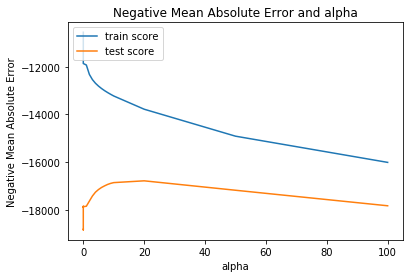

In [254]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [255]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.24982338e+03,  4.34459210e+03,  3.44496198e+03,  7.00166896e+03,
        5.03750233e+02,  1.01294027e+03,  8.51652122e+03,  4.60963874e+03,
        6.60025568e+03,  9.61795406e+03, -1.45365323e+03,  1.30009452e+04,
        2.97584919e+03,  2.07058164e+03, -3.57458313e+02, -1.69685844e+02,
        1.94328097e+03,  9.22359207e+02,  4.12004344e+03, -8.71570822e+02,
        3.11250375e+03, -5.75834368e+03,  2.50196154e+03,  3.34740456e+03,
        1.29361030e+03,  2.49227234e+03,  4.91604002e+03, -8.64249155e+02,
        2.47412838e+02, -2.35190671e+03, -4.27501039e+02, -5.17306891e+02,
       -6.46939409e+03, -1.33484909e+03,  7.75728404e+03, -3.93258606e+02,
        5.62540812e+03,  9.30140073e+02,  8.54603655e+03, -1.47972044e+03,
        3.45615704e+03,  5.65790479e+01,  2.64239864e+03,  4.45946399e+03,
        8.86644965e+03, -2.91225153e+03,  6.13782410e+03,  8.38644993e+02,
       -5.21232690e+03, -8.07314643e+03, -5.35546005e+03, -6.97420009e+03,
        1.84982978e+03,  

In [256]:
# predict train set
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9199842793446588


## Making Predictions

#### Applying the scaling on the test sets

In [257]:
# Rescaling test data
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

X_test.head()

C:\NC\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
157      1.000083  0.125638   -0.093992   -0.986100   -0.292862   0.455832   
337      0.000948 -0.129544    0.069316    0.862097   -0.292862   0.347641   
1120    -0.498619 -0.207131   -0.567021   -0.986100   -0.292862   0.992280   
563     -0.180713  0.995554   -0.567021   -0.986100   -0.292862   1.332631   
371      0.455100  0.580927   -0.567021   -0.986100   -0.292862  -1.288749   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  Fireplaces_2  \
157     -0.653882           1 -1.001502  1.965273  ...             0   
337      1.149992           1  0.991017 -0.799004  ...             0   
1120    -0.090467           1 -0.379167 -0.799004  ...             0   
563      0.266993           1  0.015676  0.384033  ...             0   
371     -2.486162           1 -0.096762  0.284482  ...             0   

      GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  \
157              0             0             0             1        -1.245910   
337              0             0             1             0        -1.012618   
1120             0             1             0             0         1.720237   
563              0             0             1             0         1.786892   
371              0             0             1             0         0.420464   

      YearsSinceRemod  YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
157         -1.217310           -1.171000           -1.110008       -1.635617  
337         -0.873758           -1.004668           -0.864649       -0.137162  
1120         1.727421            1.689902            1.687085        0.612066  
563          1.727421            1.789701            1.736157       -0.137162  
371          1.285711            0.425782            1.294511       -0.137162  

[5 rows x 328 columns]

### Predict using Ridge

In [258]:
# predict test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7747239725941175


In [259]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridgecoeff = list(zip(cols, model_parameters))
ridgecoeff

[('constant', 153096.089),
 ('LotFrontage', 1249.823),
 ('LotArea', 4344.592),
 ('MasVnrArea', 3444.962),
 ('BsmtFinSF1', 7001.669),
 ('BsmtFinSF2', 503.75),
 ('BsmtUnfSF', 1012.94),
 ('TotalBsmtSF', 8516.521),
 ('CentralAir', 4609.639),
 ('1stFlrSF', 6600.256),
 ('2ndFlrSF', 9617.954),
 ('LowQualFinSF', -1453.653),
 ('GrLivArea', 13000.945),
 ('GarageArea', 2975.849),
 ('WoodDeckSF', 2070.582),
 ('OpenPorchSF', -357.458),
 ('EnclosedPorch', -169.686),
 ('3SsnPorch', 1943.281),
 ('ScreenPorch', 922.359),
 ('PoolArea', 4120.043),
 ('MiscVal', -871.571),
 ('MSSubClass_20', 3112.504),
 ('MSSubClass_30', -5758.344),
 ('MSSubClass_40', 2501.962),
 ('MSSubClass_45', 3347.405),
 ('MSSubClass_50', 1293.61),
 ('MSSubClass_60', 2492.272),
 ('MSSubClass_70', 4916.04),
 ('MSSubClass_75', -864.249),
 ('MSSubClass_80', 247.413),
 ('MSSubClass_85', -2351.907),
 ('MSSubClass_90', -427.501),
 ('MSSubClass_120', -517.307),
 ('MSSubClass_160', -6469.394),
 ('MSSubClass_180', -1334.849),
 ('MSZoning_FV', 

In [260]:
ridgedict = {}
for i in ridgecoeff:
    ridgedict[i[0]] = i[1]

ridgedict

{'constant': 153096.089,
 'LotFrontage': 1249.823,
 'LotArea': 4344.592,
 'MasVnrArea': 3444.962,
 'BsmtFinSF1': 7001.669,
 'BsmtFinSF2': 503.75,
 'BsmtUnfSF': 1012.94,
 'TotalBsmtSF': 8516.521,
 'CentralAir': 4609.639,
 '1stFlrSF': 6600.256,
 '2ndFlrSF': 9617.954,
 'LowQualFinSF': -1453.653,
 'GrLivArea': 13000.945,
 'GarageArea': 2975.849,
 'WoodDeckSF': 2070.582,
 'OpenPorchSF': -357.458,
 'EnclosedPorch': -169.686,
 '3SsnPorch': 1943.281,
 'ScreenPorch': 922.359,
 'PoolArea': 4120.043,
 'MiscVal': -871.571,
 'MSSubClass_20': 3112.504,
 'MSSubClass_30': -5758.344,
 'MSSubClass_40': 2501.962,
 'MSSubClass_45': 3347.405,
 'MSSubClass_50': 1293.61,
 'MSSubClass_60': 2492.272,
 'MSSubClass_70': 4916.04,
 'MSSubClass_75': -864.249,
 'MSSubClass_80': 247.413,
 'MSSubClass_85': -2351.907,
 'MSSubClass_90': -427.501,
 'MSSubClass_120': -517.307,
 'MSSubClass_160': -6469.394,
 'MSSubClass_180': -1334.849,
 'MSZoning_FV': 7757.284,
 'MSZoning_RH': -393.259,
 'MSZoning_RL': 5625.408,
 'MSZonin

In [261]:
print(sorted(ridgedict.items(), key = lambda kv:(kv[1], kv[0])))

[('Condition2_PosN', -28696.914), ('OverallQual_5', -13979.785), ('OverallCond_3', -13448.745), ('OverallQual_6', -12821.613), ('Neighborhood_Edwards', -12339.818), ('OverallCond_4', -11957.366), ('OverallQual_4', -11762.638), ('Neighborhood_Mitchel', -11584.821), ('FullBath_1', -11463.863), ('OverallQual_3', -10021.748), ('FullBath_2', -9716.534), ('Condition1_PosN', -9576.463), ('PoolQC_Fa', -8192.978), ('LotConfig_FR2', -8073.146), ('Neighborhood_NAmes', -7858.078), ('BsmtExposure_No', -7162.511), ('LotConfig_Inside', -6974.2), ('Neighborhood_Timber', -6868.383), ('OverallQual_7', -6676.077), ('GarageCars_1', -6582.014), ('Neighborhood_MeadowV', -6567.841), ('MSSubClass_160', -6469.394), ('BsmtQual_Gd', -6452.07), ('SaleType_COD', -6291.673), ('BsmtQual_TA', -6151.267), ('OverallCond_5', -6069.444), ('Functional_Maj2', -6054.854), ('GarageType_2Types', -6009.014), ('SaleType_WD', -5789.286), ('MSSubClass_30', -5758.344), ('Fence_GdPrv', -5733.78), ('ExterQual_TA', -5643.991), ('Bedr

Top 15 as per Ridge:

    Neighborhood_StoneBr
    Neighborhood_NoRidge
    OverallQual_9
    Neighborhood_Crawfor
    Condition2_Norm
    TotRmsAbvGrd_10
    GrLivArea
    ExterQual_Ex
    Functional_Typ
    KitchenQual_Ex
    BsmtQual_Ex
    BsmtExposure_Gd
    Exterior1st_BrkFace
    Neighborhood_NridgHt
    2ndFlrSF
    Condition1_Norm

## Lasso Regression

In [262]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective d

C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [263]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.293069      0.075619         0.001205    4.012351e-04      0.0001   
1       0.243808      0.023513         0.001204    4.014502e-04       0.001   
2       0.239422      0.028334         0.001204    3.996137e-04        0.01   
3       0.233573      0.030692         0.001004    4.623108e-07        0.05   
4       0.239594      0.029739         0.001405    4.913618e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21310.634510      -17484.146593      -18470.729615   
1   {'alpha': 0.001}      -21307.993466      -17482.914539      -18471.151186   
2    {'alpha': 0.01}      -21282.065372      -17470.561199      -18475.351724   
3    {'alpha': 0.05}      -21228.328366      -17451.375797      -18469.478835   
4     {'alpha': 0.1}      -21201.995272      -17428.093848      -18457.631274   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -17683.214656  ...    -18855.109882     1390.083481               27   
1      -17683.153626  ...    -18854.340322     1389.355211               26   
2      -17682.421235  ...    -18846.610380     1382.263797               25   
3      -17678.286050  ...    -18827.267802     1367.203123               24   
4      -17672.289530  ...    -18810.712112     1363.191210               23   

   split0_train_score  split1_train_score  split2_train_score  \
0       -10287.359126       -10902.701816       -10415.325624   
1       -10287.390302       -10902.699646       -10415.375201   
2       -10287.883146       -10902.838472       -10416.100151   
3       -10290.371174       -10903.728115       -10420.056167   
4       -10293.694396       -10904.859784       -10425.143874   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -10994.131235       -10452.739712     -10610.451503       282.827221  
1       -10994.159172       -10452.763166     -10610.477498       282.817773  
2       -10994.603231       -10453.161605     -10610.917321       282.709925  
3       -10997.070427       -10456.157473     -10613.476671       282.116307  
4       -11000.194549       -10459.960859     -10616.770692       281.317484  

[5 rows x 21 columns]

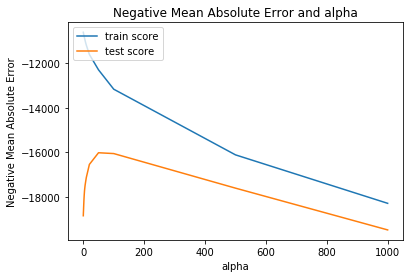

In [264]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [265]:
alpha = 75

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=75, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [266]:
lasso.coef_

array([ 1.89816675e+03,  4.85812849e+03,  3.23700422e+03,  7.06351934e+03,
        5.14944245e+00, -0.00000000e+00,  9.43499500e+03,  1.54173486e+03,
        0.00000000e+00,  1.16370705e+03, -2.36703722e+03,  2.64617335e+04,
        1.37095567e+03,  1.70151759e+03,  4.28606711e+02, -6.54138541e+01,
        1.35842157e+03,  5.06344557e+02,  2.54500466e+03, -2.08658098e+02,
        1.46310620e+03, -3.51042133e+03,  0.00000000e+00,  1.41982051e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -7.24758675e+03, -0.00000000e+00,  9.19189075e+03, -0.00000000e+00,
        3.99657616e+03,  0.00000000e+00,  1.02508968e+04, -0.00000000e+00,
        7.13805353e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.37131825e+03, -5.08297754e+03,  4.90431918e+02,  0.00000000e+00,
       -3.72147709e+03, -5.62394269e+03, -0.00000000e+00, -4.54804508e+03,
        9.93089325e+02,  

In [267]:
# predict train set
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9360040598183065


## Making Predictions

### Predict using Lasso

In [268]:
# predict test set
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7331195663381789


In [269]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lassocoeff = list(zip(cols, model_parameters))
lassocoeff

[('constant', 158619.449),
 ('LotFrontage', 1898.167),
 ('LotArea', 4858.128),
 ('MasVnrArea', 3237.004),
 ('BsmtFinSF1', 7063.519),
 ('BsmtFinSF2', 5.149),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 9434.995),
 ('CentralAir', 1541.735),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 1163.707),
 ('LowQualFinSF', -2367.037),
 ('GrLivArea', 26461.733),
 ('GarageArea', 1370.956),
 ('WoodDeckSF', 1701.518),
 ('OpenPorchSF', 428.607),
 ('EnclosedPorch', -65.414),
 ('3SsnPorch', 1358.422),
 ('ScreenPorch', 506.345),
 ('PoolArea', 2545.005),
 ('MiscVal', -208.658),
 ('MSSubClass_20', 1463.106),
 ('MSSubClass_30', -3510.421),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 1419.821),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', -0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -7247.587),
 ('MSSubClass_180', -0.0),
 ('MSZoning_FV', 9191.891),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 399

In [270]:
lassodict = {}
for i in lassocoeff:
    lassodict[i[0]] = i[1]
    
lassodict

{'constant': 158619.449,
 'LotFrontage': 1898.167,
 'LotArea': 4858.128,
 'MasVnrArea': 3237.004,
 'BsmtFinSF1': 7063.519,
 'BsmtFinSF2': 5.149,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 9434.995,
 'CentralAir': 1541.735,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 1163.707,
 'LowQualFinSF': -2367.037,
 'GrLivArea': 26461.733,
 'GarageArea': 1370.956,
 'WoodDeckSF': 1701.518,
 'OpenPorchSF': 428.607,
 'EnclosedPorch': -65.414,
 '3SsnPorch': 1358.422,
 'ScreenPorch': 506.345,
 'PoolArea': 2545.005,
 'MiscVal': -208.658,
 'MSSubClass_20': 1463.106,
 'MSSubClass_30': -3510.421,
 'MSSubClass_40': 0.0,
 'MSSubClass_45': 1419.821,
 'MSSubClass_50': 0.0,
 'MSSubClass_60': 0.0,
 'MSSubClass_70': 0.0,
 'MSSubClass_75': -0.0,
 'MSSubClass_80': -0.0,
 'MSSubClass_85': -0.0,
 'MSSubClass_90': -0.0,
 'MSSubClass_120': 0.0,
 'MSSubClass_160': -7247.587,
 'MSSubClass_180': -0.0,
 'MSZoning_FV': 9191.891,
 'MSZoning_RH': -0.0,
 'MSZoning_RL': 3996.576,
 'MSZoning_RM': 0.0,
 'Street_Pave': 10250.897,
 'Alley_Grvl': -0.0,

In [271]:
print(sorted(lassodict.items(), key = lambda kv:(kv[1], kv[0])))

[('Condition2_PosN', -343501.566), ('OverallQual_5', -22787.732), ('OverallQual_3', -21660.353), ('OverallQual_4', -21131.39), ('OverallQual_6', -20794.766), ('OverallCond_3', -18417.602), ('FullBath_2', -17958.859), ('FullBath_1', -17467.778), ('OverallCond_4', -15119.77), ('OverallQual_7', -13495.714), ('OverallCond_5', -9840.005), ('YearsSinceBuilt', -9085.231), ('Neighborhood_Mitchel', -7442.764), ('MSSubClass_160', -7247.587), ('Neighborhood_MeadowV', -7228.789), ('BedroomAbvGr_5', -6896.191), ('BsmtQual_Gd', -6858.743), ('BsmtCond_Fa', -6534.469), ('BsmtQual_TA', -6133.241), ('BsmtExposure_No', -5958.771), ('LotConfig_FR2', -5623.943), ('LandContour_Low', -5082.978), ('Neighborhood_Edwards', -4834.918), ('LotConfig_Inside', -4548.045), ('MoSold_2', -4118.245), ('ExterQual_TA', -4049.85), ('MoSold_8', -3856.003), ('LotConfig_Corner', -3721.477), ('OverallCond_6', -3667.735), ('YearsSinceRemod', -3654.462), ('Neighborhood_NAmes', -3638.29), ('GarageCars_1', -3541.909), ('MSSubClass

Top 15 as per Lasso:

    Neighborhood_StoneBr
    Neighborhood_NoRidge
    Neighborhood_Crawfor
    GrLivArea
    ExterQual_Ex
    PoolQC_Ex
    KitchenQual_Ex
    Functional_Typ
    BsmtExposure_Gd
    KitchenAbvGr_1
    Exterior1st_BrkFace
    OverallQual_9
    SaleType_New
    TotRmsAbvGrd_10
    GarageCars_3

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [272]:
topfive = ['Neighborhood_StoneBr','Neighborhood_NoRidge', 'Neighborhood_Crawfor', 'GrLivArea', 'ExterQual_Ex']

In [273]:
X_train = X_train.drop(topfive, 1)
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
25       1.817557  0.323787    3.037013     -0.9861   -0.292862   2.240985   
88       1.590481 -0.188713   -0.567021     -0.9861   -0.292862   0.994534   
986     -0.498619 -0.469877   -0.567021     -0.9861   -0.292862  -0.195568   
1444    -0.316959 -0.186044    0.029897     -0.9861   -0.292862   1.916412   
1108     0.003217 -0.224926   -0.567021     -0.9861   -0.292862   0.793929   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  Fireplaces_2  \
25       1.221010           1  1.158367 -0.799004  ...             0   
88      -0.088100           0 -0.376552 -0.799004  ...             0   
986     -1.338028           1 -0.407930  0.668795  ...             0   
1444     0.880121           1  0.692923 -0.799004  ...             0   
1108    -0.298789           1 -0.546517  0.918830  ...             0   

      GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  \
25               0             0             0             1        -1.179255   
88               1             0             0             0         1.886874   
986              0             1             0             0         2.053512   
1444             0             0             1             0        -1.079273   
1108             0             0             1             0        -0.945963   

      YearsSinceRemod  YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
25          -1.070073           -1.137734           -1.011865       -0.886389  
88           0.156898            1.922766            0.214931       -0.886389  
986         -0.873758            1.989298           -0.962793        1.361293  
1444        -0.922837           -1.104467           -0.962793        0.612066  
1108        -0.726521           -0.971402           -0.766506        0.612066  

[5 rows x 323 columns]

In [274]:
X_test = X_test.drop(topfive, 1)
X_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
157      1.000083  0.125638   -0.093992   -0.986100   -0.292862   0.455832   
337      0.000948 -0.129544    0.069316    0.862097   -0.292862   0.347641   
1120    -0.498619 -0.207131   -0.567021   -0.986100   -0.292862   0.992280   
563     -0.180713  0.995554   -0.567021   -0.986100   -0.292862   1.332631   
371      0.455100  0.580927   -0.567021   -0.986100   -0.292862  -1.288749   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  Fireplaces_2  \
157     -0.653882           1 -1.001502  1.965273  ...             0   
337      1.149992           1  0.991017 -0.799004  ...             0   
1120    -0.090467           1 -0.379167 -0.799004  ...             0   
563      0.266993           1  0.015676  0.384033  ...             0   
371     -2.486162           1 -0.096762  0.284482  ...             0   

      GarageCars_0  GarageCars_1  GarageCars_2  GarageCars_3  YearsSinceBuilt  \
157              0             0             0             1        -1.245910   
337              0             0             1             0        -1.012618   
1120             0             1             0             0         1.720237   
563              0             0             1             0         1.786892   
371              0             0             1             0         0.420464   

      YearsSinceRemod  YearSoldSinceBuilt  YearSoldSinceRemod  YearsSinceSold  
157         -1.217310           -1.171000           -1.110008       -1.635617  
337         -0.873758           -1.004668           -0.864649       -0.137162  
1120         1.727421            1.689902            1.687085        0.612066  
563          1.727421            1.789701            1.736157       -0.137162  
371          1.285711            0.425782            1.294511       -0.137162  

[5 rows x 323 columns]

## Lasso Regression

In [275]:
lassoques = Lasso()

# cross validation
model_cv_ques = GridSearchCV(estimator = lassoques, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_ques.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective d

C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\NC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [276]:
cv_results_ques = pd.DataFrame(model_cv_ques.cv_results_)
cv_results_ques.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.230162      0.029969         0.001207    4.002778e-04      0.0001   
1       0.234778      0.026370         0.001204    4.014497e-04       0.001   
2       0.230765      0.029851         0.001405    4.916340e-04        0.01   
3       0.232571      0.030652         0.001405    4.915952e-04        0.05   
4       0.241601      0.026798         0.001003    7.448435e-07         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21432.057677      -17567.003226      -18667.023044   
1   {'alpha': 0.001}      -21429.236646      -17565.602919      -18667.421756   
2    {'alpha': 0.01}      -21402.296930      -17551.689080      -18671.213922   
3    {'alpha': 0.05}      -21355.493688      -17520.651673      -18662.569166   
4     {'alpha': 0.1}      -21329.236187      -17493.457986      -18650.581369   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -17700.514409  ...    -18868.406031     1392.997691               27   
1      -17700.208071  ...    -18867.513080     1392.252271               26   
2      -17697.133391  ...    -18858.755862     1385.280645               25   
3      -17682.807470  ...    -18835.968020     1376.367584               24   
4      -17670.318284  ...    -18817.658199     1374.100066               23   

   split0_train_score  split1_train_score  split2_train_score  \
0       -10322.536717       -10976.068051       -10415.989319   
1       -10322.566058       -10976.066109       -10416.057056   
2       -10323.130036       -10976.174624       -10417.003317   
3       -10325.695705       -10977.110478       -10421.925261   
4       -10329.132645       -10978.444258       -10428.124969   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -11068.861458       -10521.480497     -10660.987208       303.206914  
1       -11068.873652       -10521.532917     -10661.019158       303.187471  
2       -11069.284650       -10522.203592     -10661.559244       302.980122  
3       -11071.683688       -10526.589133     -10664.600853       302.051015  
4       -11075.172685       -10532.073038     -10668.589519       301.001910  

[5 rows x 21 columns]

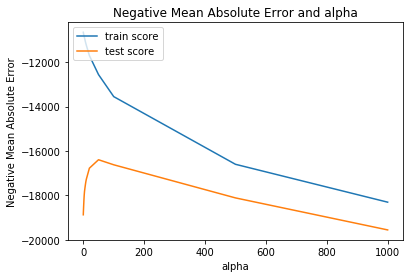

In [277]:
# plotting mean test and train scoes with alpha 
cv_results_ques['param_alpha'] = cv_results_ques['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_ques['param_alpha'], cv_results_ques['mean_train_score'])
plt.plot(cv_results_ques['param_alpha'], cv_results_ques['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [278]:
alpha = 50

lassoques = Lasso(alpha=alpha)
        
lassoques.fit(X_train, y_train) 
lasso.coef_

array([ 1.89816675e+03,  4.85812849e+03,  3.23700422e+03,  7.06351934e+03,
        5.14944245e+00, -0.00000000e+00,  9.43499500e+03,  1.54173486e+03,
        0.00000000e+00,  1.16370705e+03, -2.36703722e+03,  2.64617335e+04,
        1.37095567e+03,  1.70151759e+03,  4.28606711e+02, -6.54138541e+01,
        1.35842157e+03,  5.06344557e+02,  2.54500466e+03, -2.08658098e+02,
        1.46310620e+03, -3.51042133e+03,  0.00000000e+00,  1.41982051e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -7.24758675e+03, -0.00000000e+00,  9.19189075e+03, -0.00000000e+00,
        3.99657616e+03,  0.00000000e+00,  1.02508968e+04, -0.00000000e+00,
        7.13805353e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.37131825e+03, -5.08297754e+03,  4.90431918e+02,  0.00000000e+00,
       -3.72147709e+03, -5.62394269e+03, -0.00000000e+00, -4.54804508e+03,
        9.93089325e+02,  

In [279]:
# predict train set
y_train_pred = lassoques.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9387713215217146


## Making Predictions

### Predict using Lasso

In [280]:
# predict test set
y_test_pred = lassoques.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6970146501082801


In [281]:
# lasso model parameters
model_parameters = list(lassoques.coef_)
model_parameters.insert(0, lassoques.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lassocoeff = list(zip(cols, model_parameters))
lassocoeff

[('constant', 183861.28),
 ('LotFrontage', 1703.246),
 ('LotArea', 5035.396),
 ('MasVnrArea', 4080.267),
 ('BsmtFinSF1', 8478.757),
 ('BsmtFinSF2', 440.836),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 9889.035),
 ('CentralAir', 2423.302),
 ('1stFlrSF', 20473.961),
 ('2ndFlrSF', 24872.841),
 ('LowQualFinSF', -329.1),
 ('GrLivArea', 1026.4),
 ('GarageArea', 1419.161),
 ('WoodDeckSF', 579.866),
 ('OpenPorchSF', 283.271),
 ('EnclosedPorch', 1666.814),
 ('3SsnPorch', 955.081),
 ('ScreenPorch', 4188.815),
 ('PoolArea', -191.883),
 ('MiscVal', 1454.683),
 ('MSSubClass_20', -3148.612),
 ('MSSubClass_30', 0.0),
 ('MSSubClass_40', 5970.118),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 2909.909),
 ('MSSubClass_70', -521.207),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', -425.453),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', -10861.636),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', 7510.877),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 7847.573),
 ('MSZ

In [282]:
lassodict = {}
for i in lassocoeff:
    lassodict[i[0]] = i[1]
    
lassodict

{'constant': 183861.28,
 'LotFrontage': 1703.246,
 'LotArea': 5035.396,
 'MasVnrArea': 4080.267,
 'BsmtFinSF1': 8478.757,
 'BsmtFinSF2': 440.836,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 9889.035,
 'CentralAir': 2423.302,
 '1stFlrSF': 20473.961,
 '2ndFlrSF': 24872.841,
 'LowQualFinSF': -329.1,
 'GrLivArea': 1026.4,
 'GarageArea': 1419.161,
 'WoodDeckSF': 579.866,
 'OpenPorchSF': 283.271,
 'EnclosedPorch': 1666.814,
 '3SsnPorch': 955.081,
 'ScreenPorch': 4188.815,
 'PoolArea': -191.883,
 'MiscVal': 1454.683,
 'MSSubClass_20': -3148.612,
 'MSSubClass_30': 0.0,
 'MSSubClass_40': 5970.118,
 'MSSubClass_45': 0.0,
 'MSSubClass_50': 0.0,
 'MSSubClass_60': 2909.909,
 'MSSubClass_70': -521.207,
 'MSSubClass_75': 0.0,
 'MSSubClass_80': -425.453,
 'MSSubClass_85': 0.0,
 'MSSubClass_90': -0.0,
 'MSSubClass_120': -10861.636,
 'MSSubClass_160': -0.0,
 'MSSubClass_180': 7510.877,
 'MSZoning_FV': 0.0,
 'MSZoning_RH': 7847.573,
 'MSZoning_RL': 0.0,
 'MSZoning_RM': 19955.121,
 'Street_Pave': -0.0,
 'Alley_Gr

In [283]:
print(sorted(lassodict.items(), key = lambda kv:(kv[1], kv[0])))

[('Condition1_RRNn', -397838.153), ('OverallQual_1', -44212.92), ('HouseStyle_SFoyer', -43181.549), ('HouseStyle_2Story', -42571.896), ('OverallQual_2', -41777.591), ('GarageCond_Po', -40309.458), ('OverallQual_3', -33891.422), ('OverallQual_8', -26085.284), ('OverallQual_4', -20908.477), ('Neighborhood_IDOTRR', -19629.896), ('OverallQual_9', -19387.994), ('BsmtFullBath_2', -17723.634), ('Neighborhood_Sawyer', -15732.297), ('BsmtFullBath_1', -15266.006), ('Neighborhood_MeadowV', -14842.413), ('Neighborhood_CollgCr', -13600.665), ('OverallCond_1', -12948.79), ('Neighborhood_Gilbert', -12444.564), ('Neighborhood_NAmes', -12421.705), ('Neighborhood_ClearCr', -11350.417), ('MSSubClass_120', -10861.636), ('Neighborhood_BrkSide', -10176.466), ('Foundation_PConc', -10072.529), ('Neighborhood_Crawfor', -9862.755), ('MasVnrType_BrkFace', -9653.183), ('Fireplaces_2', -9650.866), ('Foundation_Slab', -9502.045), ('Neighborhood_NWAmes', -9385.359), ('Neighborhood_NridgHt', -8778.699), ('BedroomAbvG

Top 15 as per Lasso:

    2ndFlrSF
    1stFlrSF
    MSZoning_RM
    Functional_Maj2
    Electrical_FuseA
    BedroomAbvGr_3
    TotRmsAbvGrd_6
    RoofMatl_WdShake
    BsmtCond_Fa
    SaleType_CWD
    BsmtFinType1_BLQ
    TotRmsAbvGrd_5
    GarageFinish_Fin
    TotalBsmtSF
    Fireplaces_1